# Shallow water model
## HW3
### Kelsey Malloy


### <i>last edited: 11/2020</i>

In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from Diagnostics import calc_budget, avg_x, avg_y, d_dx, d_dy
from RKPackage import RK3Step 
from SWE_RHS import SWE_RHS
from Plotting import DefinePlot, UpdatePlots
from IC_BC import gauss,wave,BC

### Set geometry

In [12]:
nx = 200 # number of x pts
ny = 200 # number of y pts
lx = 1*10**3 # length of x
ly = 1*10**3 # length of y
dx = float(lx)/nx # distance between x pts
dy = float(ly)/ny # distance between y pts
dxx = dx * 10**4
dyy = dy * 10**4
print(dx,dy,dxx,dyy)

# centered grid -- p points
xc = (-lx/2)+np.arange(nx)*(dx)
yc = (-ly/2)+np.arange(ny)*(dy)
XP,YP = np.meshgrid(xc,yc)
print('Centered grid shape (pressure points): ',XP.shape)

# x-staggered grid -- u points
xstag = ((-lx/2)-dx/2)+np.arange(nx+1)*dx
print(xc[:2],xc[-2:],xstag[:2],xstag[-2:])
XU,YU = np.meshgrid(xstag,yc)
print('X-staggered grid shape (u points): ',XU.shape)

# y-staggered grid -- v points
ystag = ((-ly/2)-dy/2)+np.arange(ny+1)*dy
print(yc[:2],yc[-2:],ystag[:2],ystag[-2:])
XV,YV = np.meshgrid(xc,ystag)
print('Y-staggered grid shape (v points): ',XV.shape)

# x-staggered and y-staggered -- z points
XZ,YZ = np.meshgrid(xstag,ystag)
print('X- and Y-staggered grid shape (vort points): ',XZ.shape)

5.0 5.0 50000.0 50000.0
Centered grid shape (pressure points):  (200, 200)
[-500. -495.] [490. 495.] [-502.5 -497.5] [492.5 497.5]
X-staggered grid shape (u points):  (200, 201)
[-500. -495.] [490. 495.] [-502.5 -497.5] [492.5 497.5]
Y-staggered grid shape (v points):  (201, 200)
X- and Y-staggered grid shape (vort points):  (201, 201)


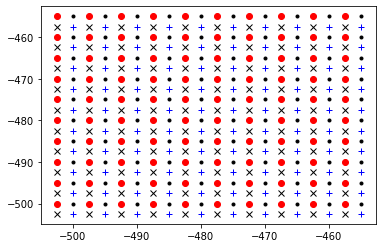

In [13]:
plt.plot(XP[:10,:10],YP[:10,:10],'k.')
plt.plot(XU[:10,:10],YU[:10,:10],'ro')
plt.plot(XV[:10,:10],YV[:10,:10],'b+')
plt.plot(XZ[:10,:10],YZ[:10,:10],'kx')
plt.show()

### Set parameters

In [14]:
g=9.8
depth = 150. 
f0 = 10**-4 
betaV=2.28*10**-11 * (YZ*10**4)
print(betaV.shape)

(201, 201)


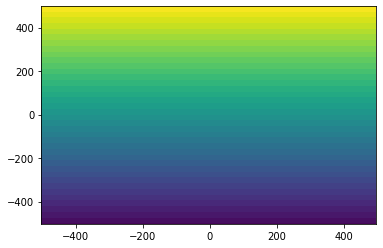

In [15]:
plt.contourf(XZ,YZ,betaV,40)
plt.show()

### Set time step and interval

In [16]:
nt = 1001 # number of timesteps
dt = 100 # timestep interval
CFDtest =  0.1*min(dxx, dyy)/np.sqrt(g*depth) # test to see if dt is less than CFD limit
print(CFDtest,dt)

snapfreq = 10 # how often to plot or print energy/enstrophy
print('How many time steps will plot (not including IC): ',(nt-1)/snapfreq)

130.41013273932526 100
How many time steps will plot (not including IC):  100.0


### Initial conditions

In [17]:
# initialize arrays
p = np.zeros((int(nt),ny,nx))
u = np.zeros((int(nt),ny,nx+1))
v = np.zeros((int(nt),ny+1,nx))
z = np.zeros((int(nt),ny+1,nx+1))
depth = depth + np.zeros((ny,nx))
f = f0 + betaV

print(p.shape,depth.shape)
print(u.shape,v.shape)
print(z.shape,f.shape)

(1001, 200, 200) (200, 200)
(1001, 200, 201) (1001, 201, 200)
(1001, 201, 201) (201, 201)


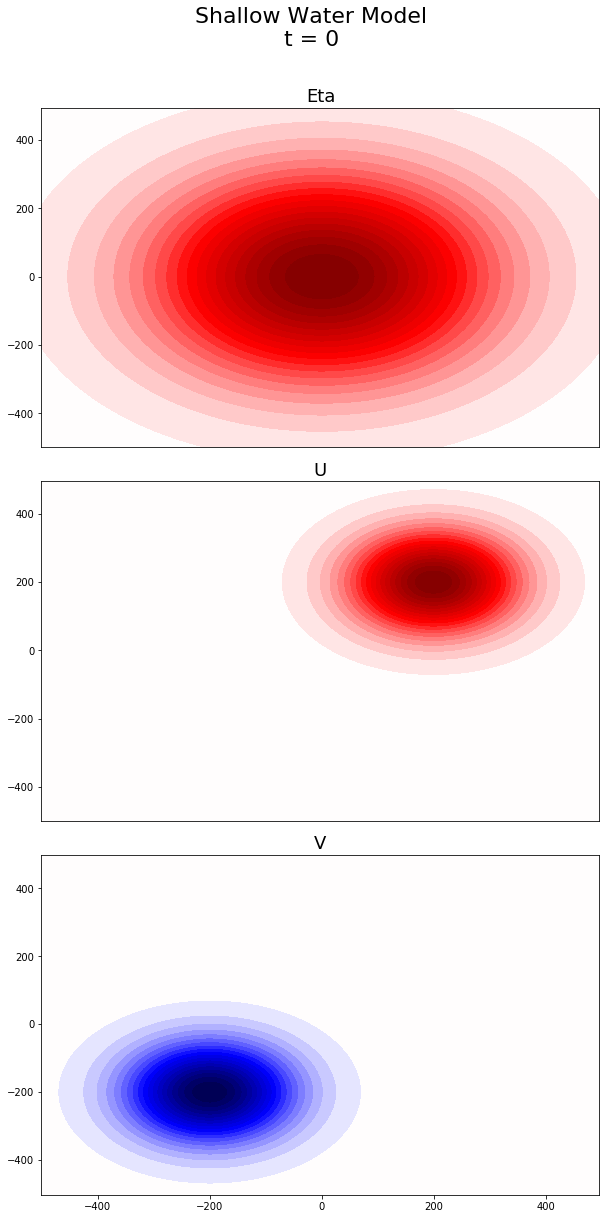

In [18]:
# gaussian bubble for eta
p[0] = gauss(XP,YP,0,0,1,200)
u[0] = gauss(XU,YU,400,400,1,100)
v[0] = gauss(XV,YV,-400,-400,-1,100)
UpdatePlots(0,p[0],u[0],v[0],XP,YP,XU,YU,XV,YV)
plt.show()

In [19]:
# initial budget
energy0, enstrophy0 = calc_budget(p[0],u[0],v[0],depth+p[0],f,g,dxx,dyy)

print('Initial Energy: ',np.max(energy0))
print('Initial Enstrophy: ',np.max(enstrophy0))

Initial Energy:  75.8001073274252
Initial Enstrophy:  3.005070238420527e-10


### Iterations

$\delta$Energy:  0.02617850196946847
$\delta$Enstrophy:  7.27459081556461e-13
$\delta$Energy:  0.17831196722409004
$\delta$Enstrophy:  7.110992788877025e-13
$\delta$Energy:  0.1304231255536763
$\delta$Enstrophy:  6.570133461676179e-13
$\delta$Energy:  -0.1128442579948512
$\delta$Enstrophy:  5.67034717661652e-13
$\delta$Energy:  -0.5402969909382875
$\delta$Enstrophy:  4.388866314703942e-13
$\delta$Energy:  -1.135342744987895
$\delta$Enstrophy:  2.681905349820515e-13
$\delta$Energy:  -1.8773958298049251
$\delta$Enstrophy:  5.658642405980646e-14
$\delta$Energy:  -2.7433280189690237
$\delta$Enstrophy:  -6.866270359842931e-14
$\delta$Energy:  -3.7087594548524976
$\delta$Enstrophy:  -7.466926548057378e-14
$\delta$Energy:  -4.749024183322419
$\delta$Enstrophy:  -7.679657054731047e-14
$\delta$Energy:  -5.839712305188954
$\delta$Enstrophy:  -7.890616247061845e-14
$\delta$Energy:  -6.956775397981261
$\delta$Enstrophy:  -8.092382930166938e-14
$\delta$Energy:  -8.07627015648157
$\delta$Enstrophy: 

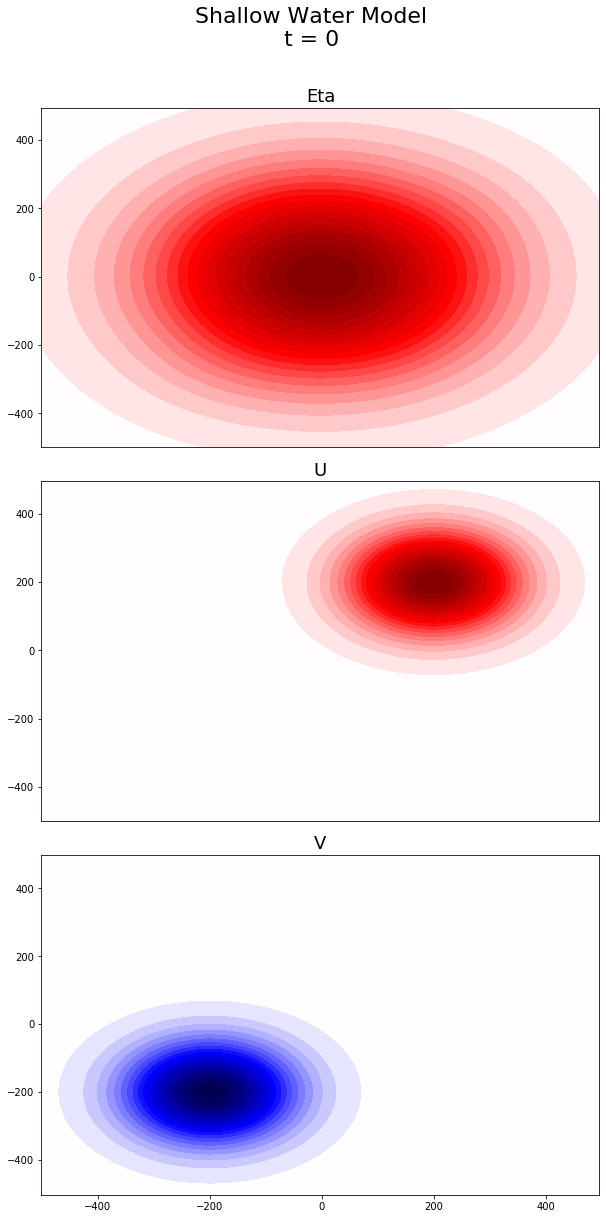

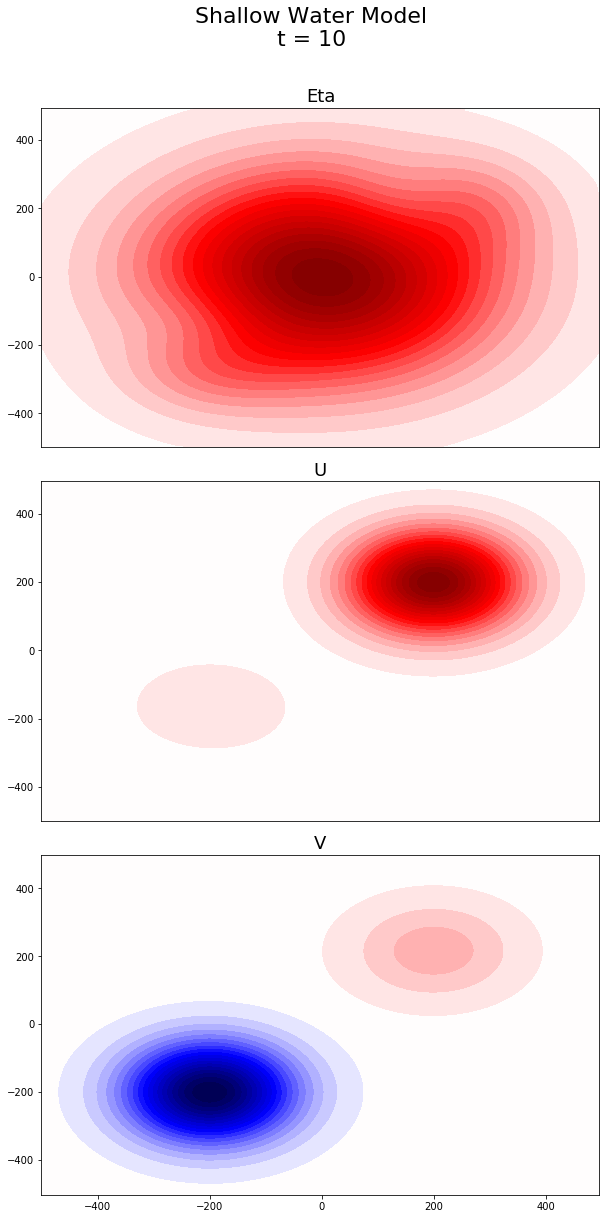

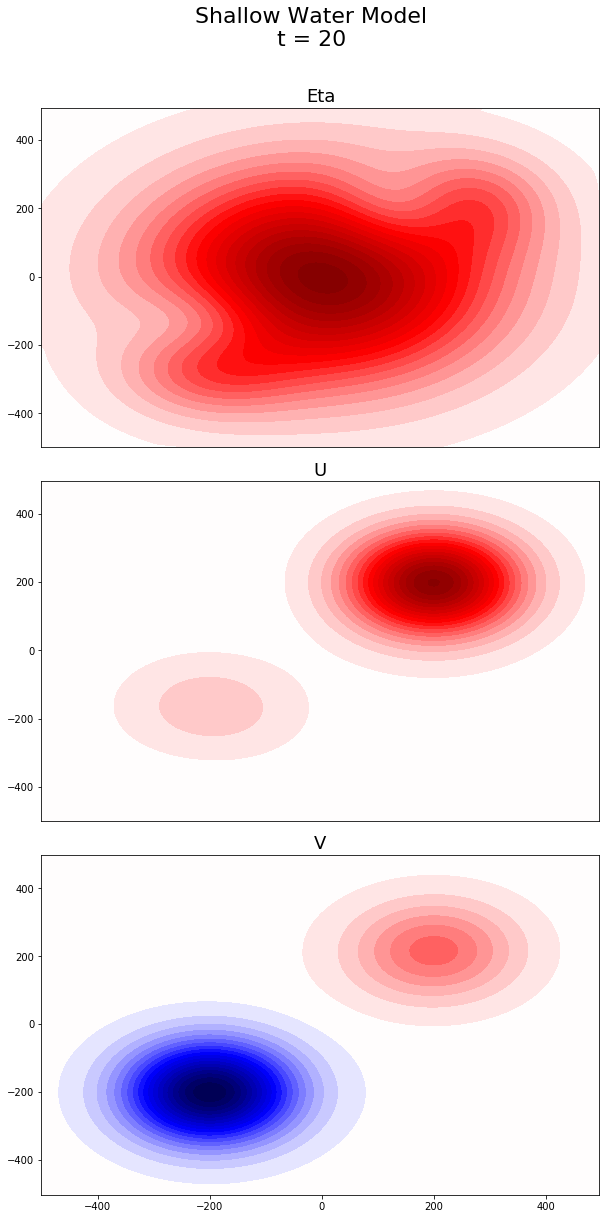

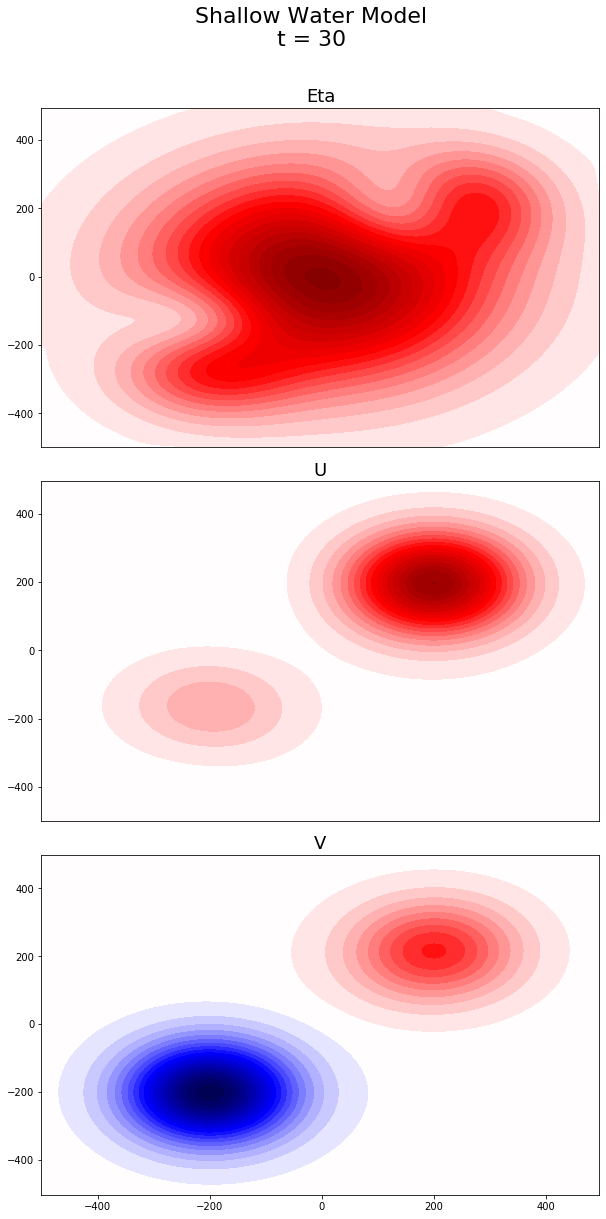

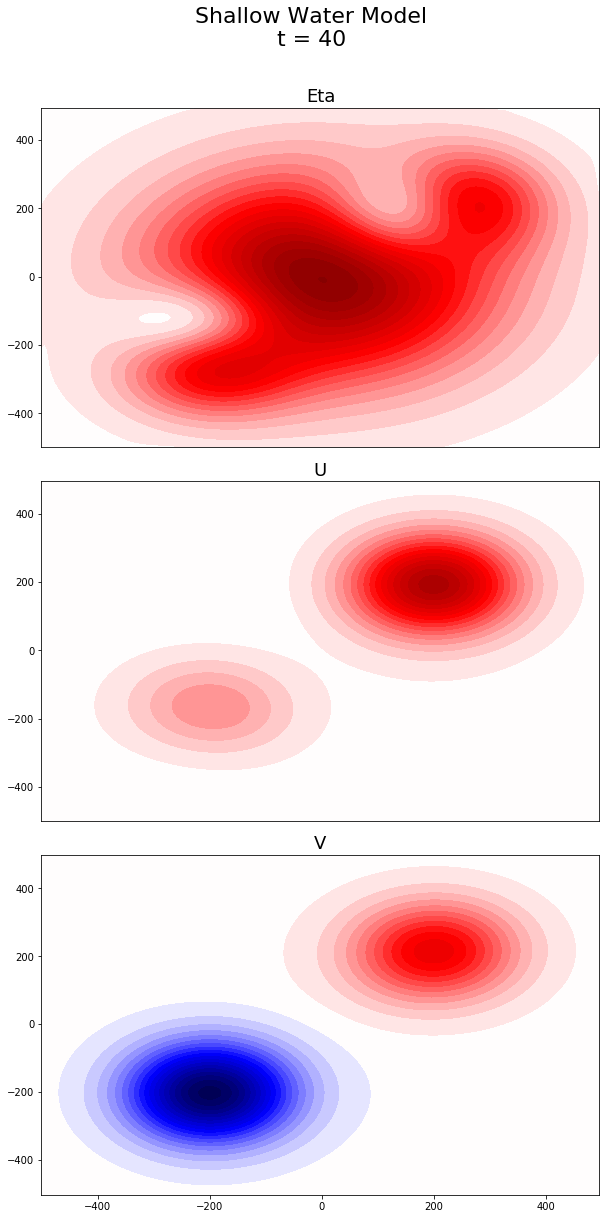

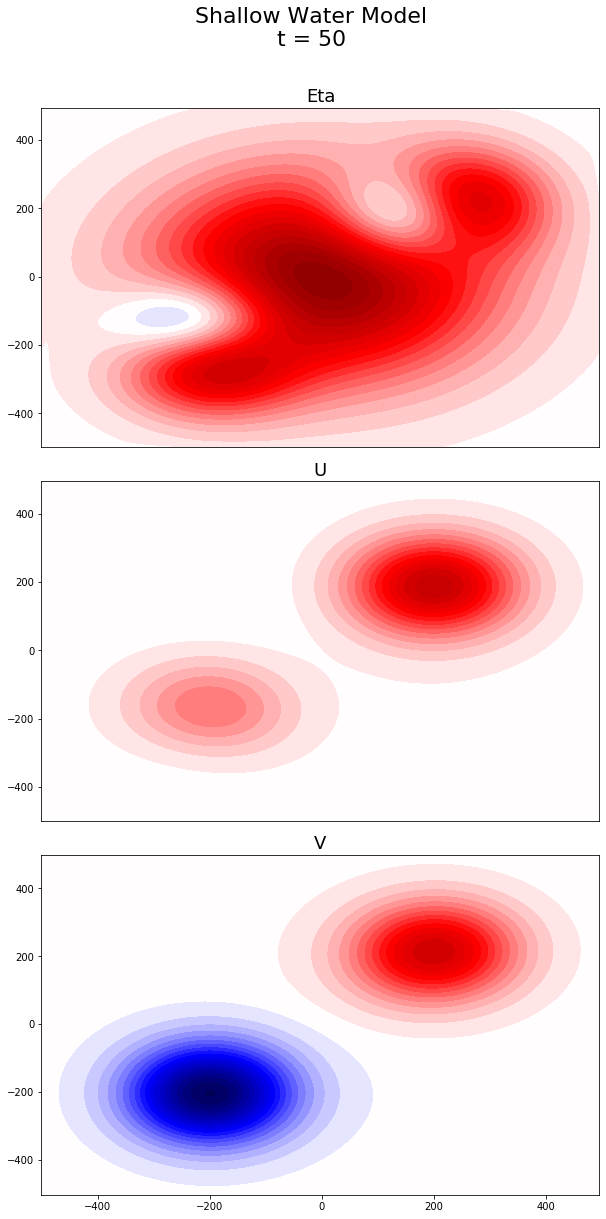

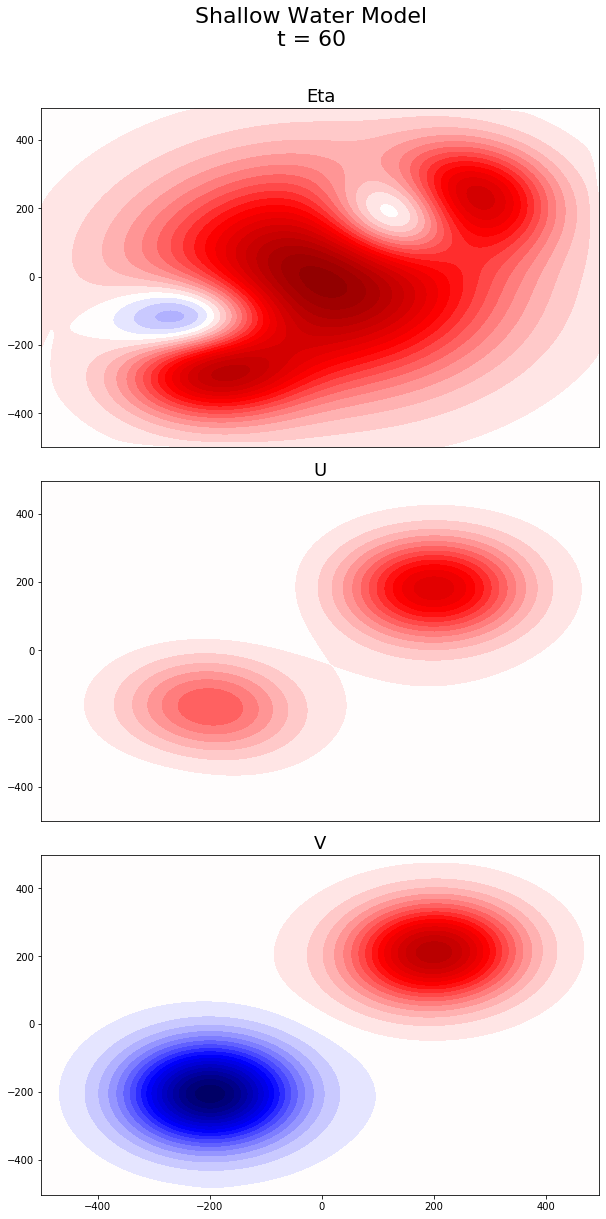

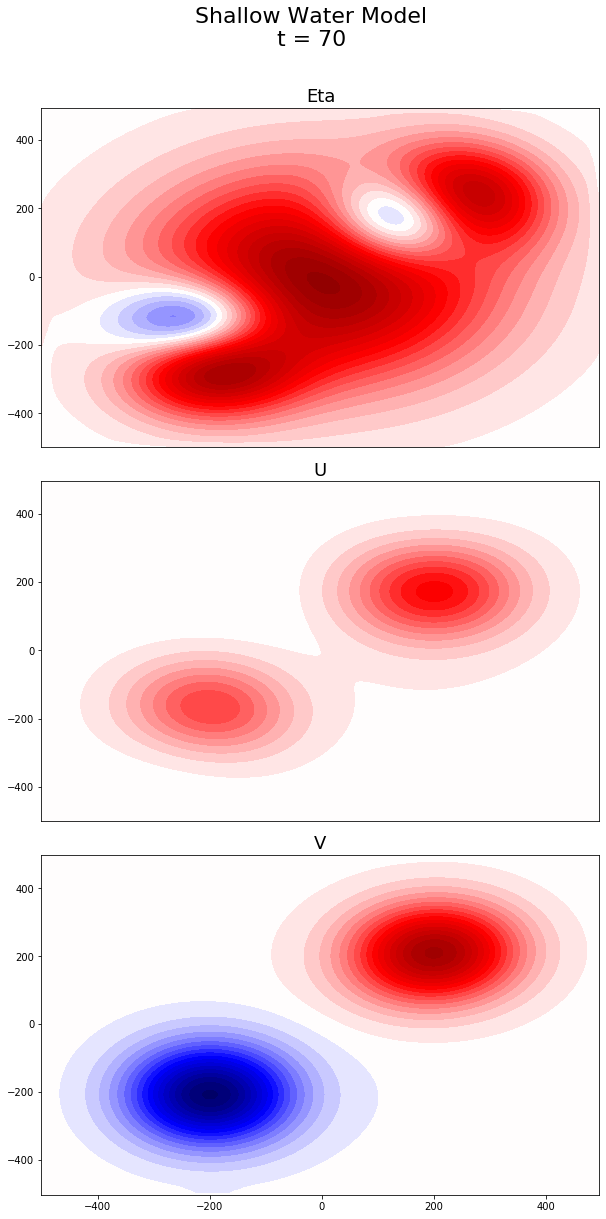

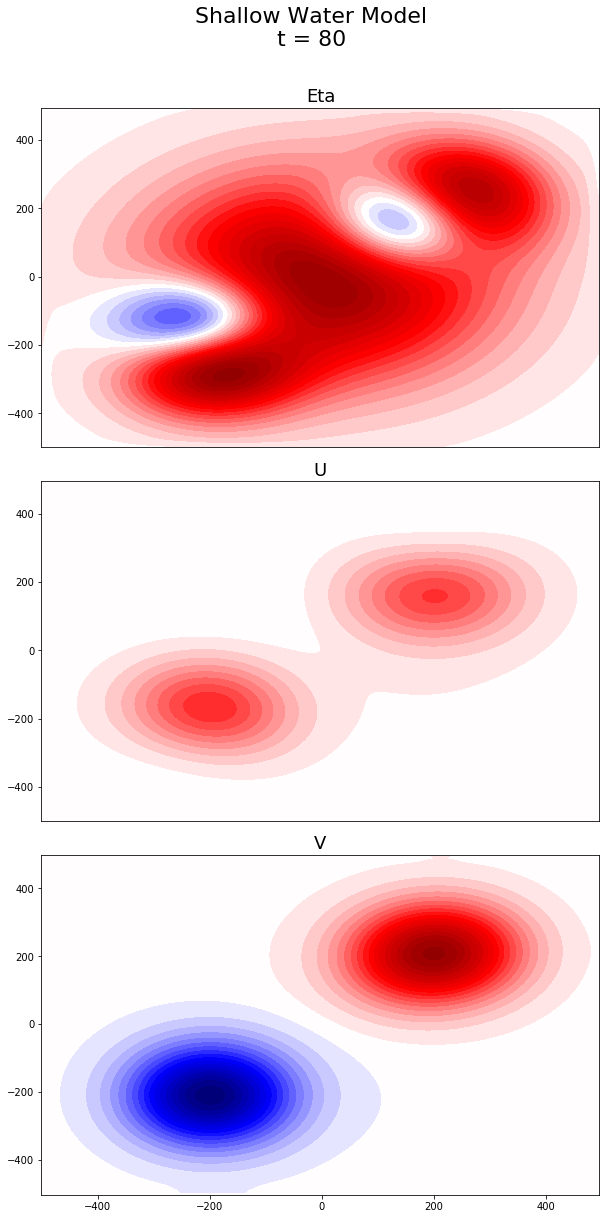

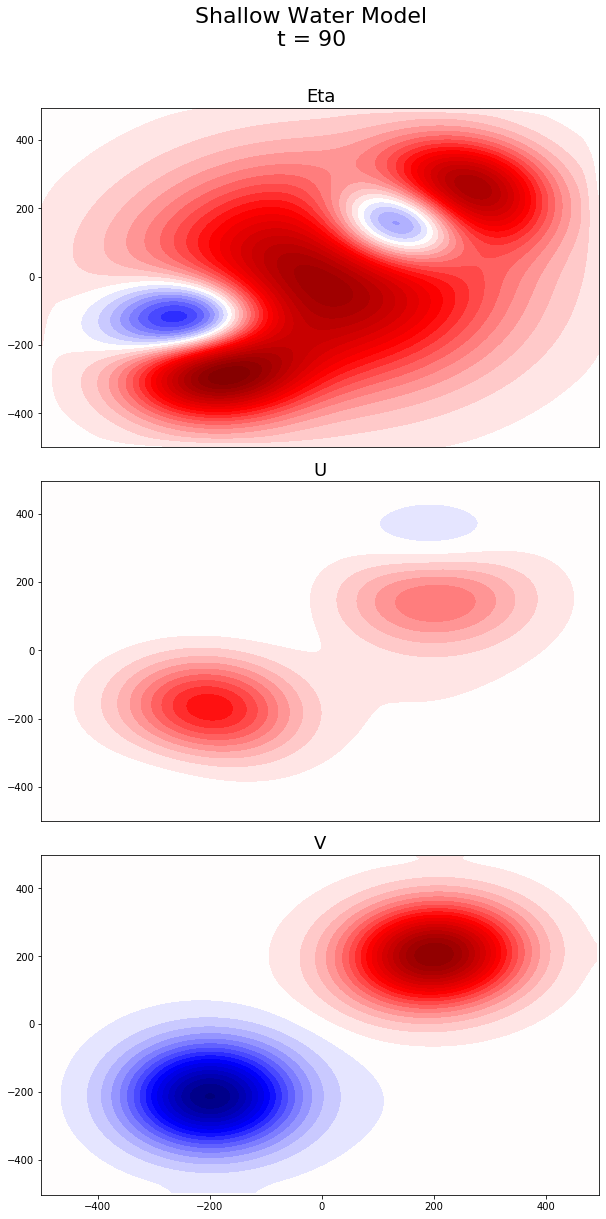

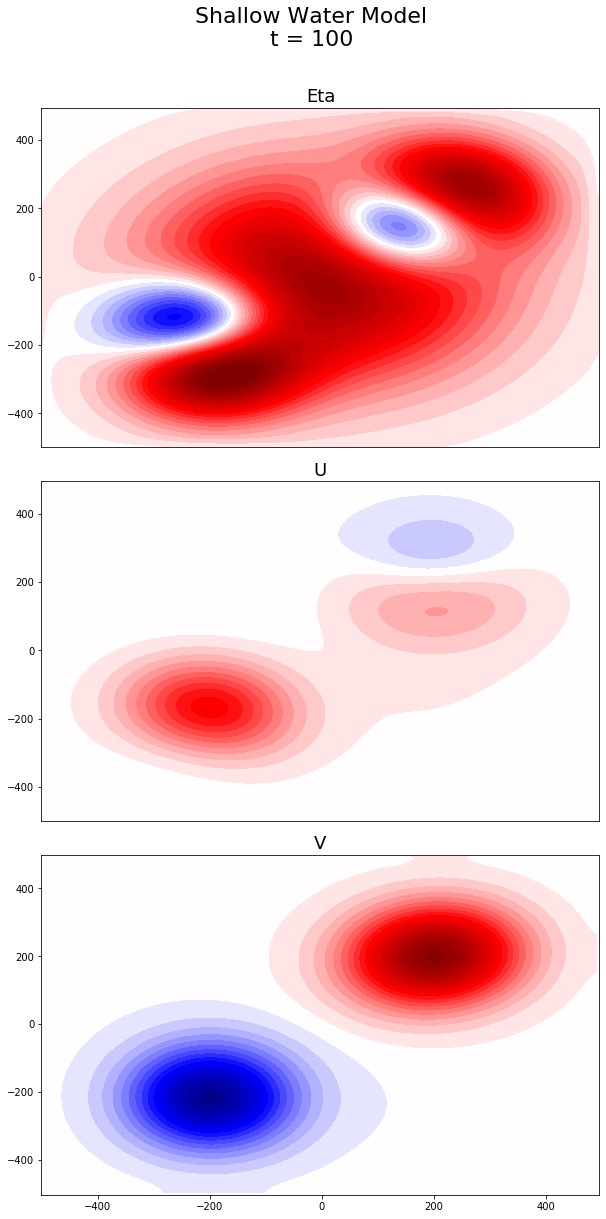

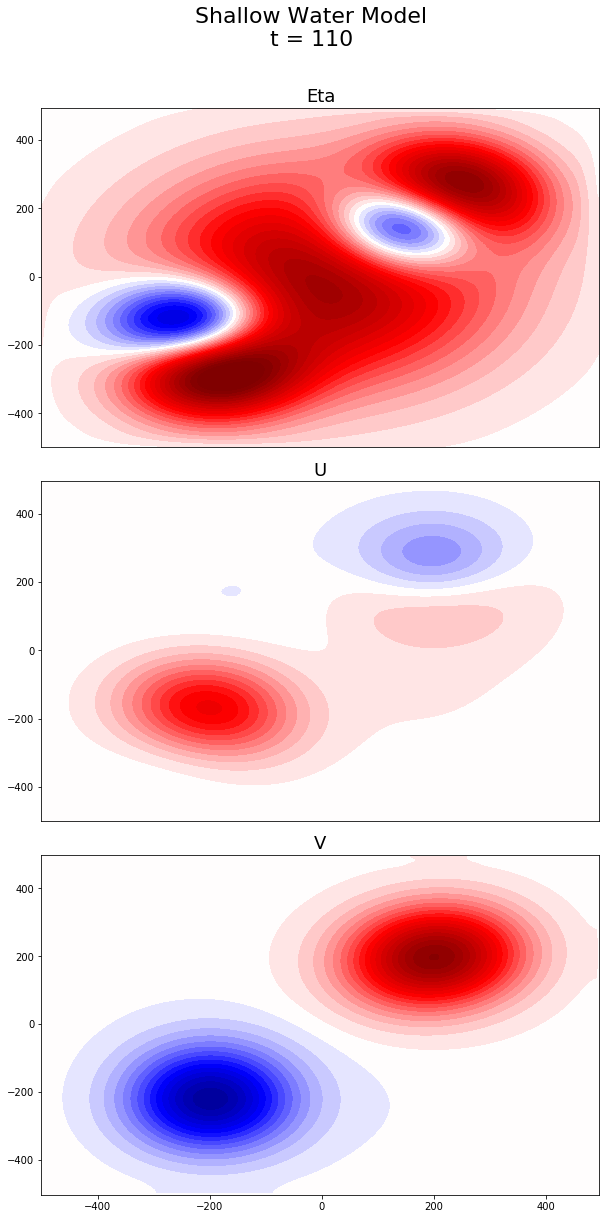

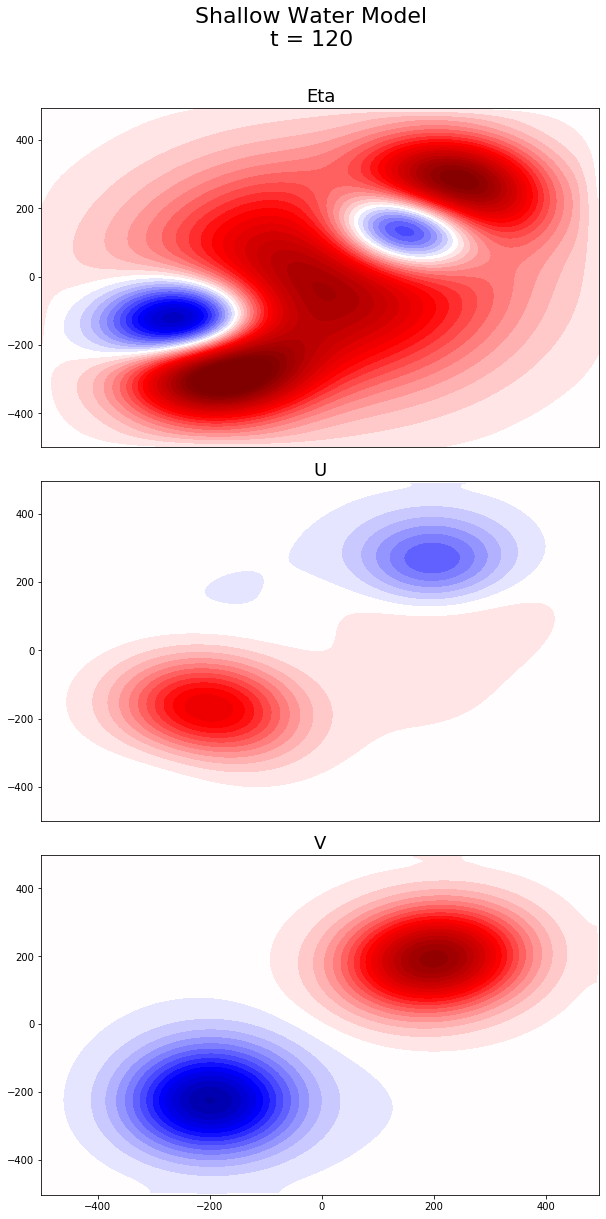

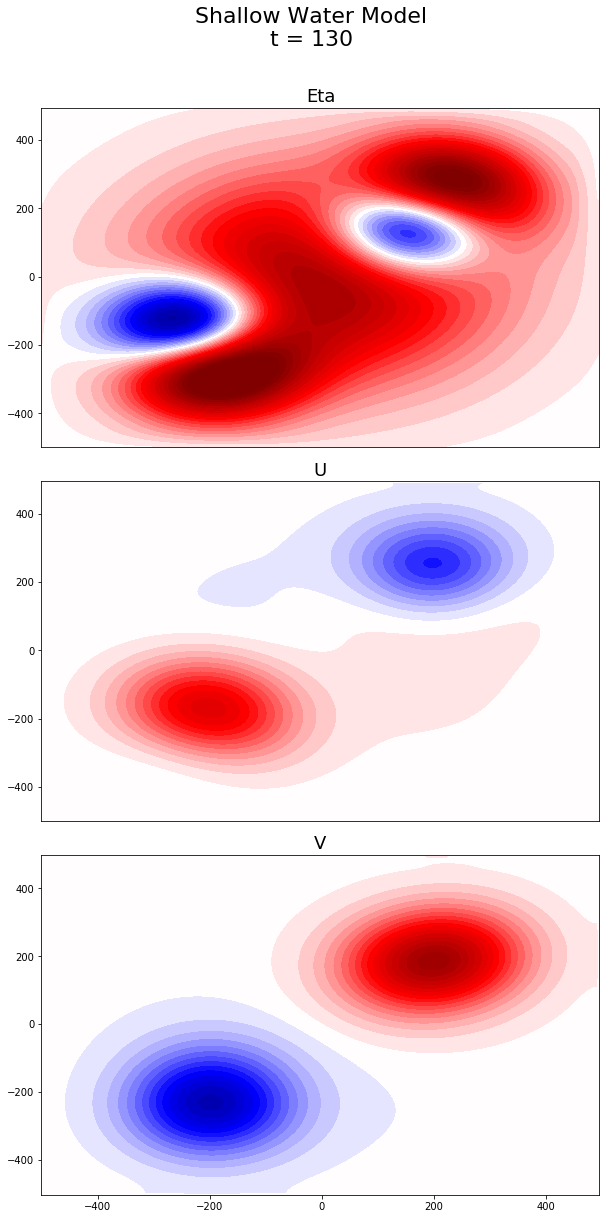

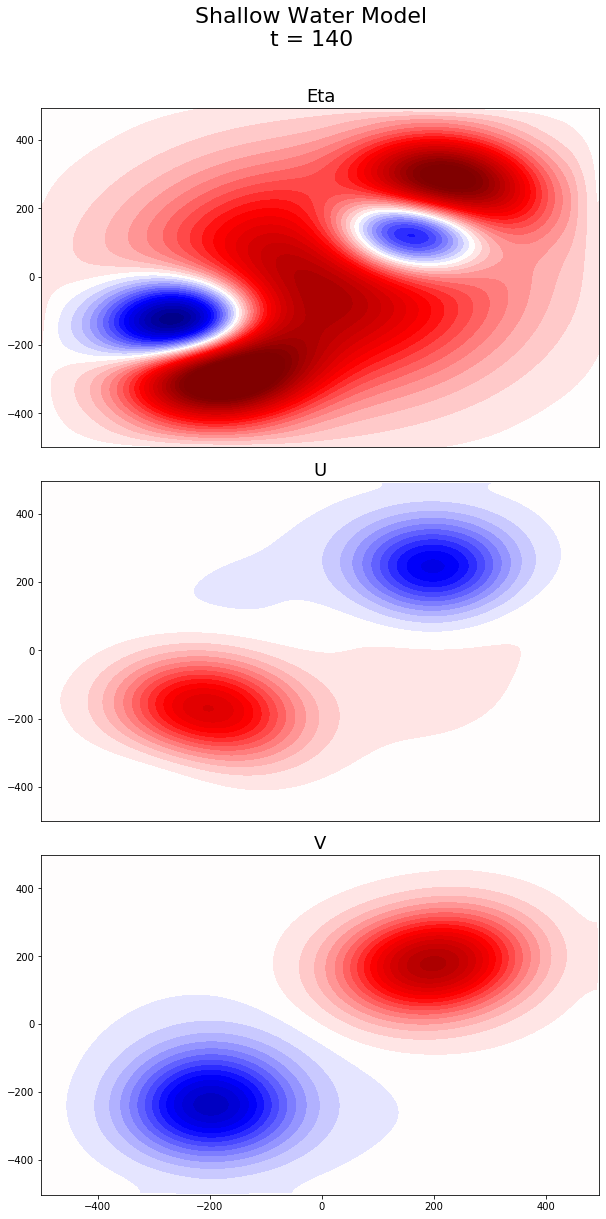

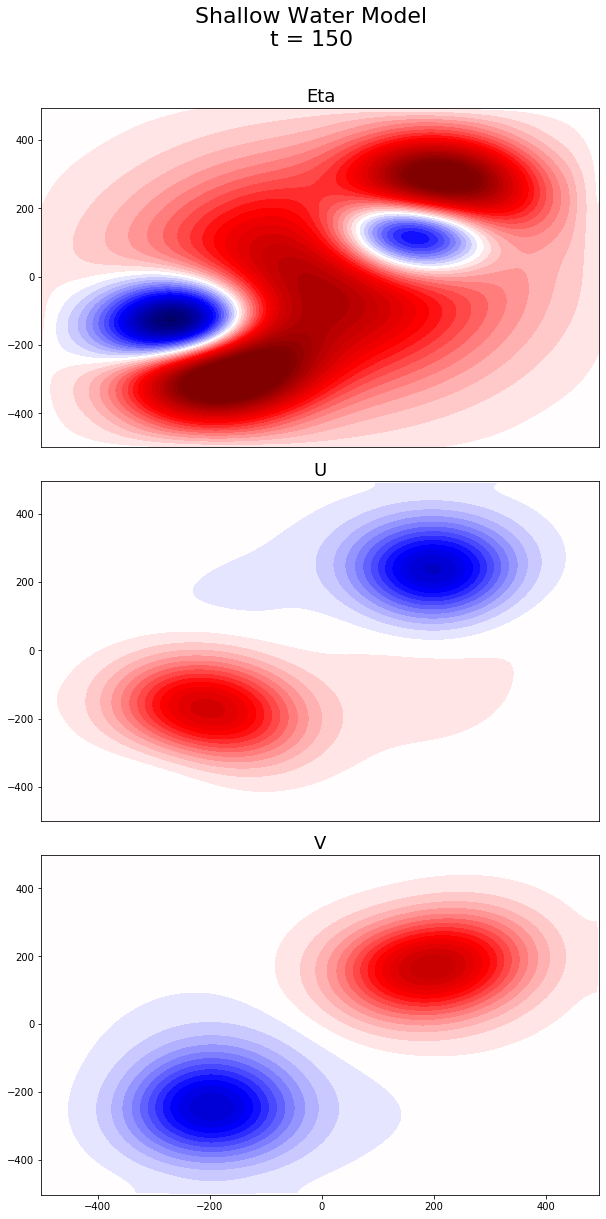

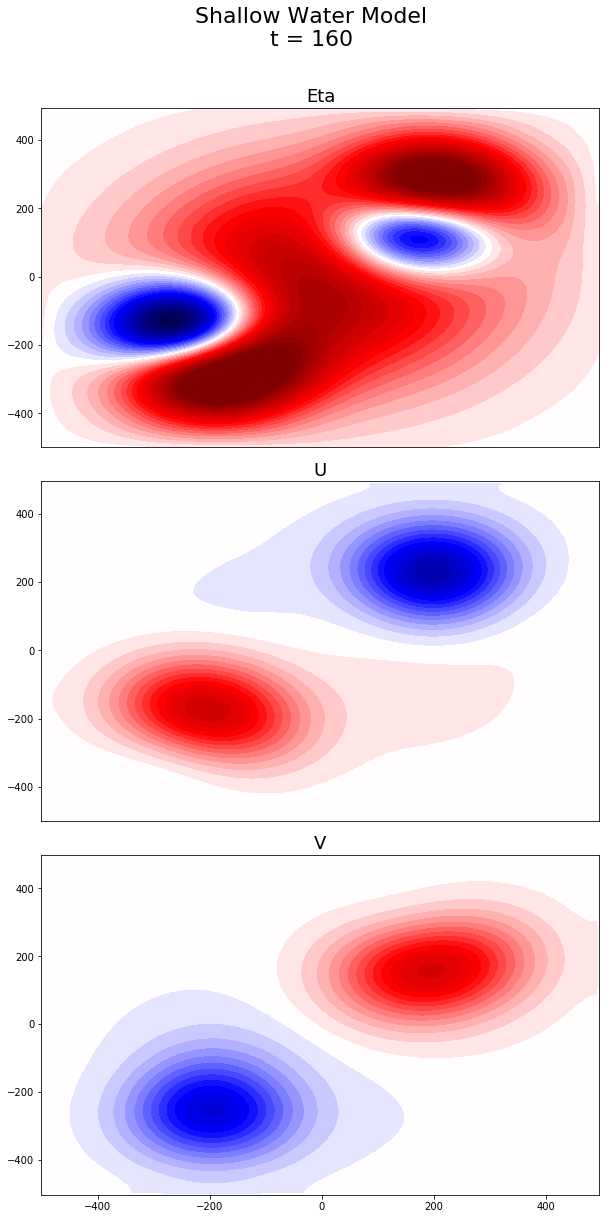

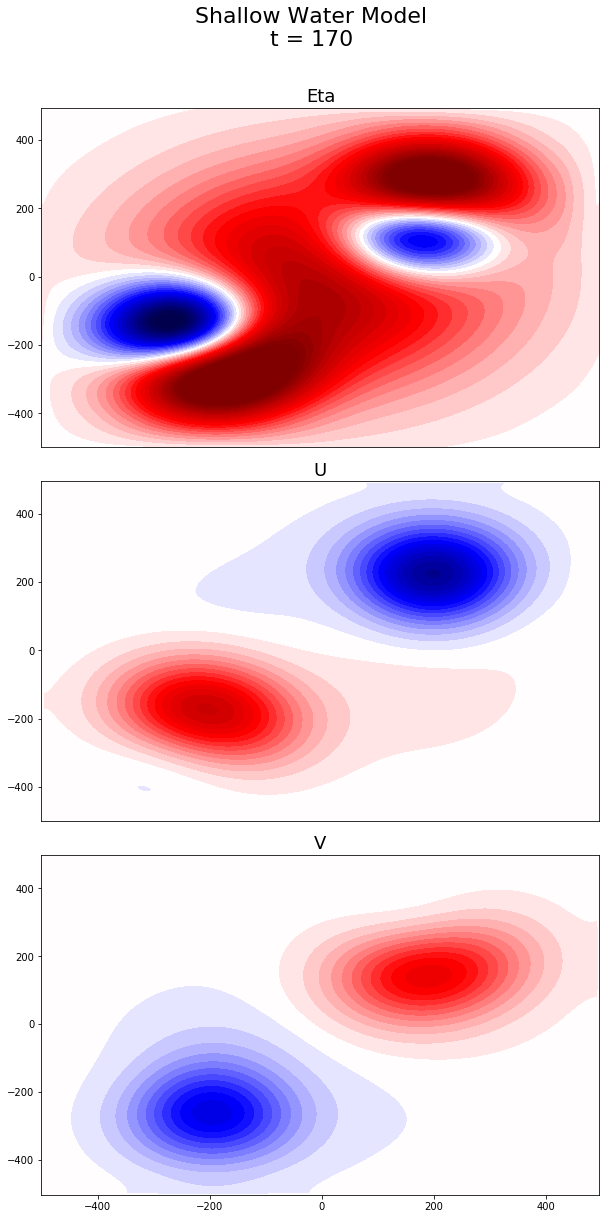

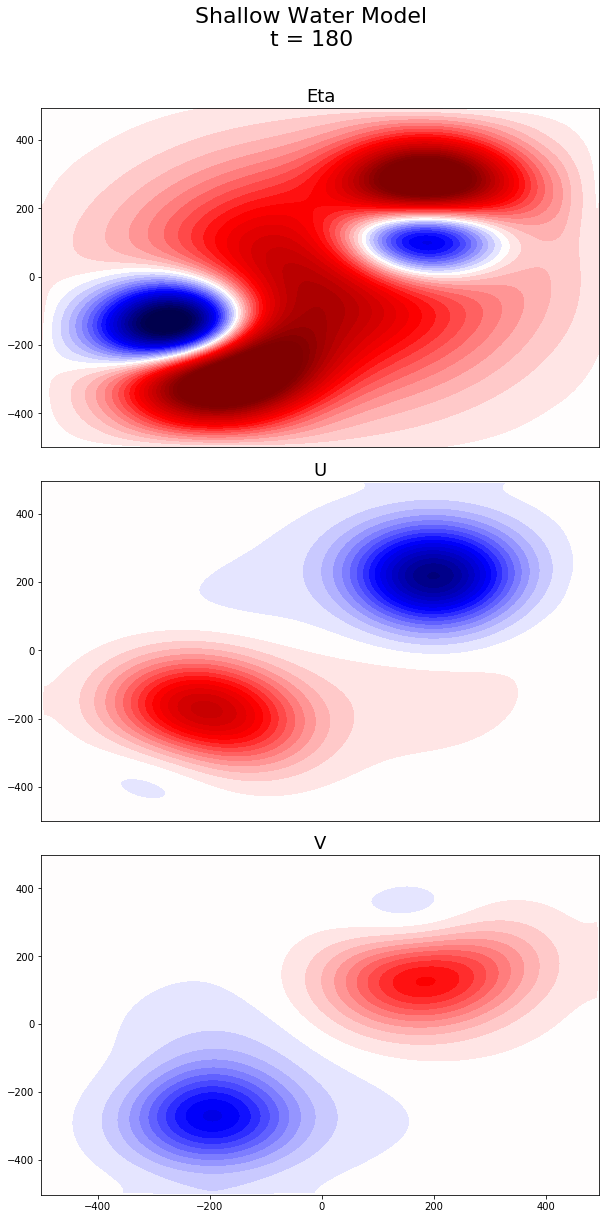

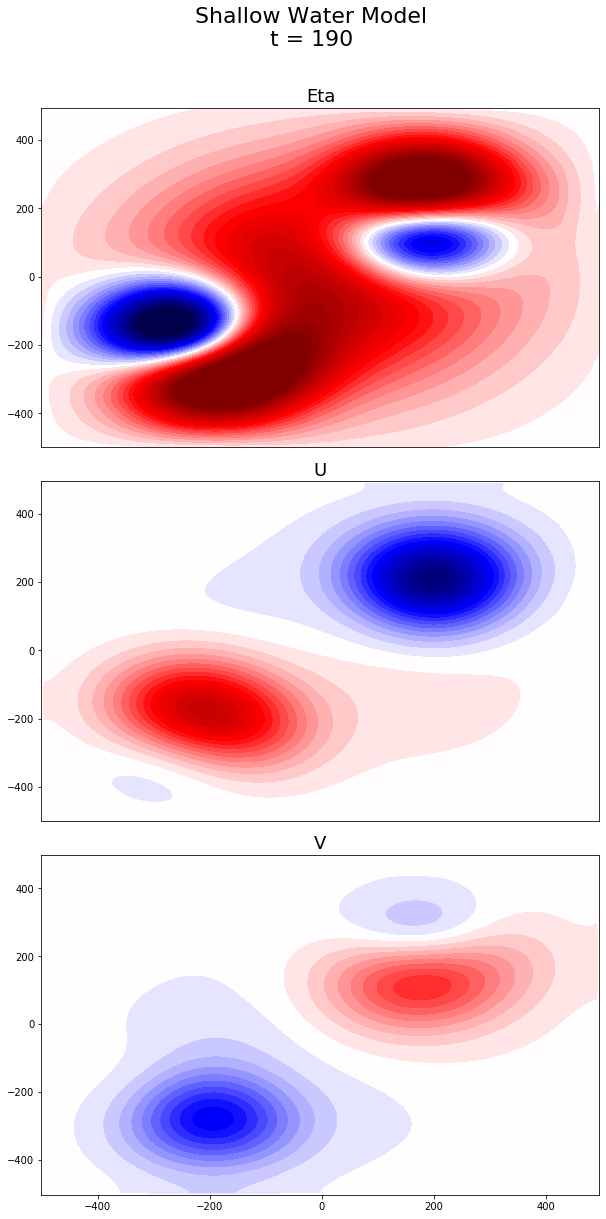

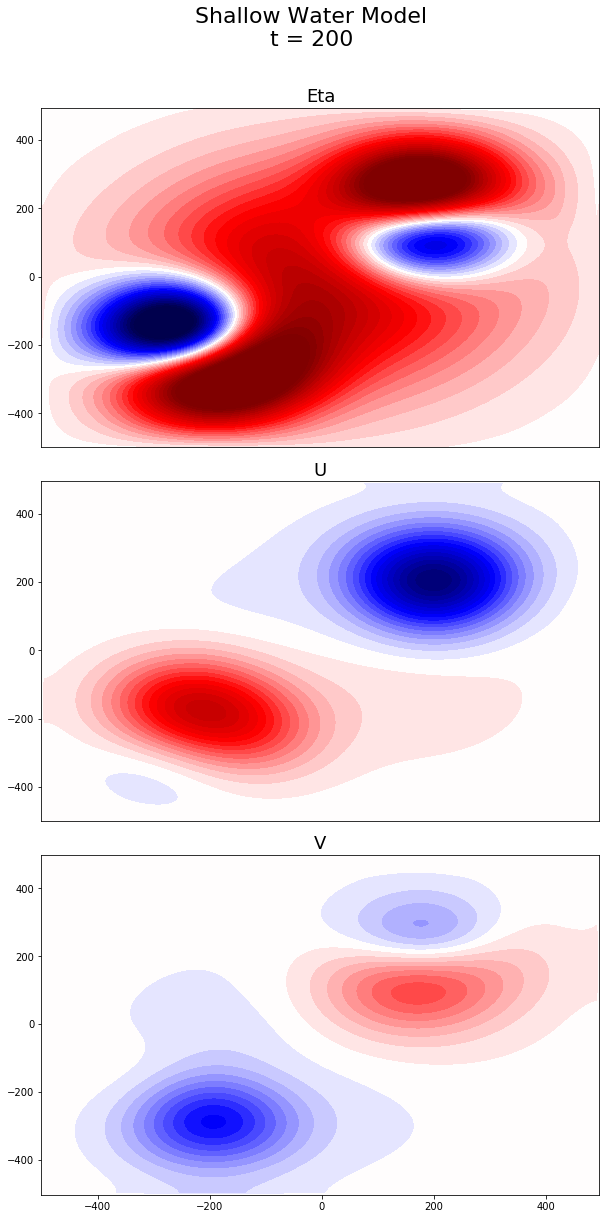

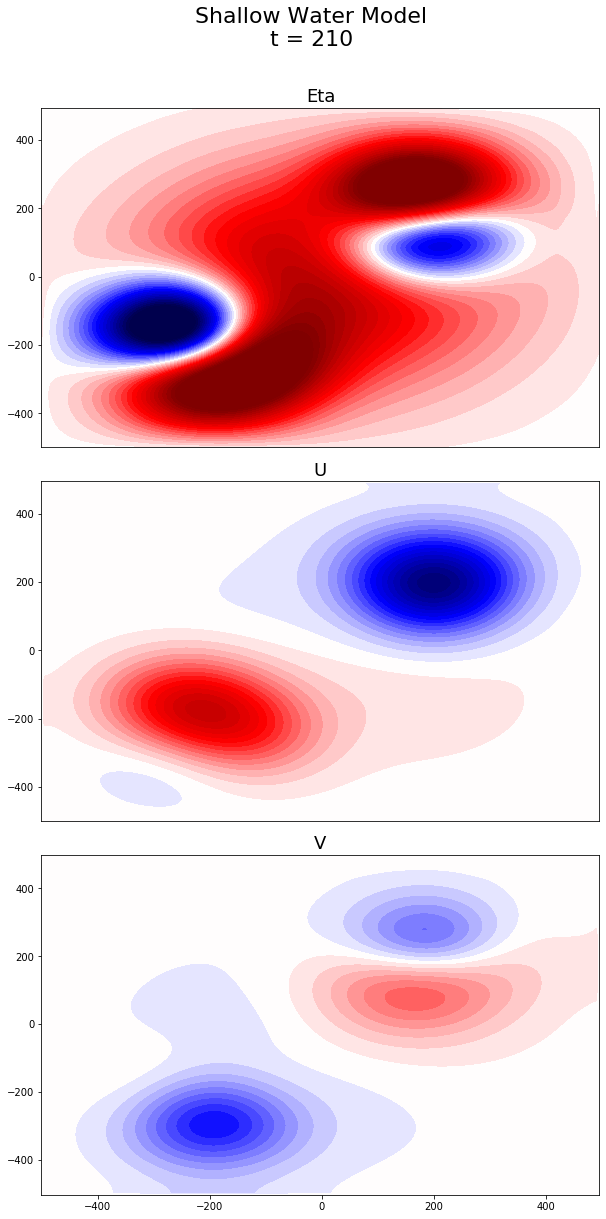

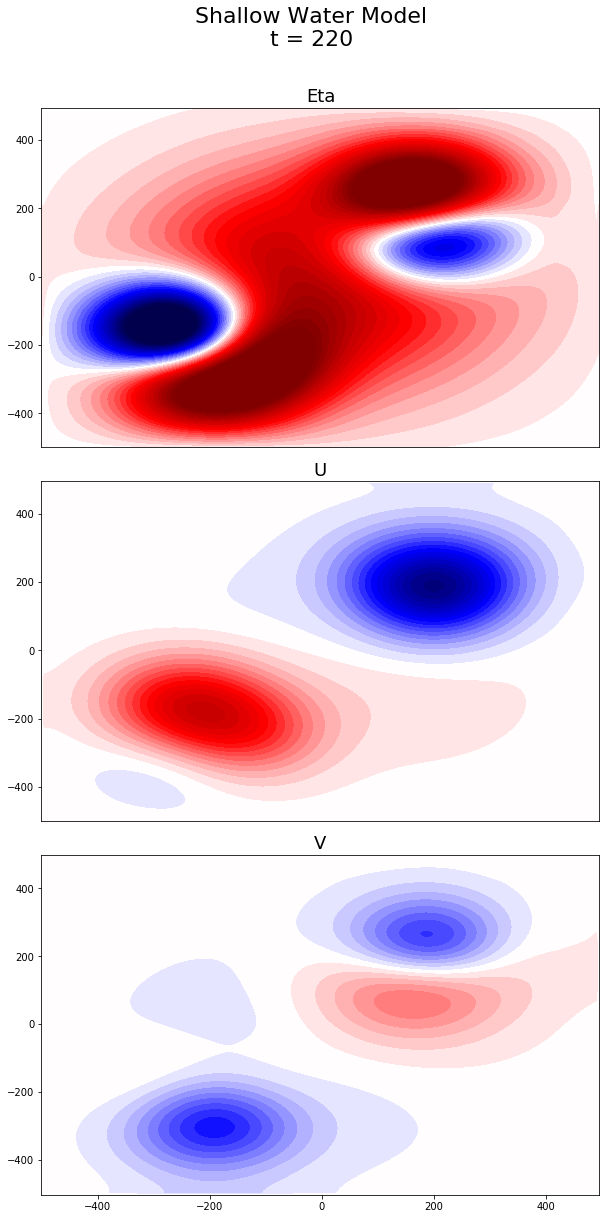

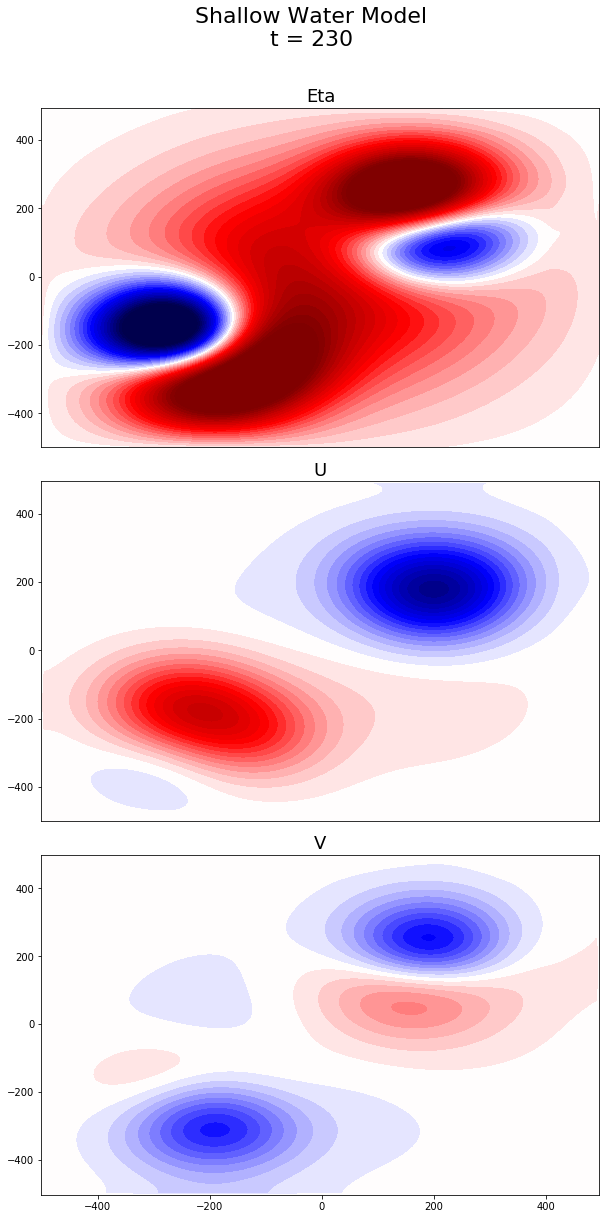

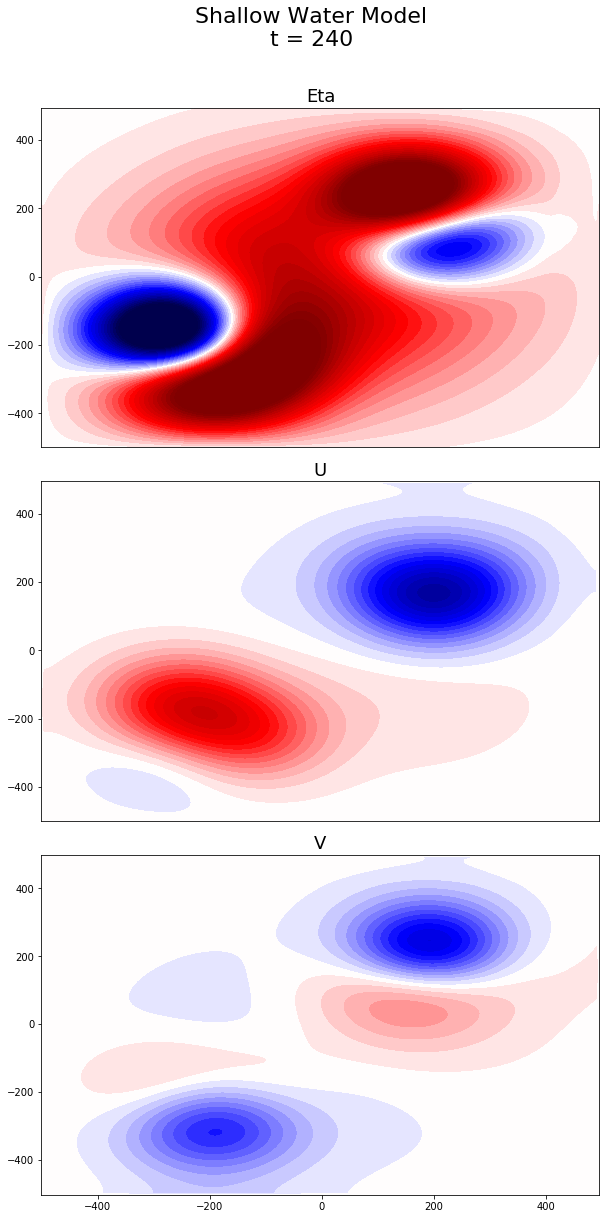

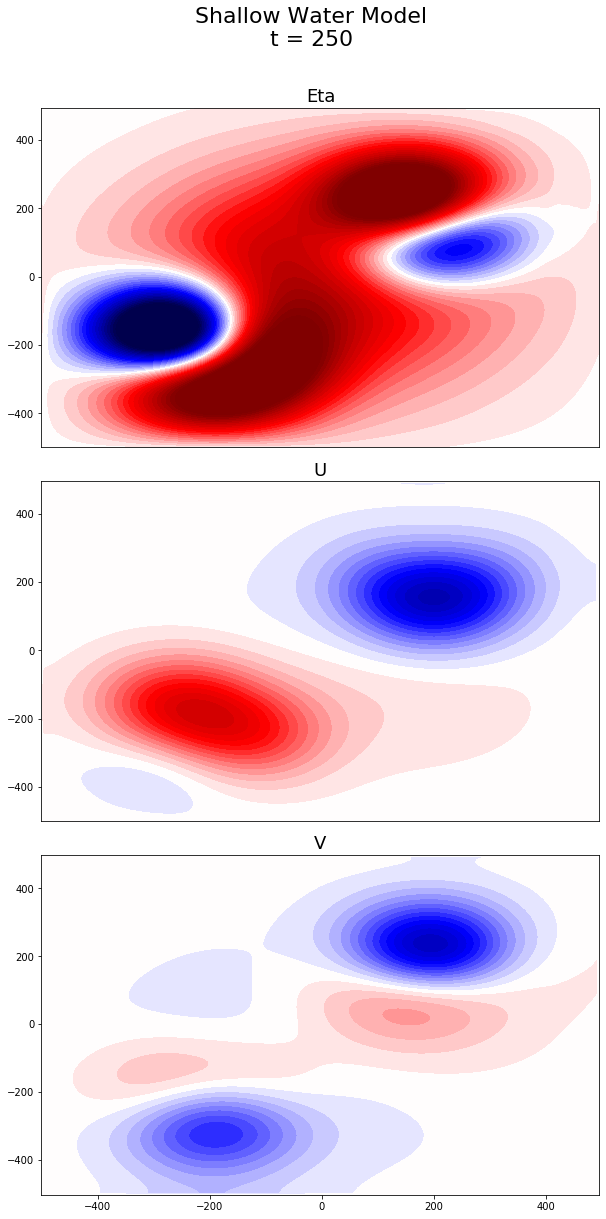

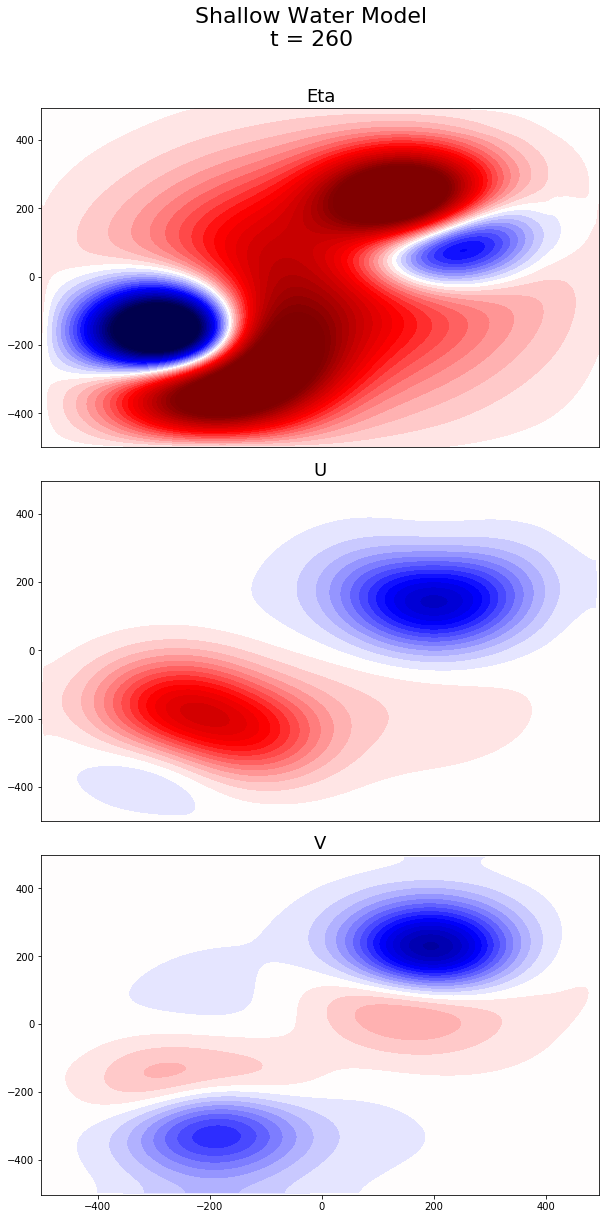

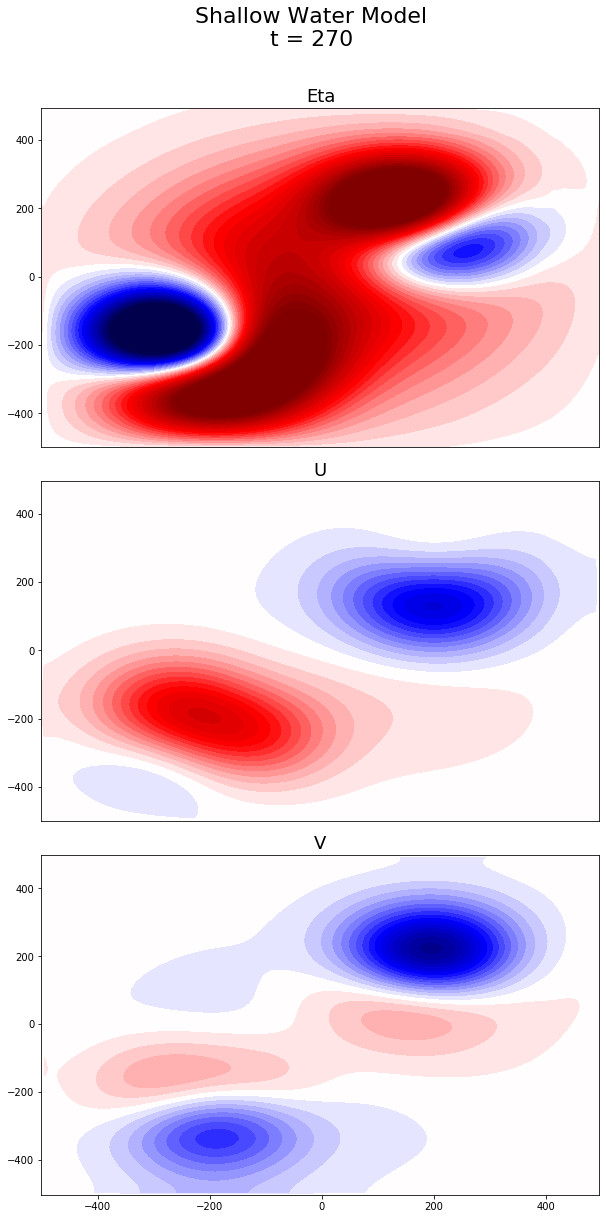

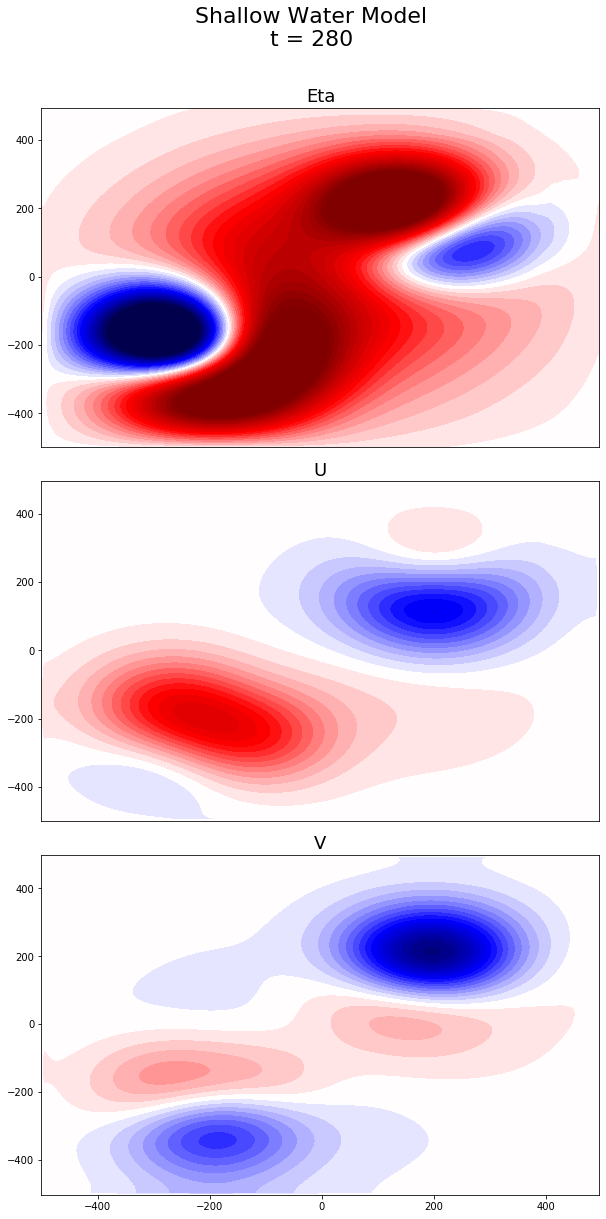

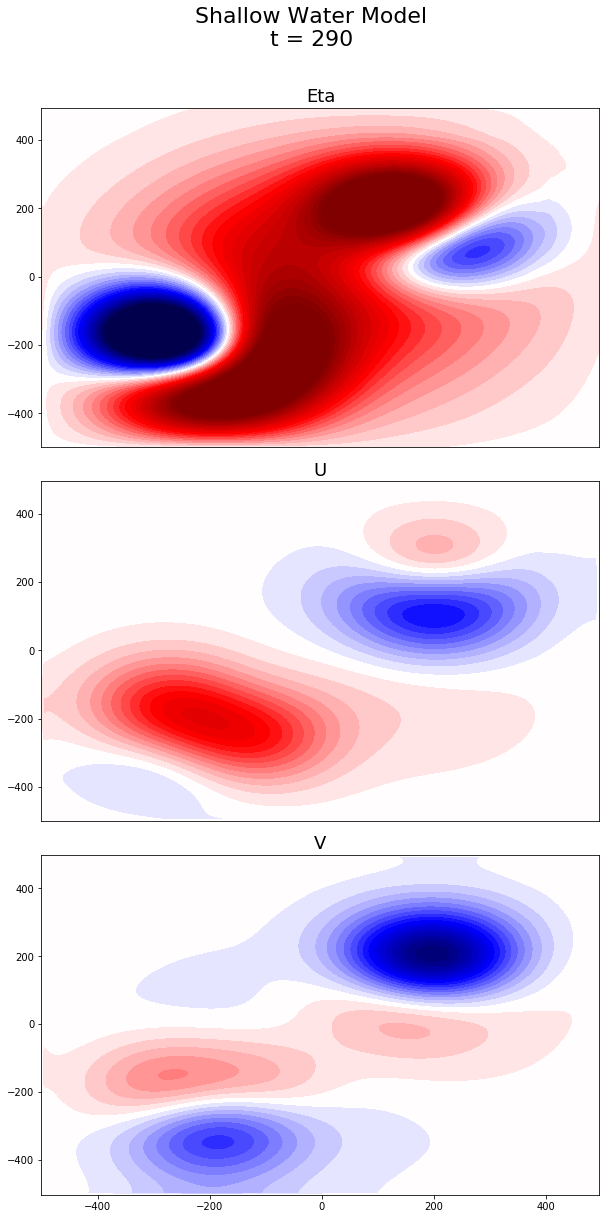

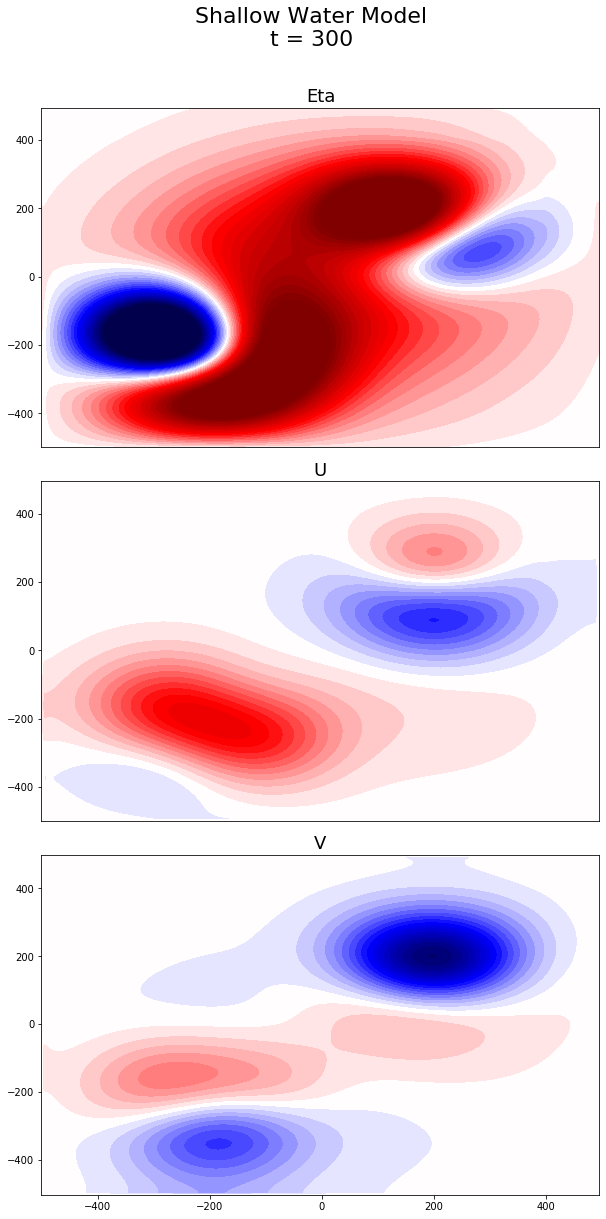

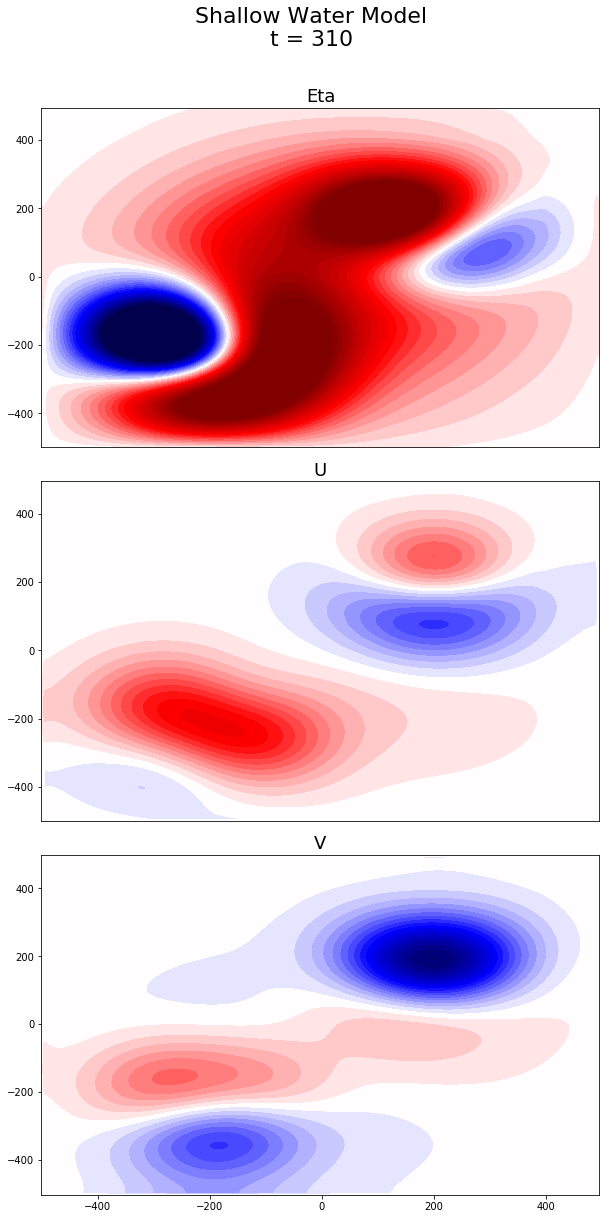

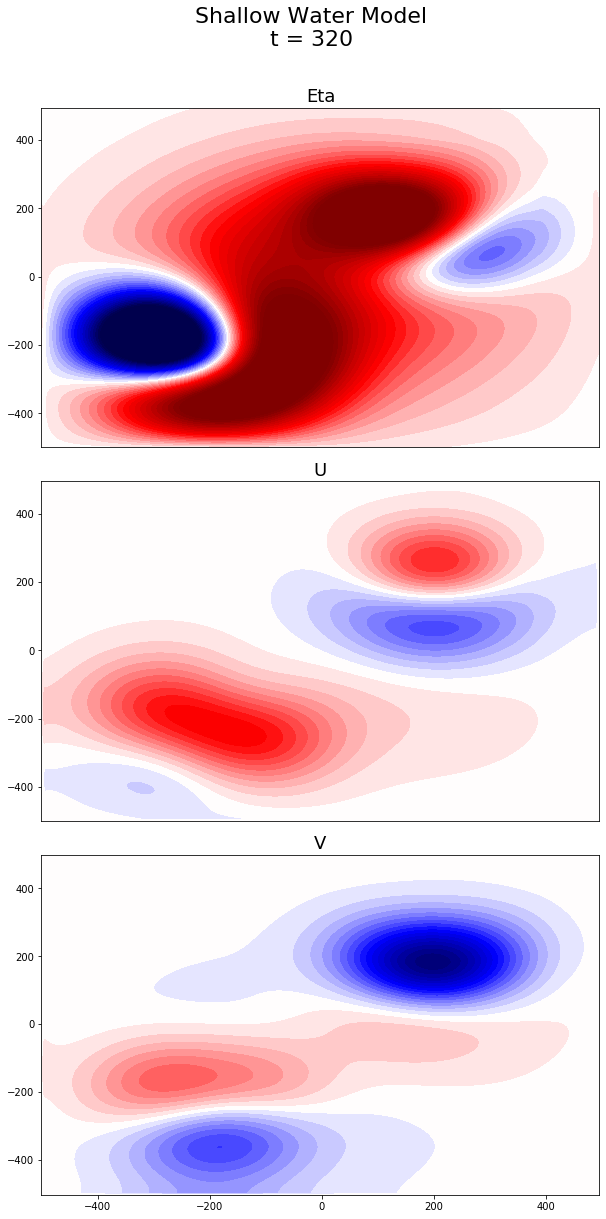

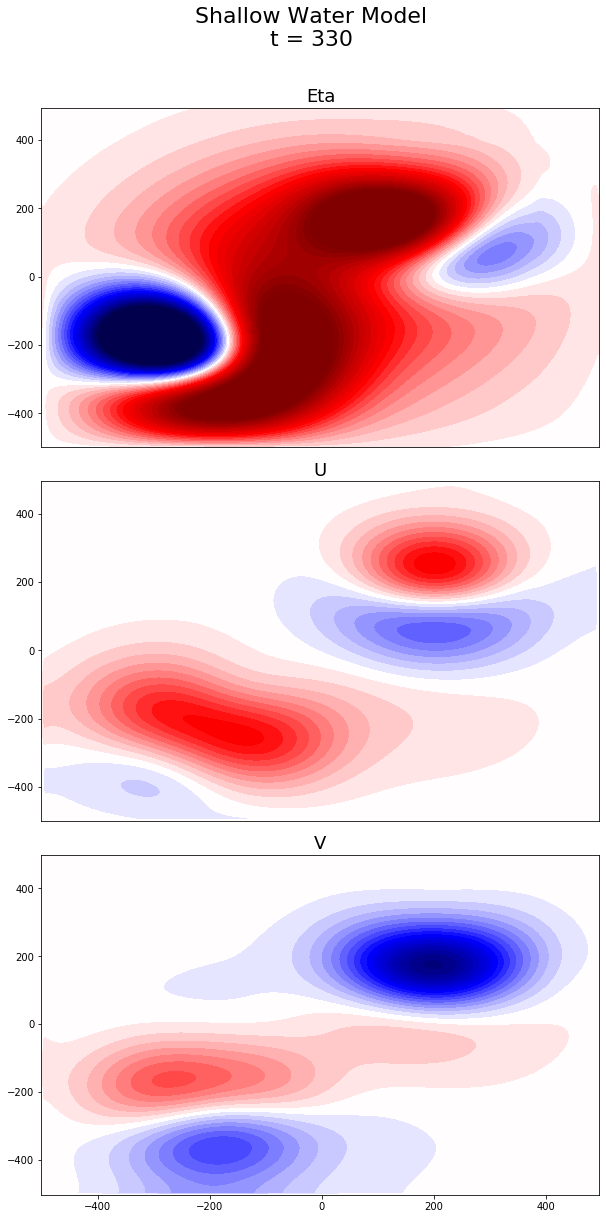

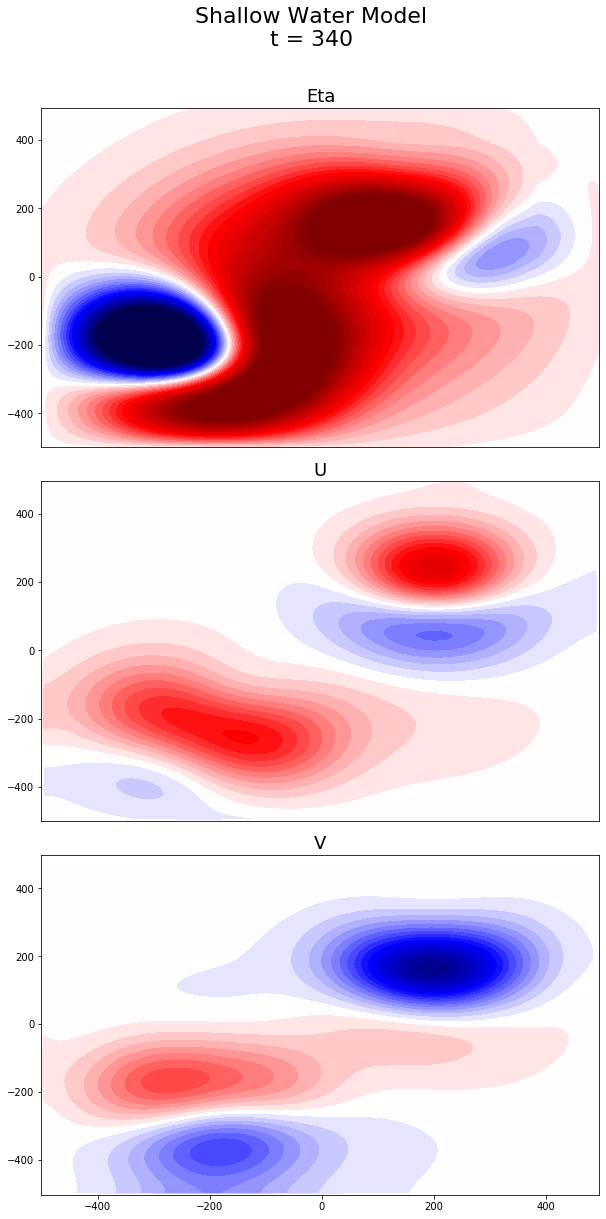

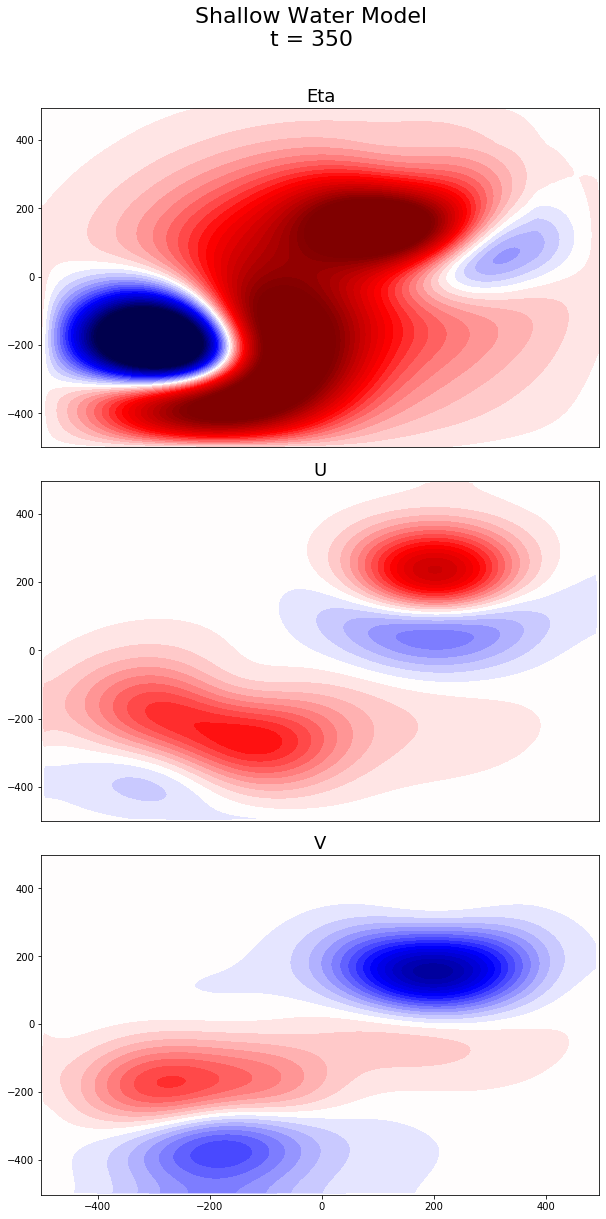

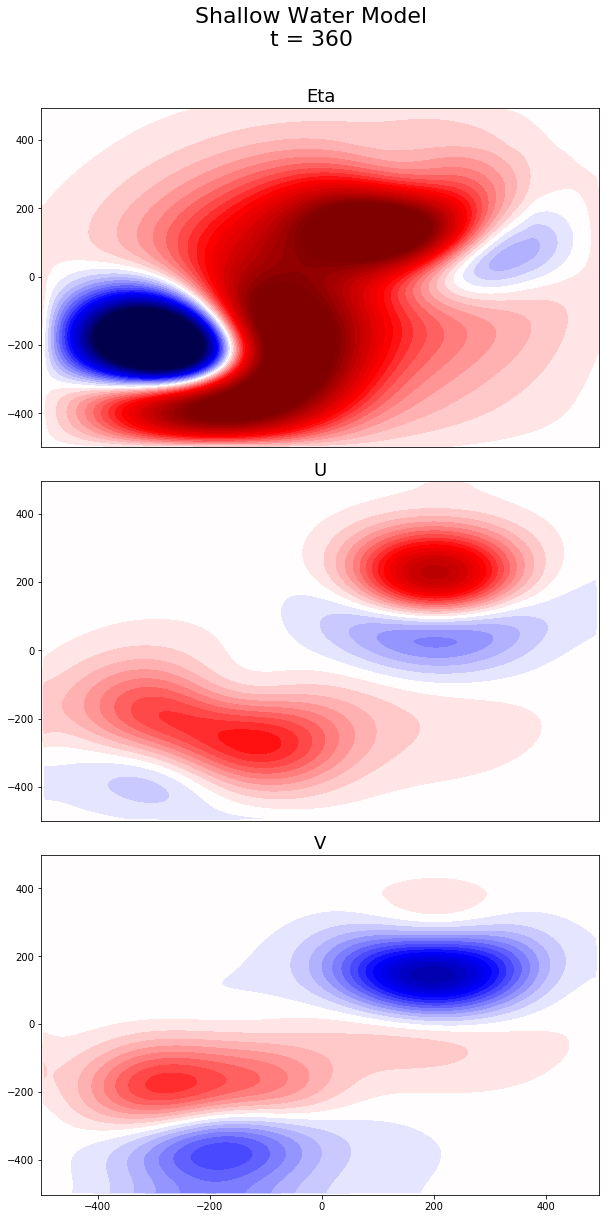

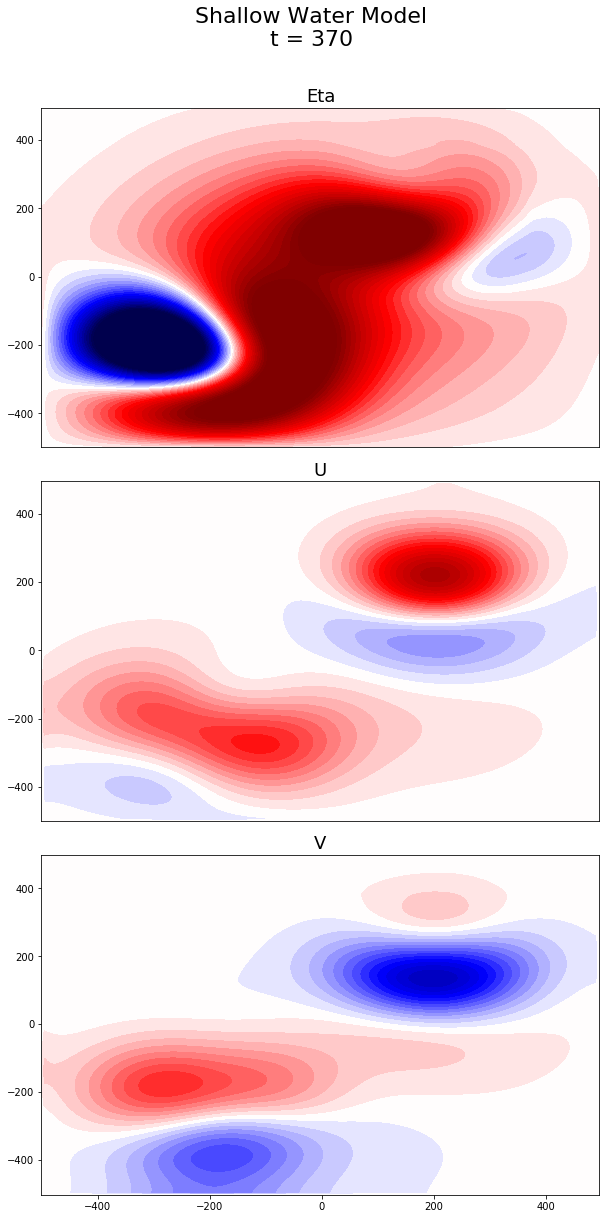

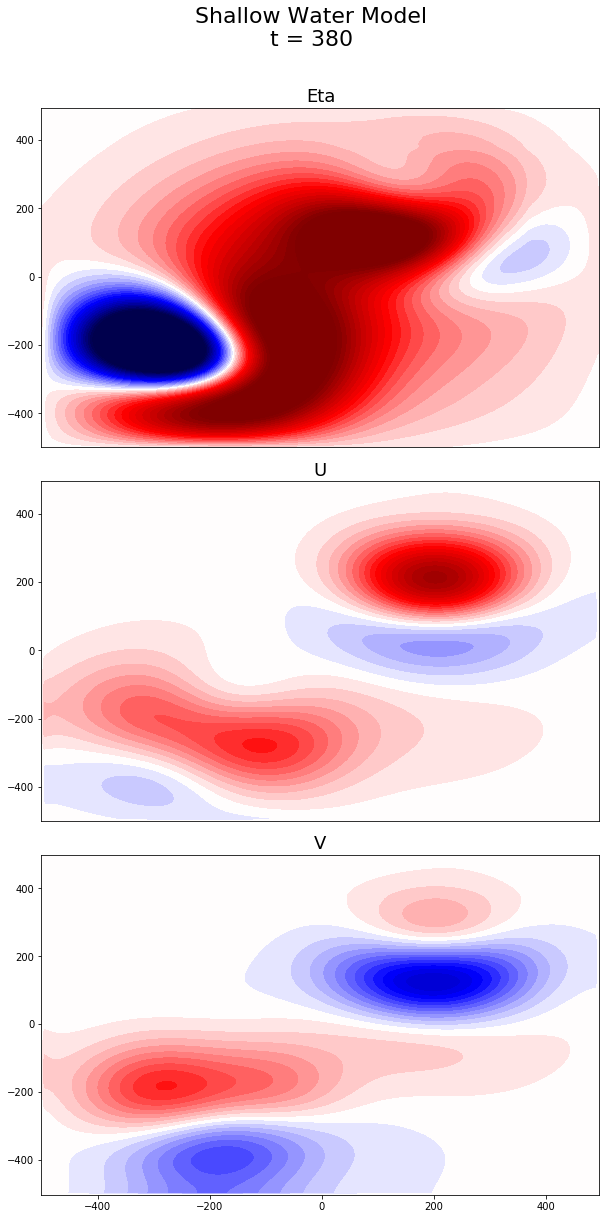

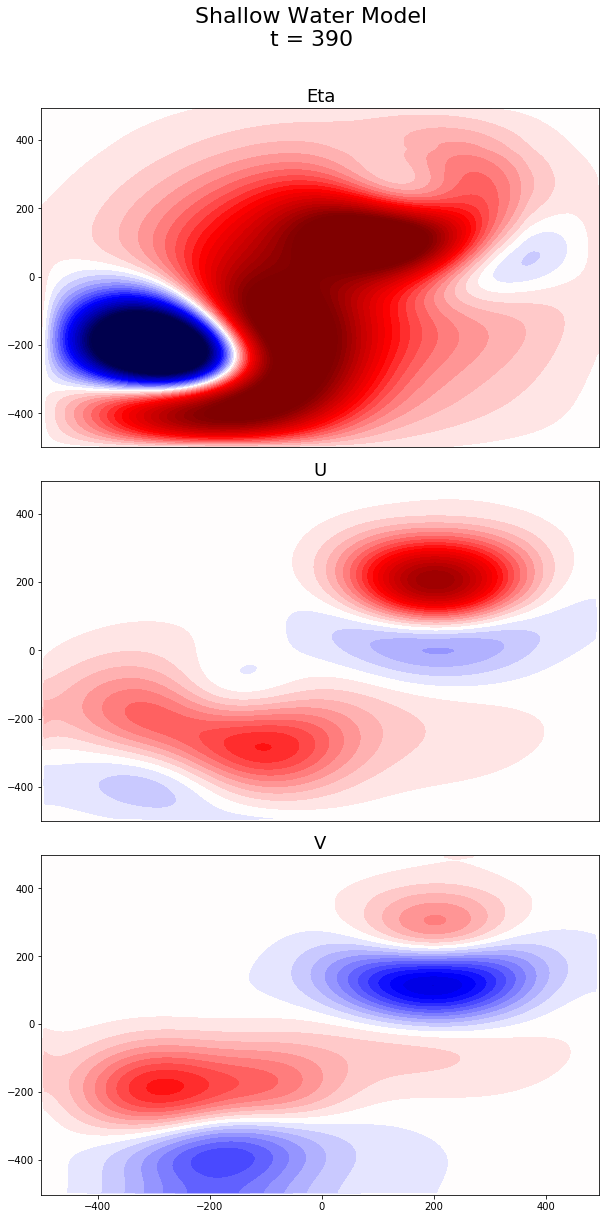

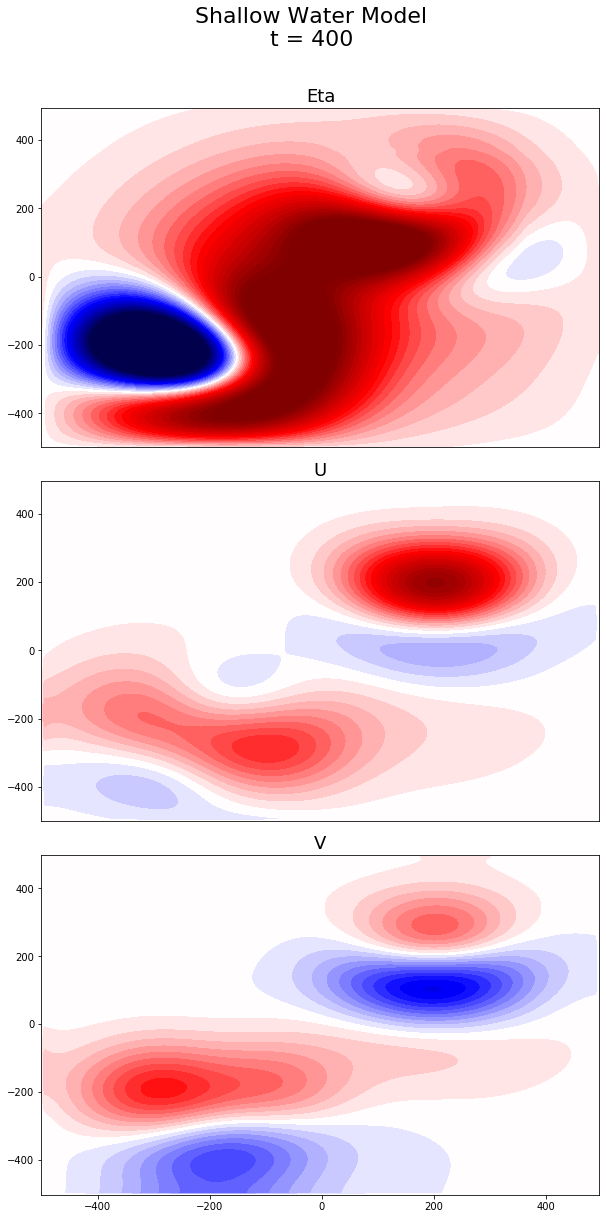

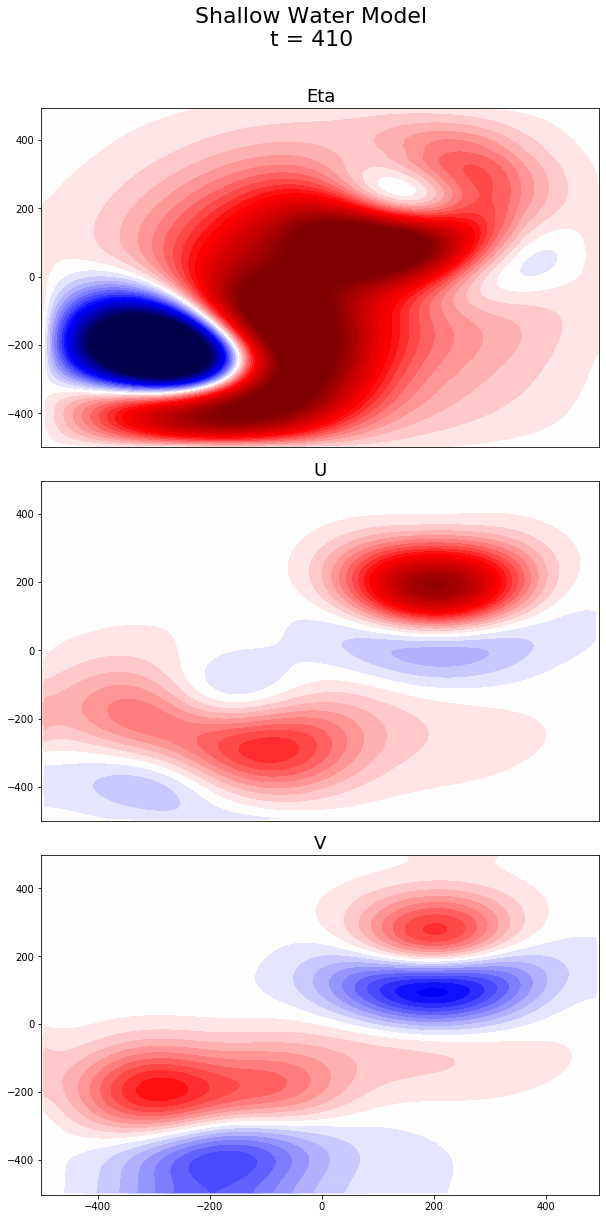

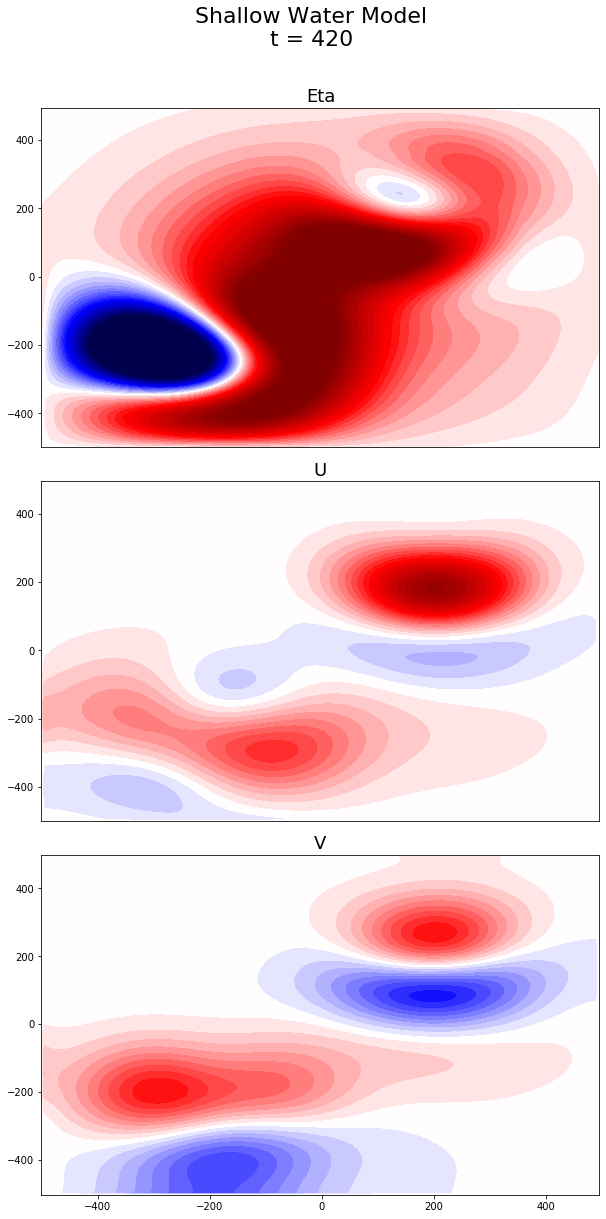

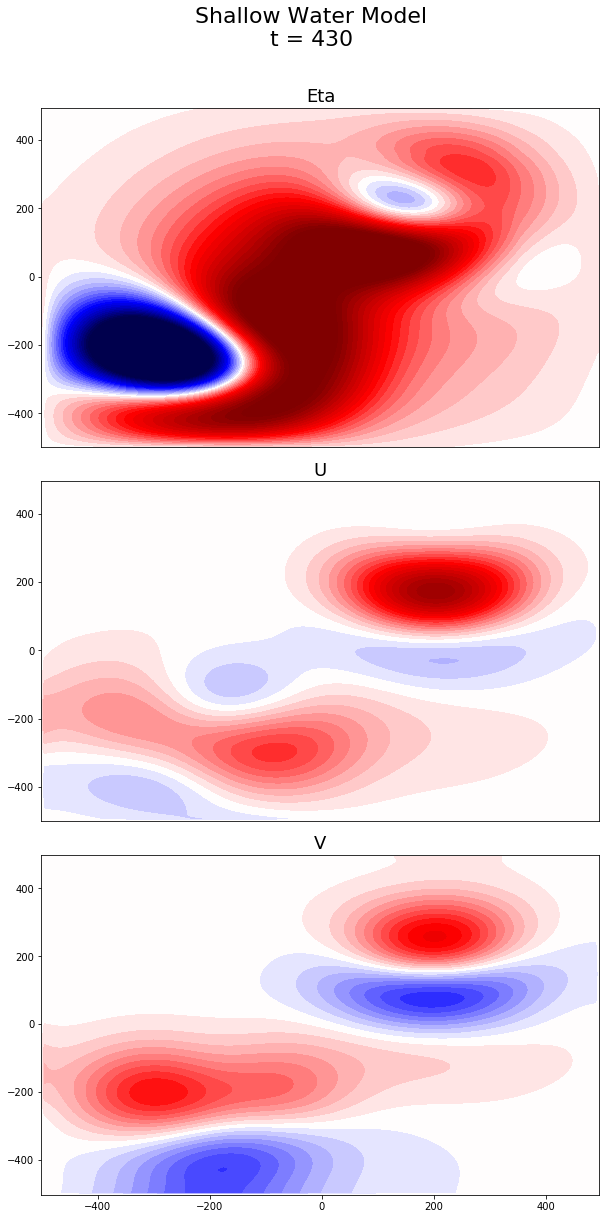

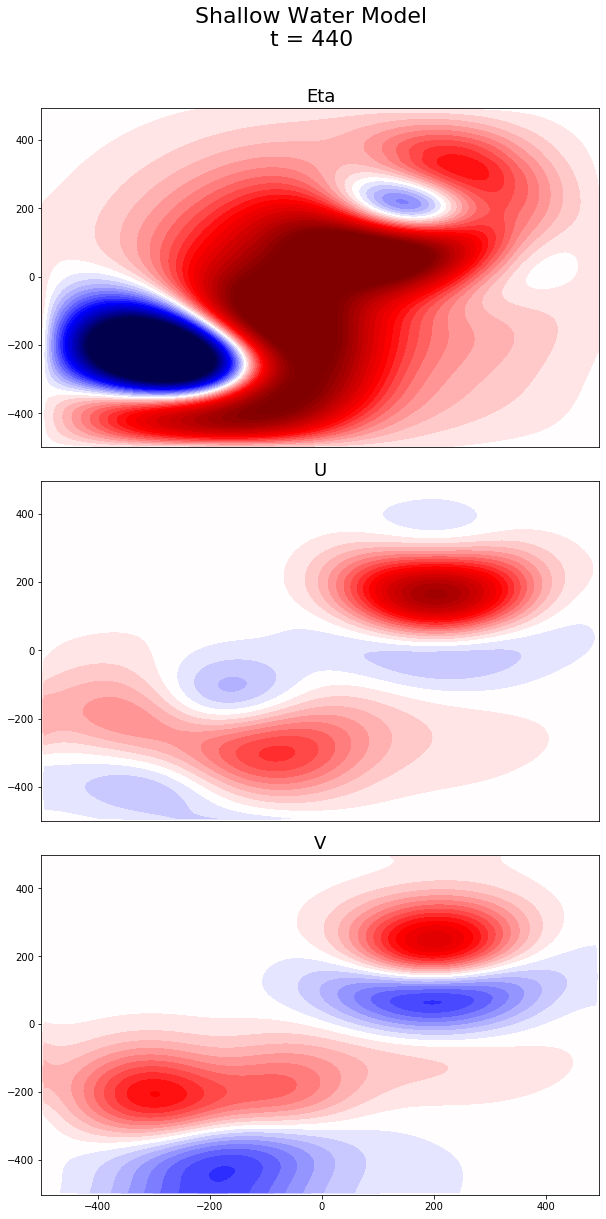

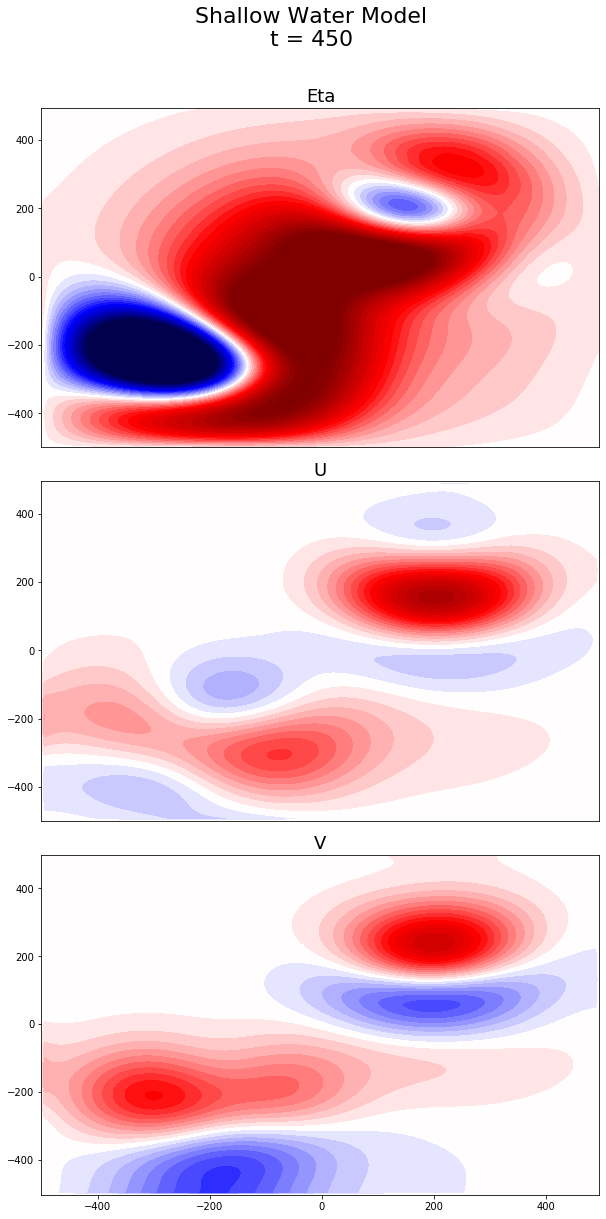

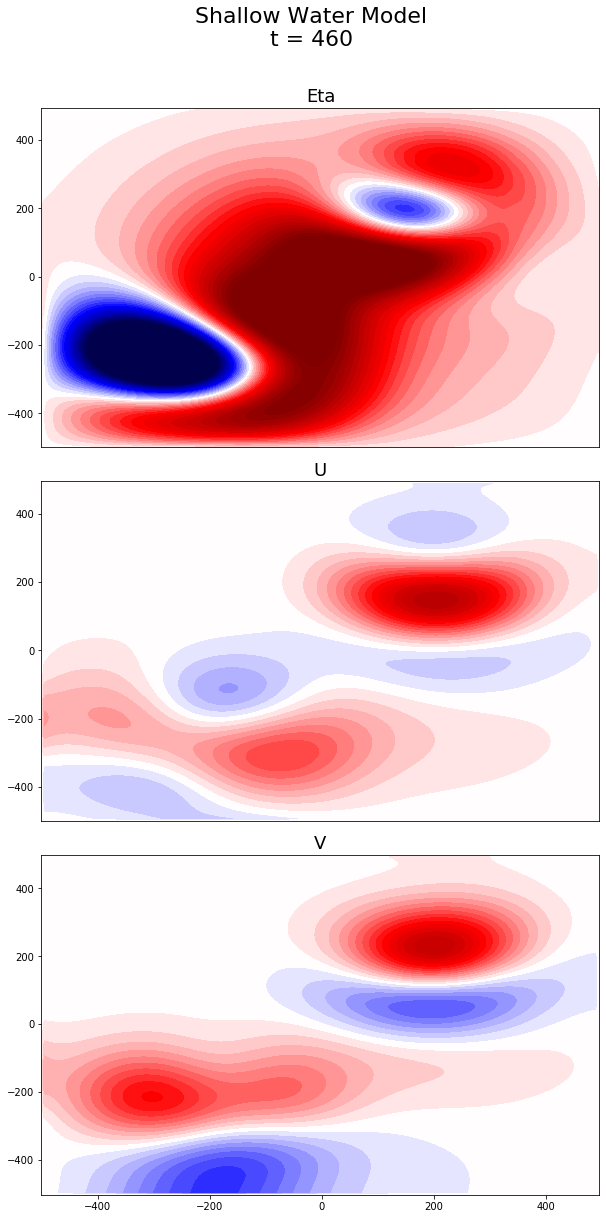

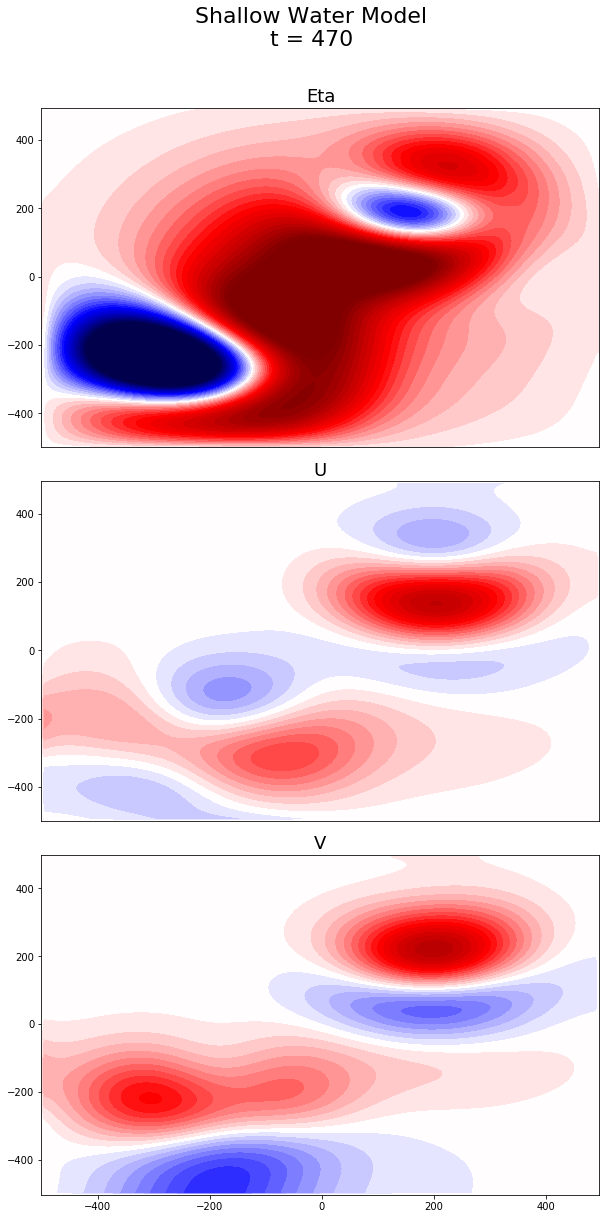

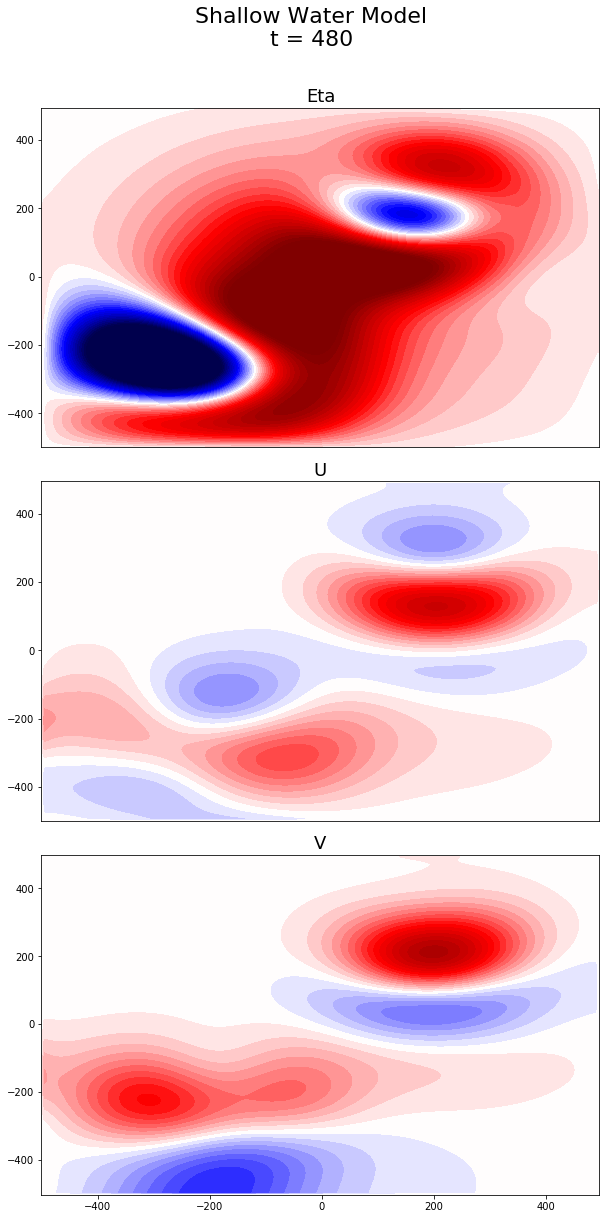

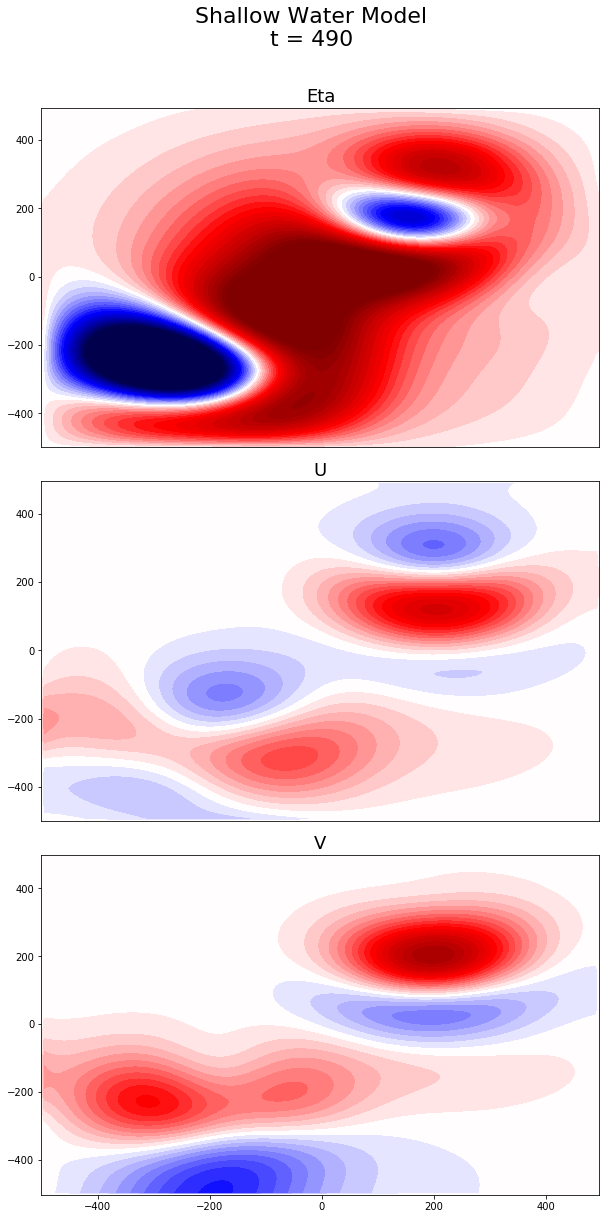

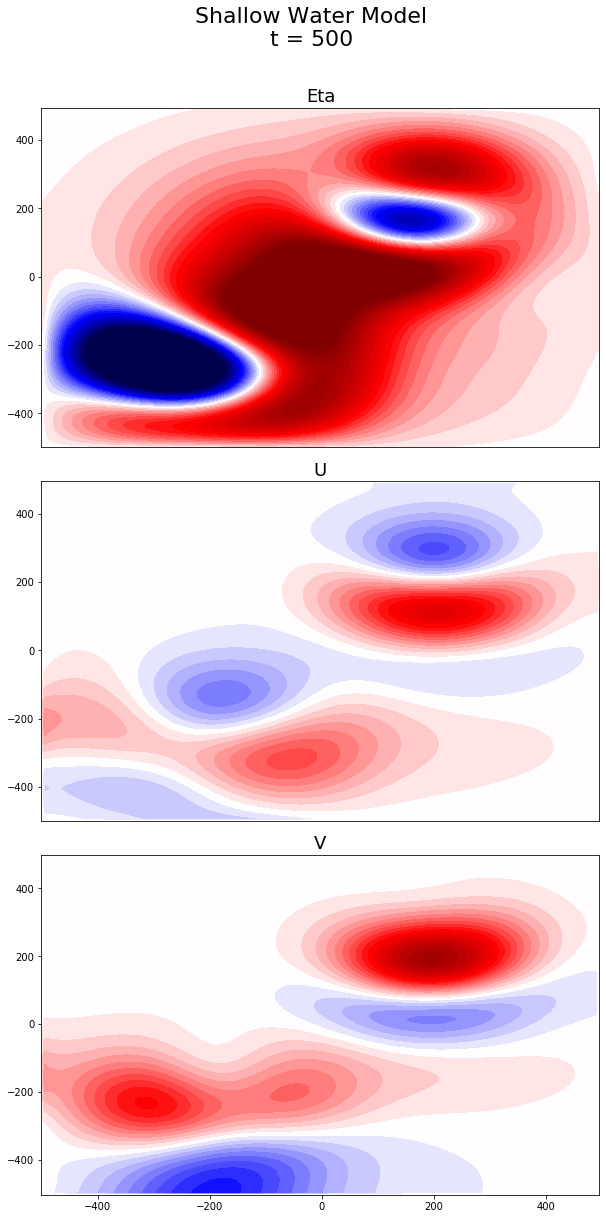

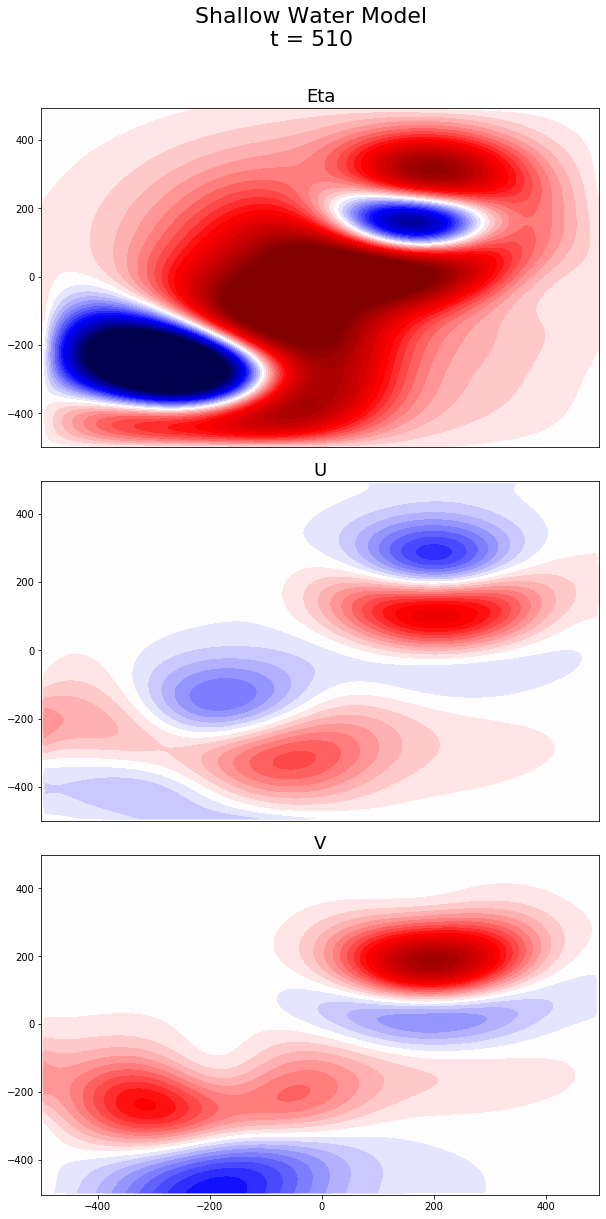

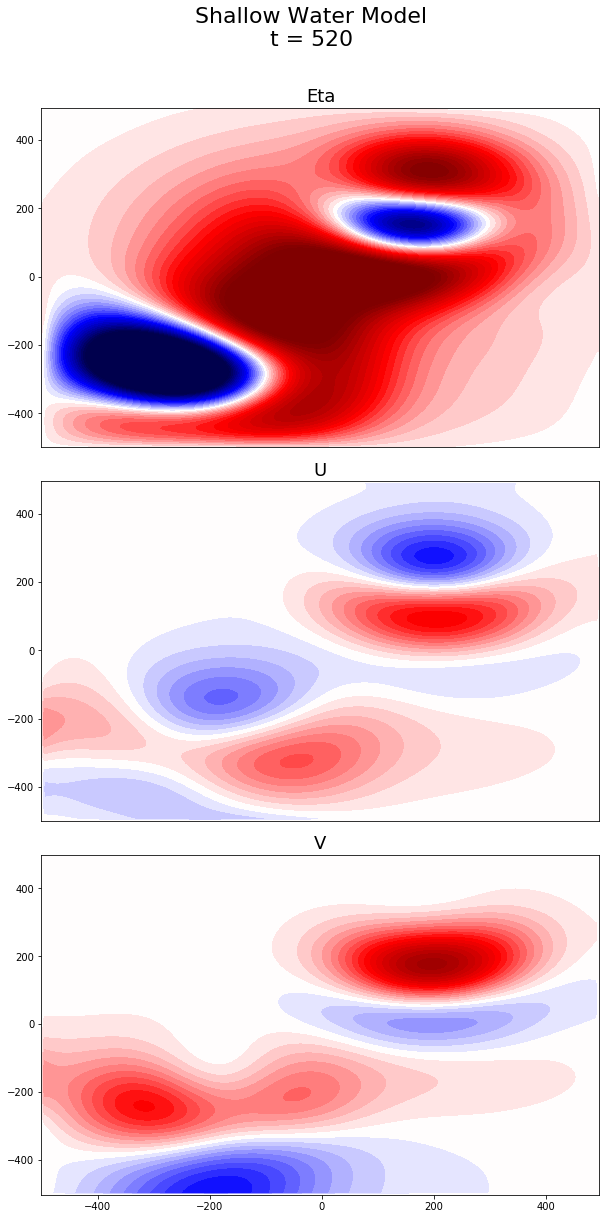

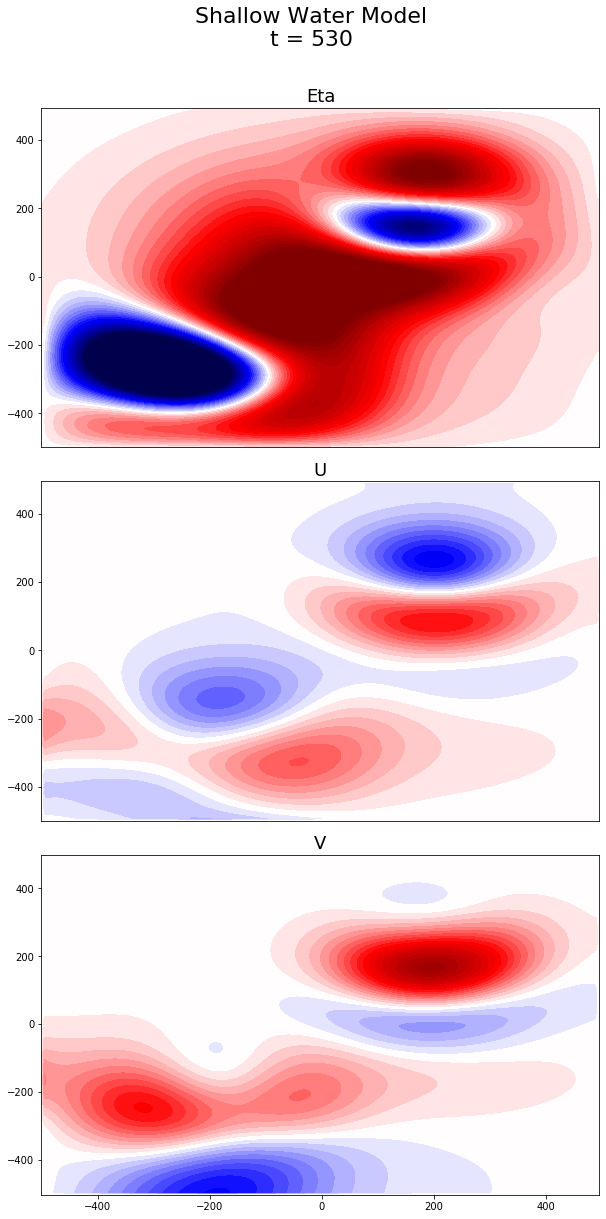

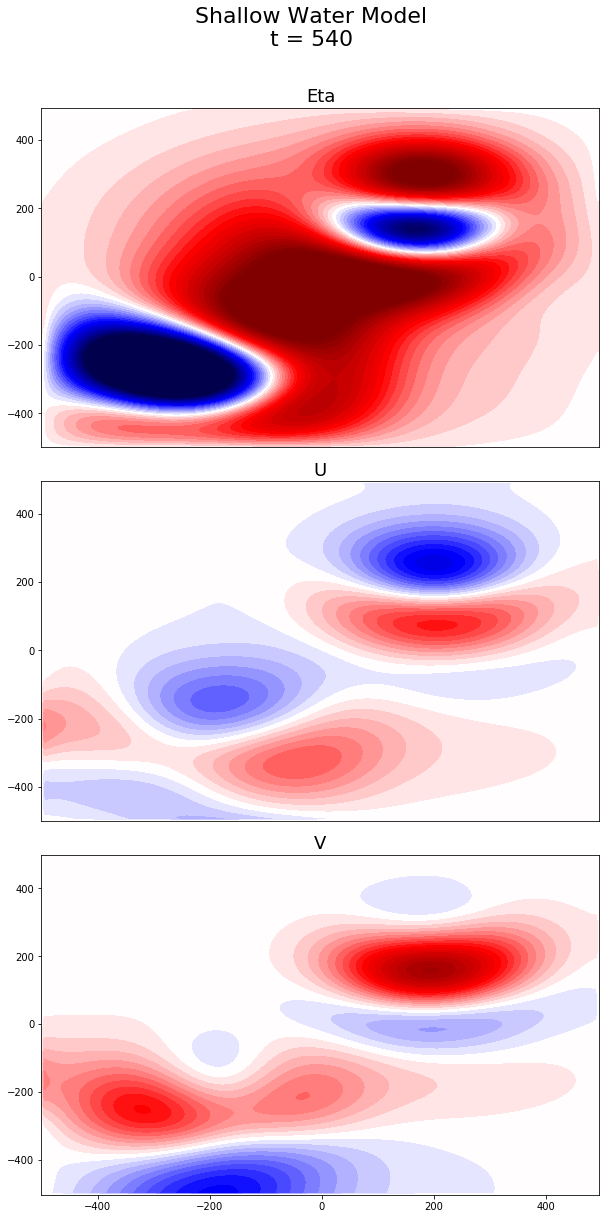

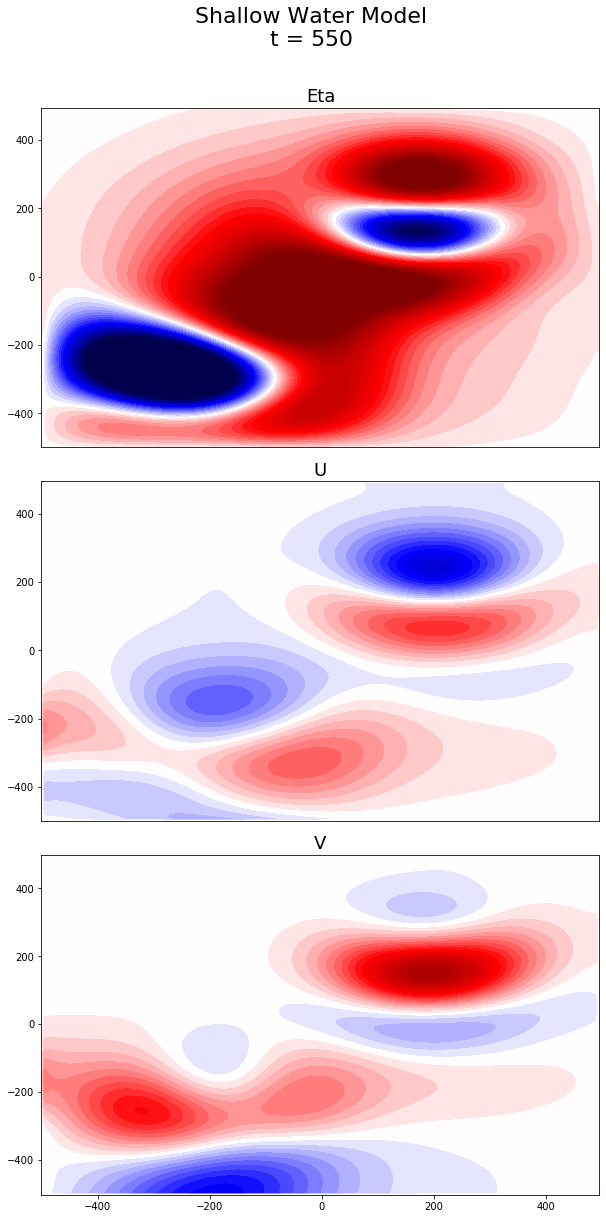

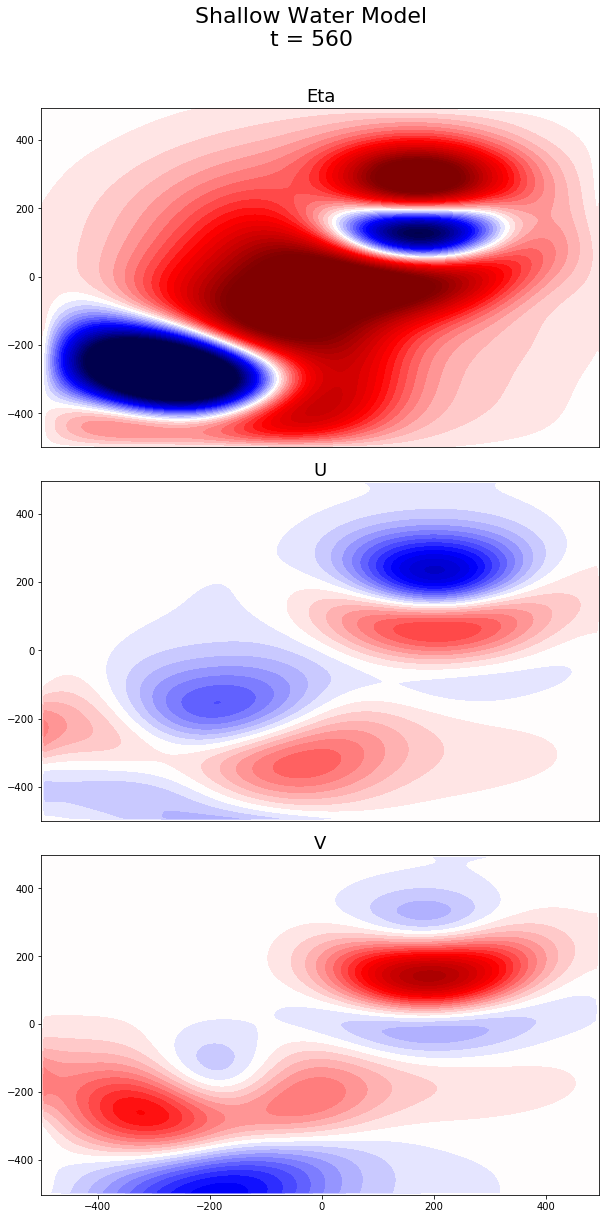

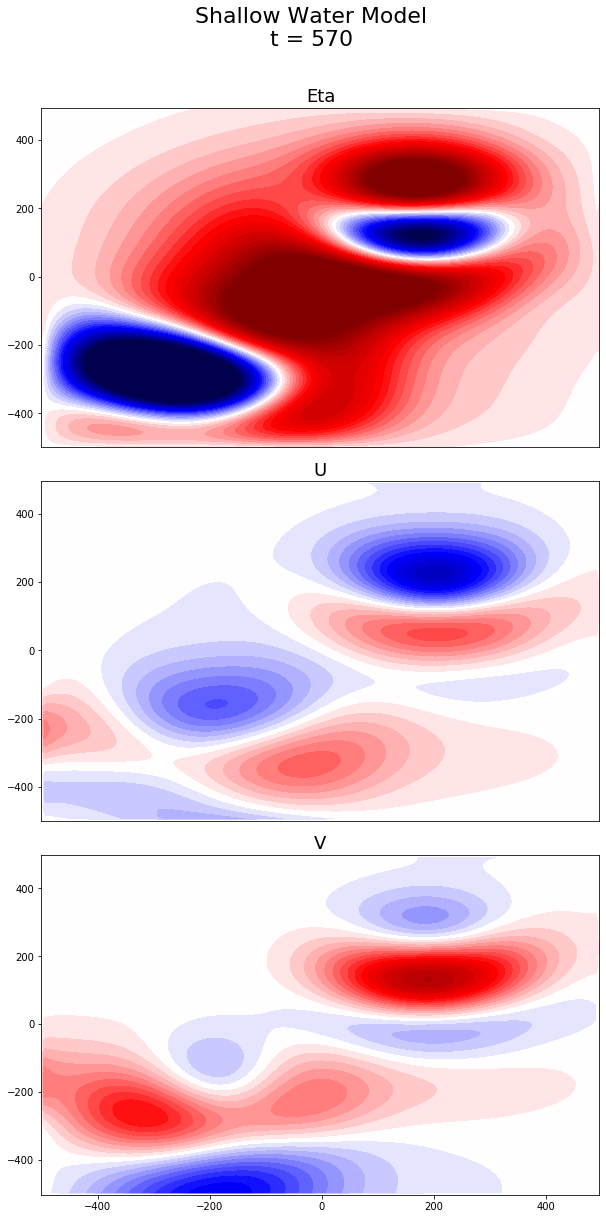

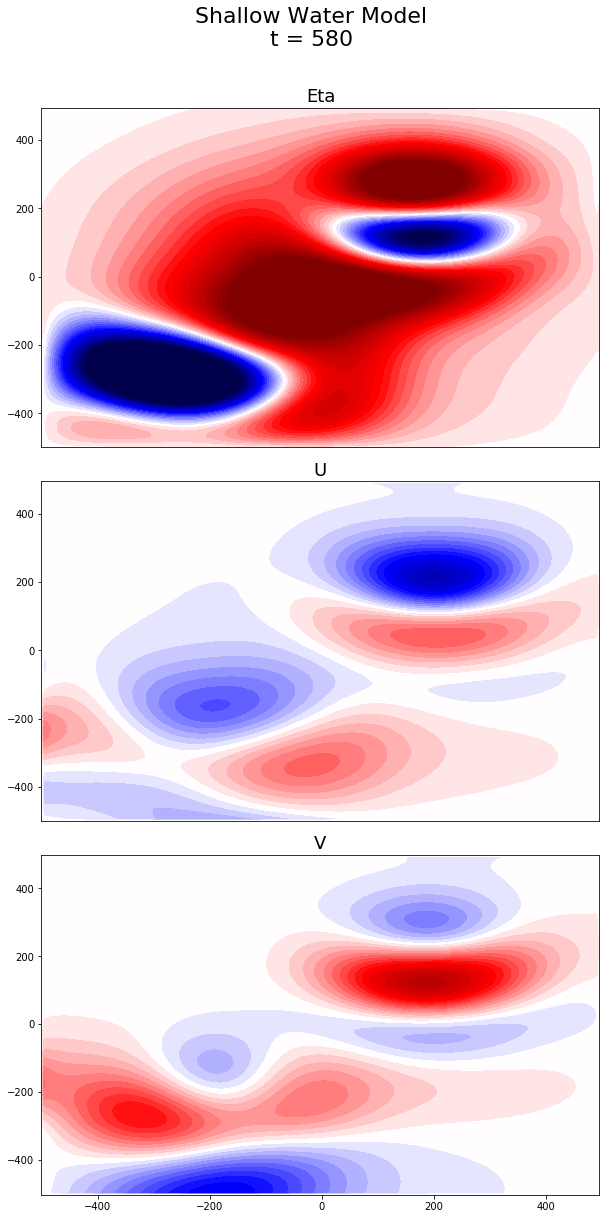

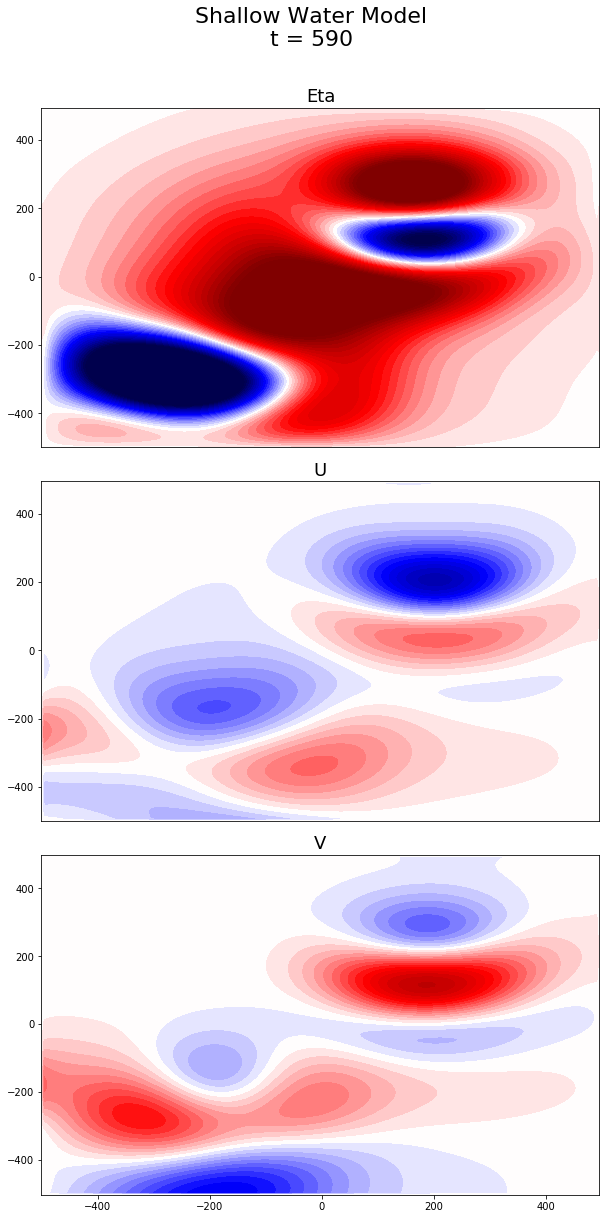

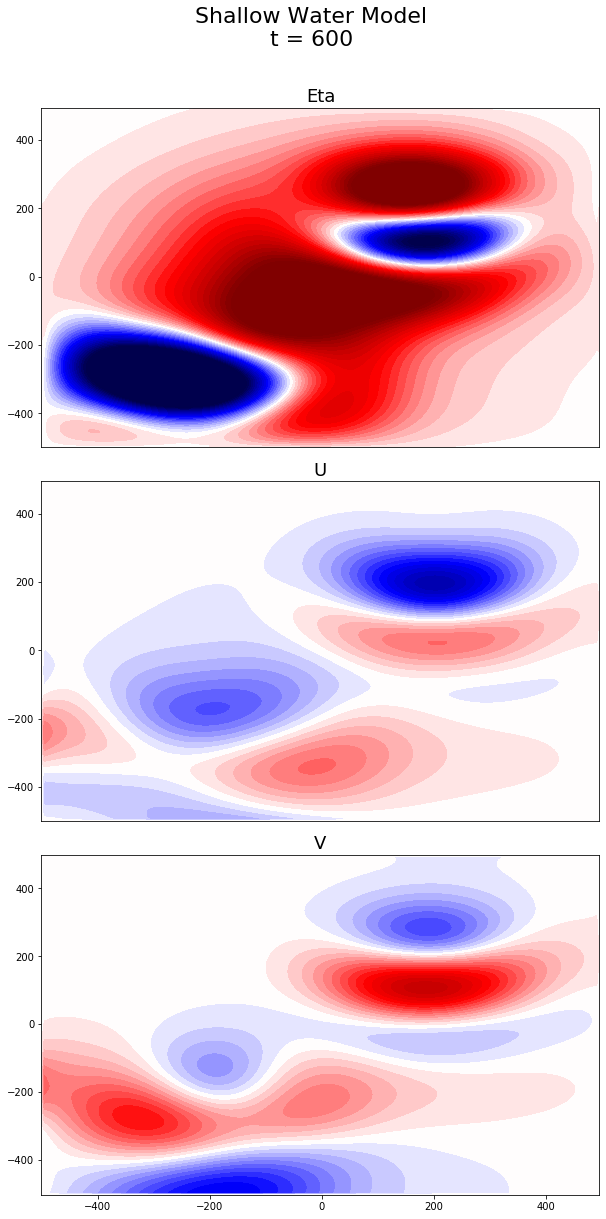

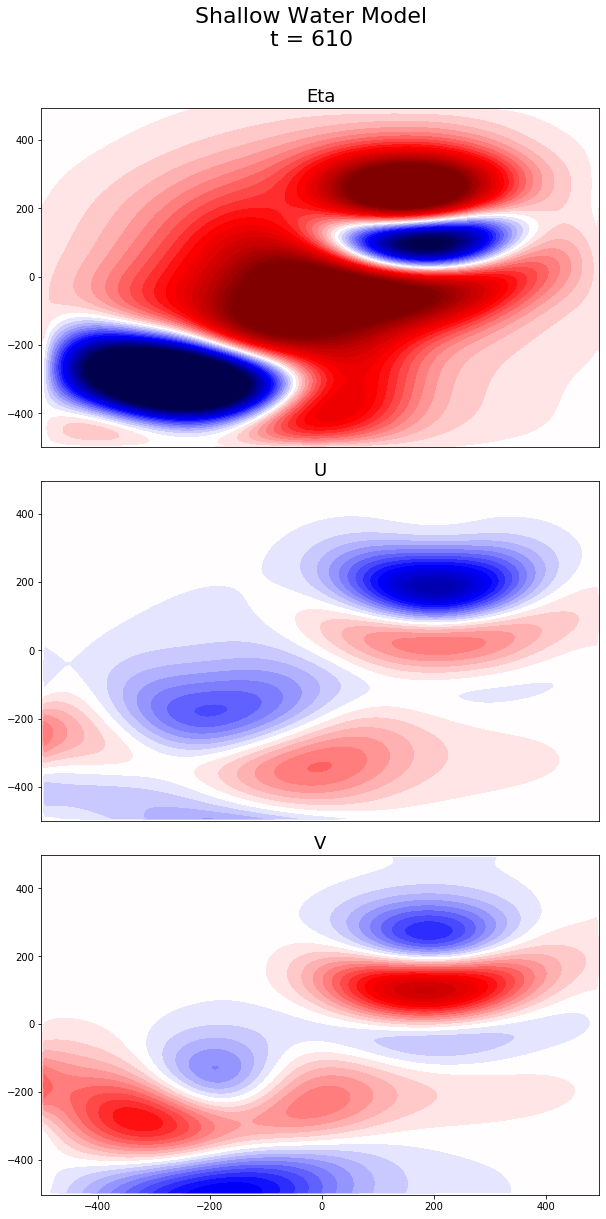

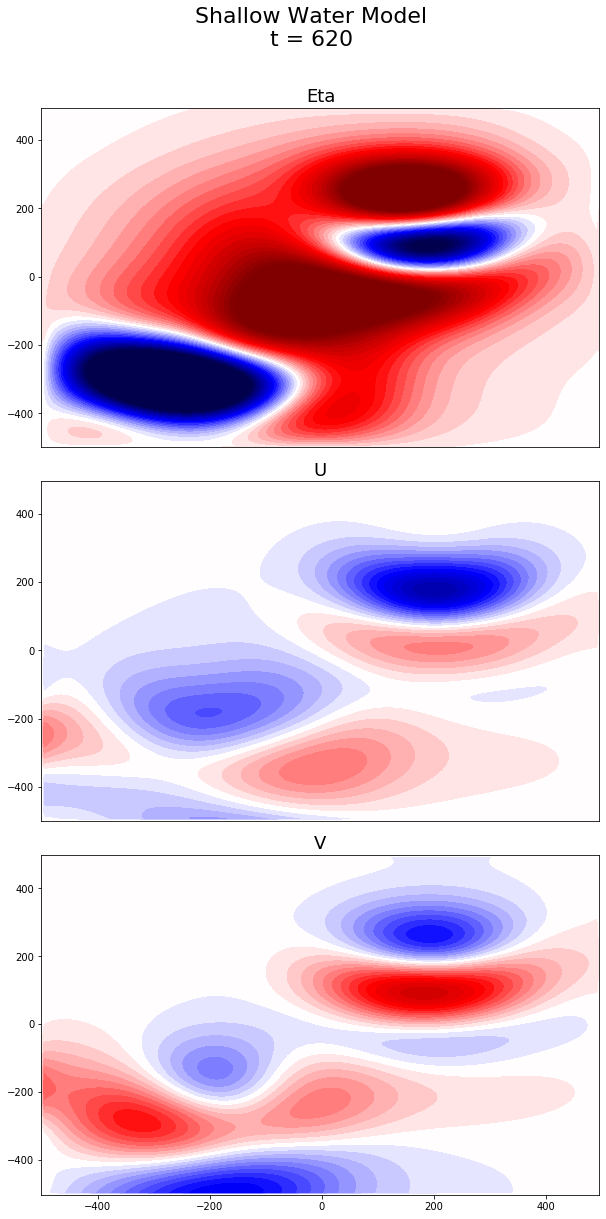

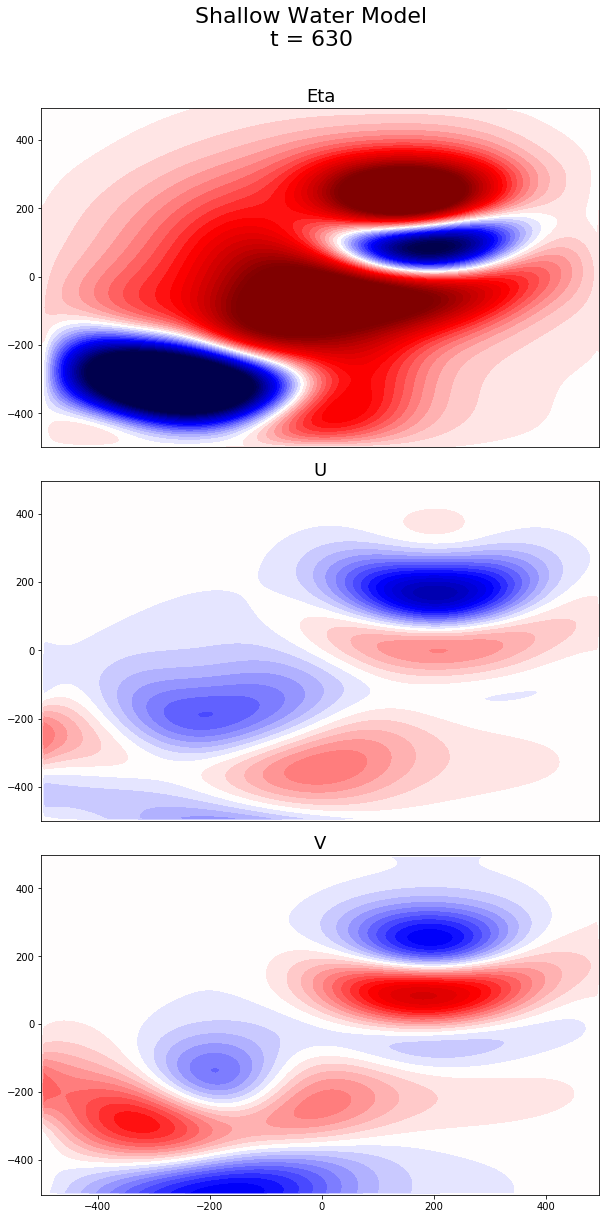

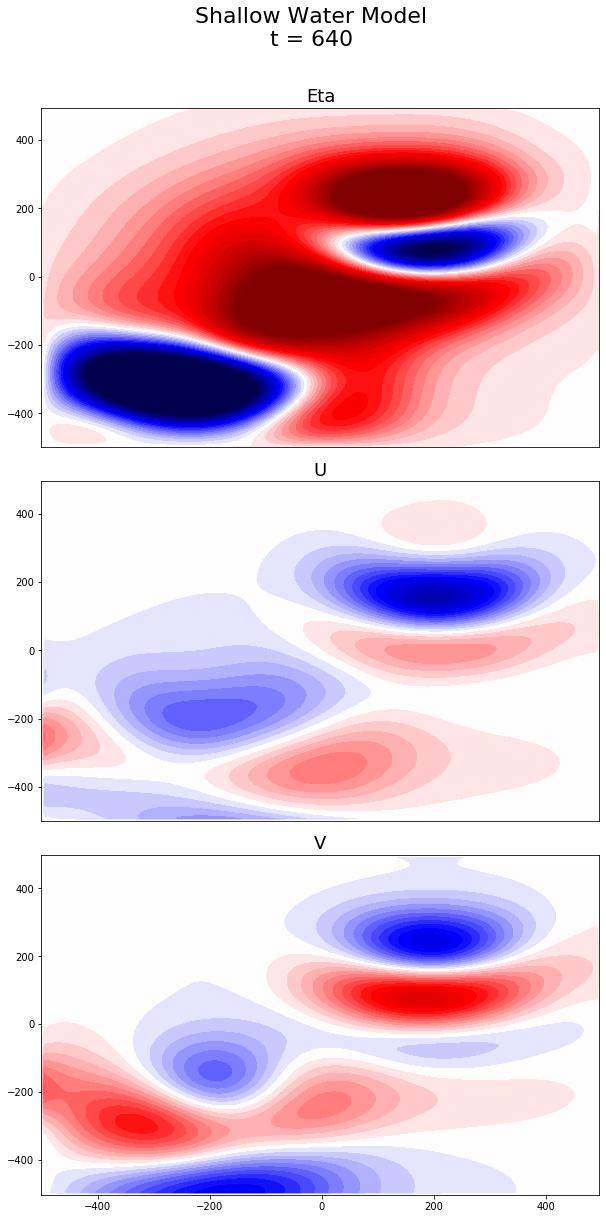

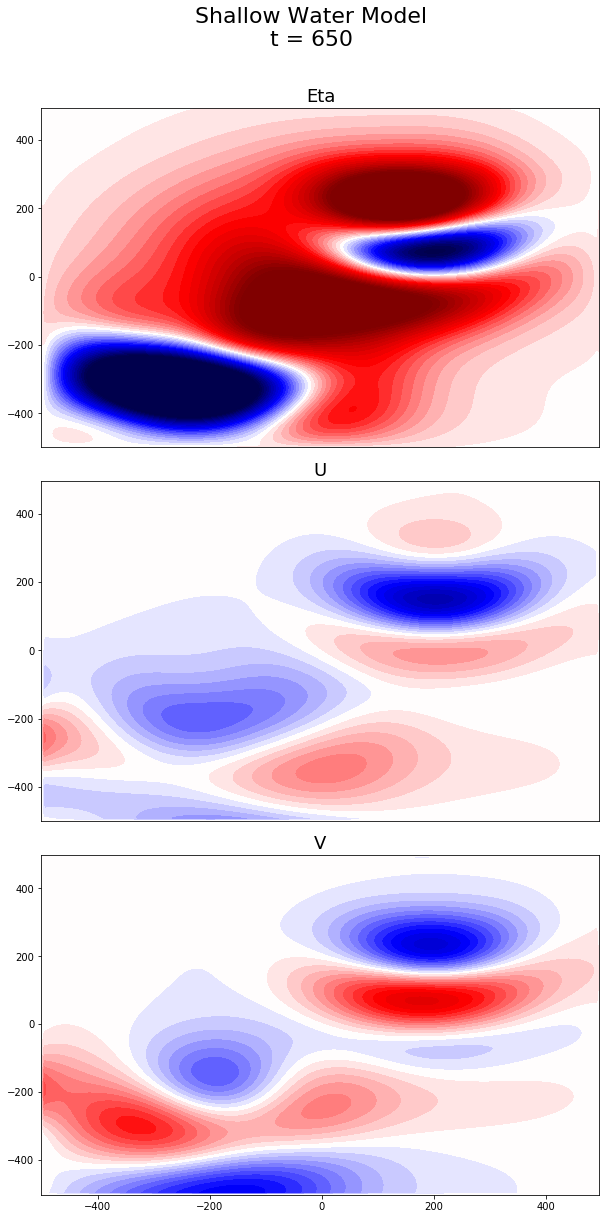

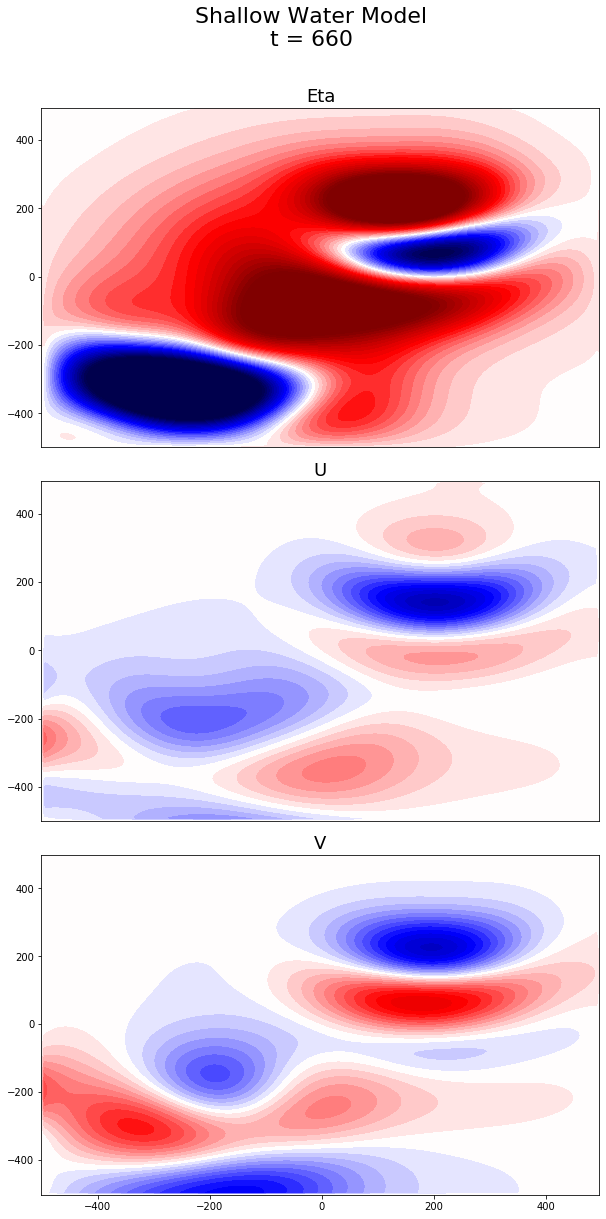

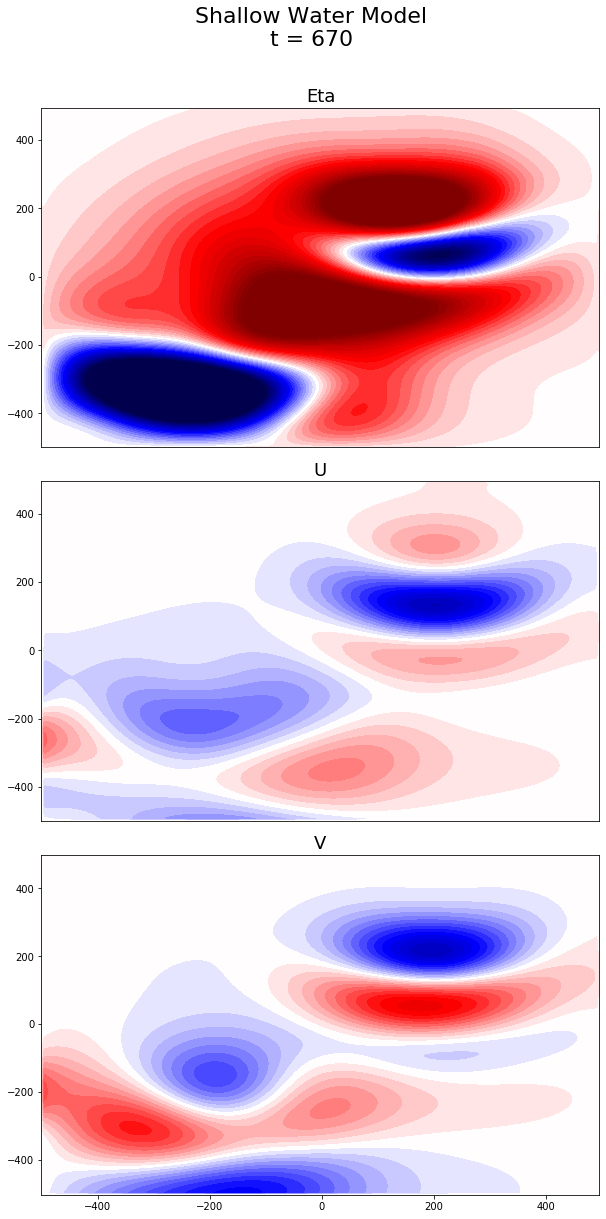

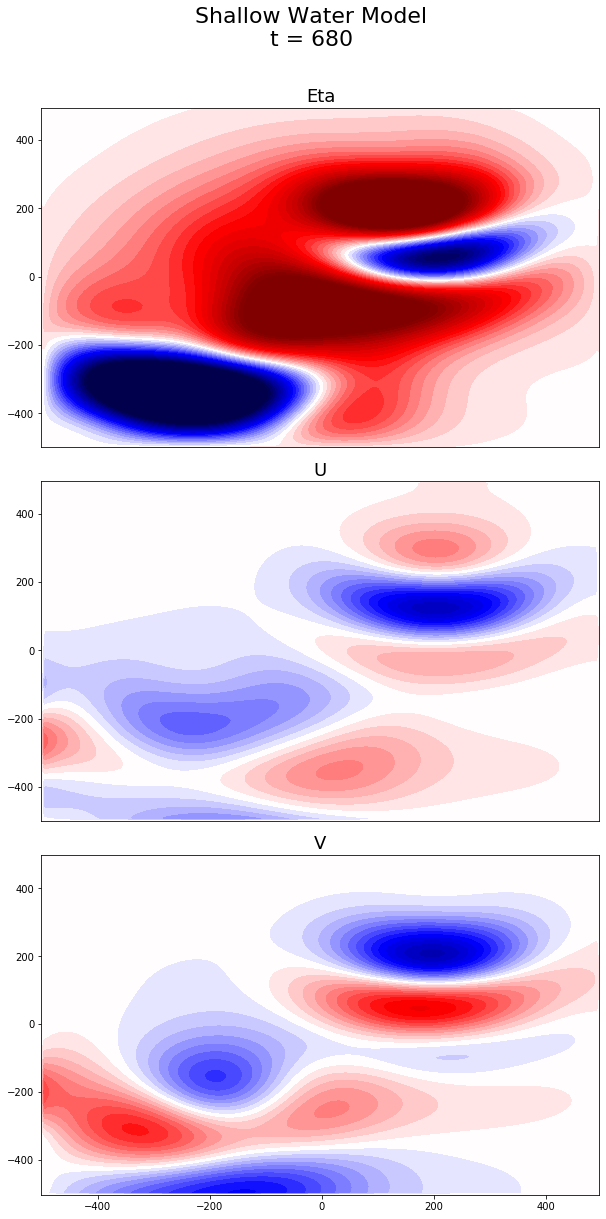

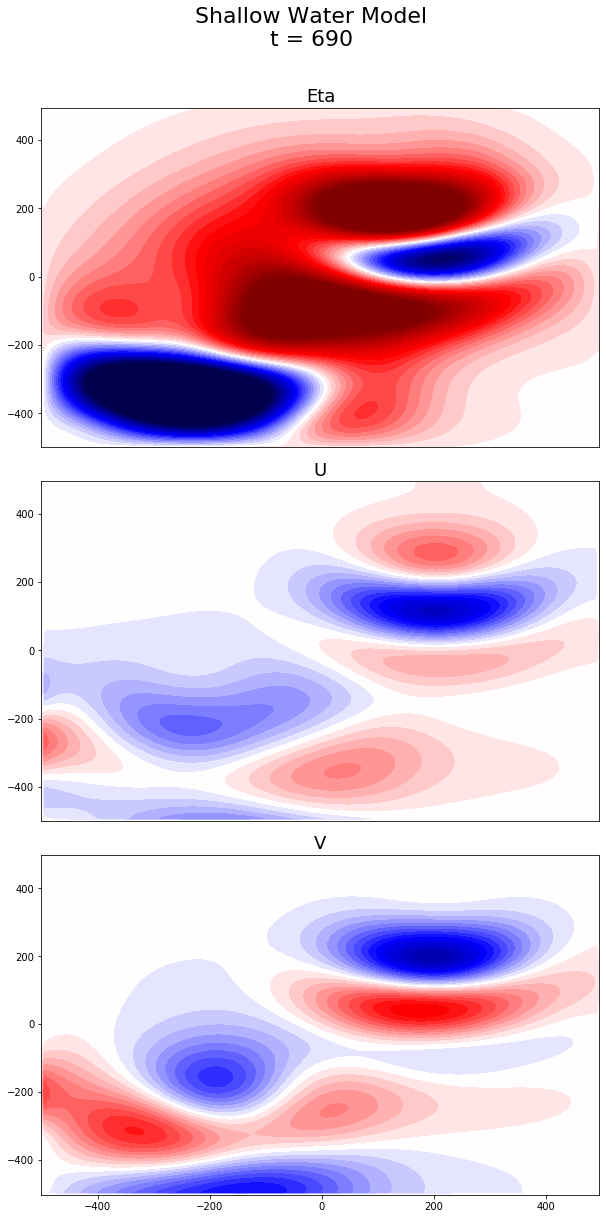

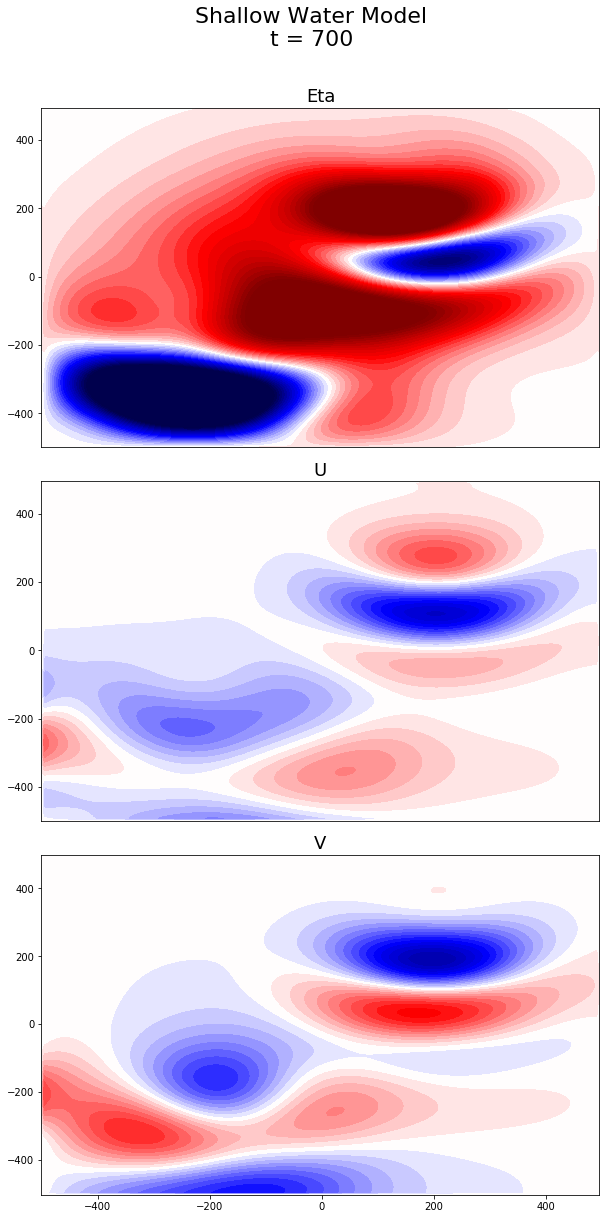

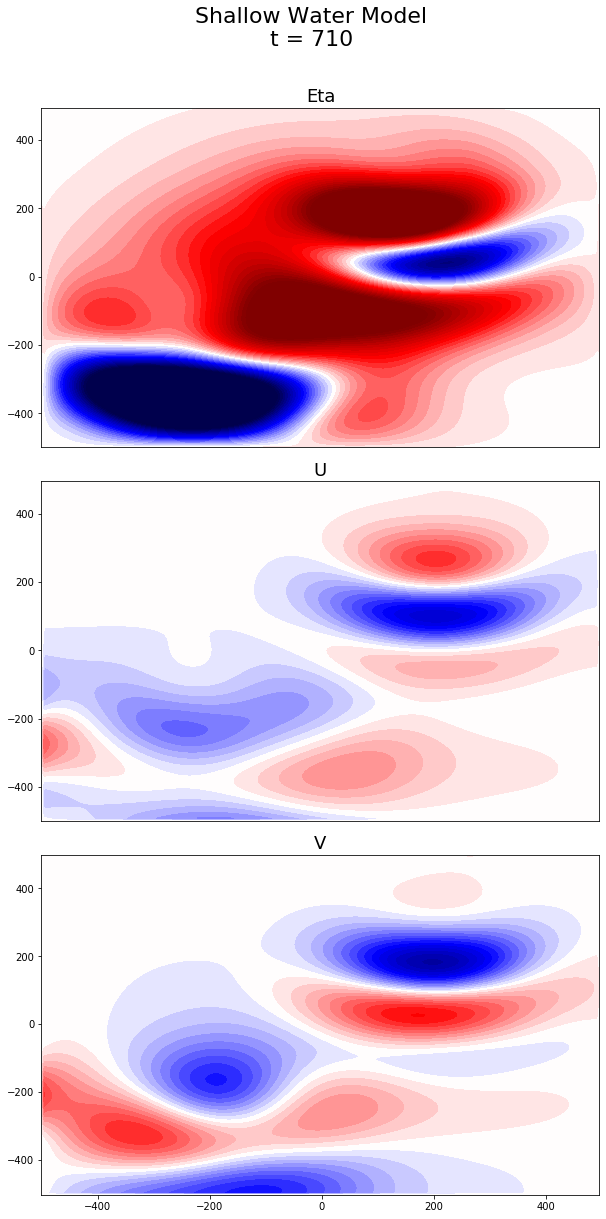

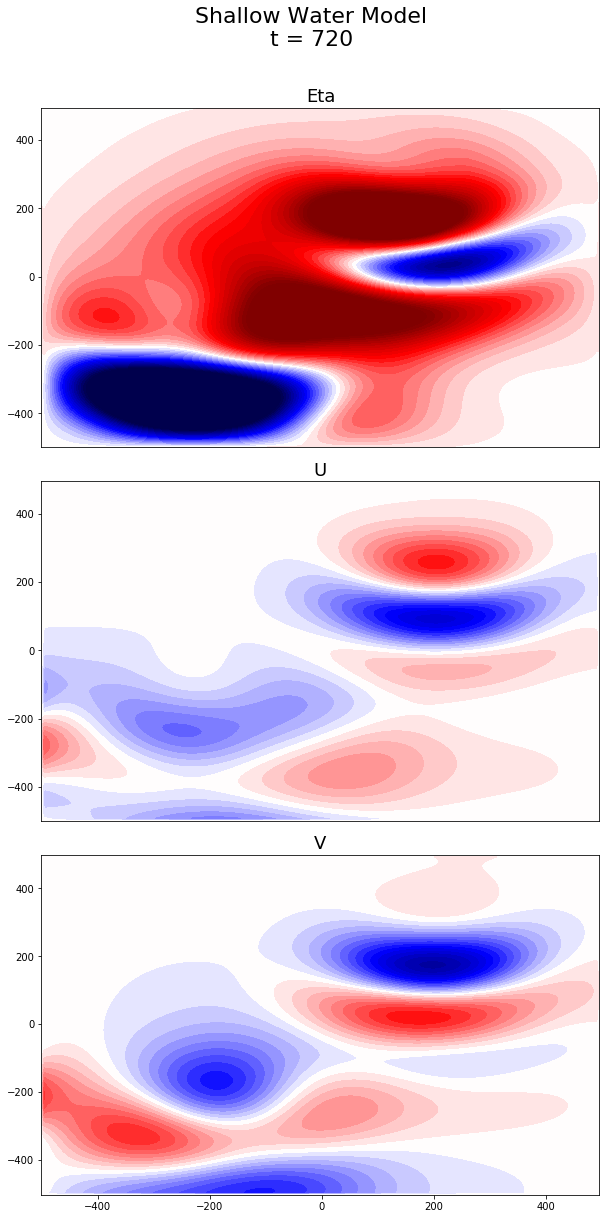

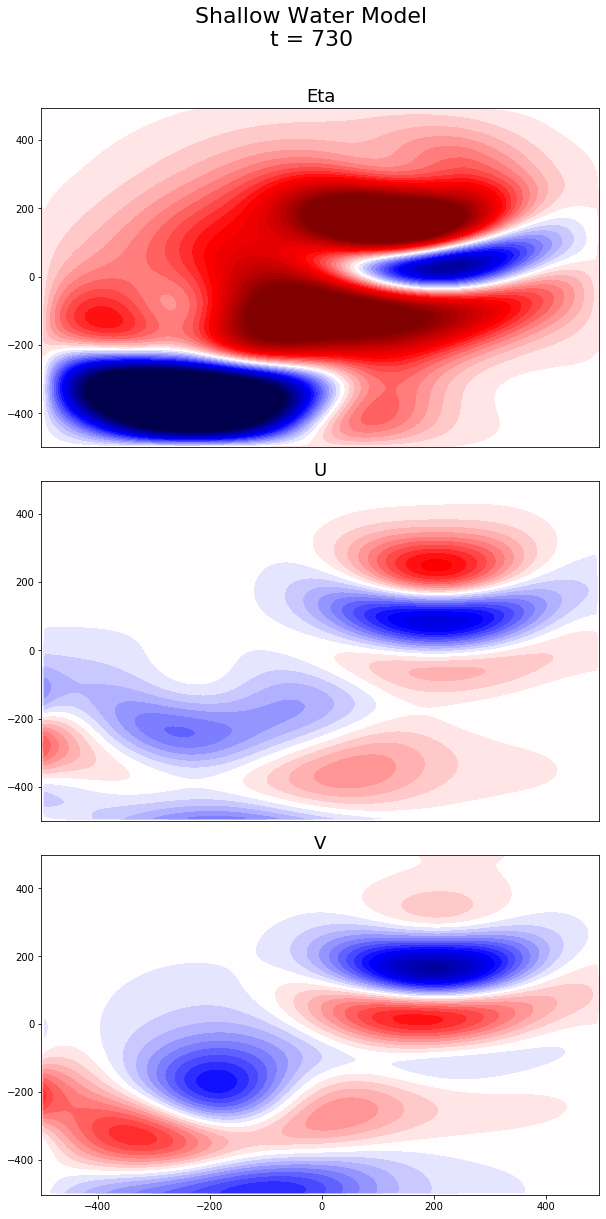

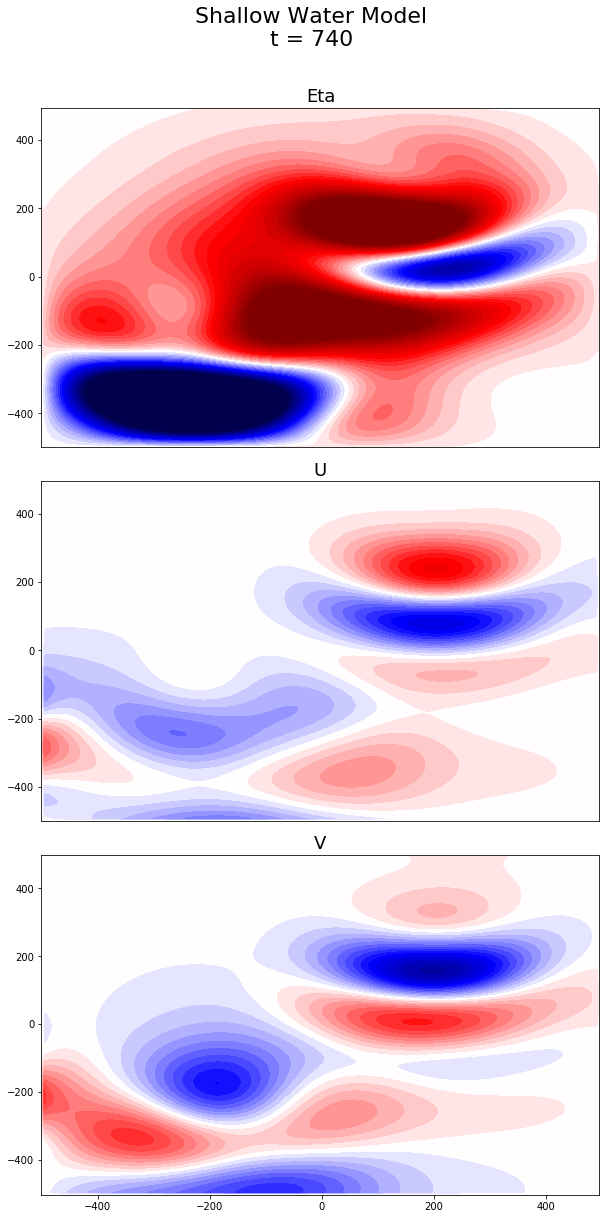

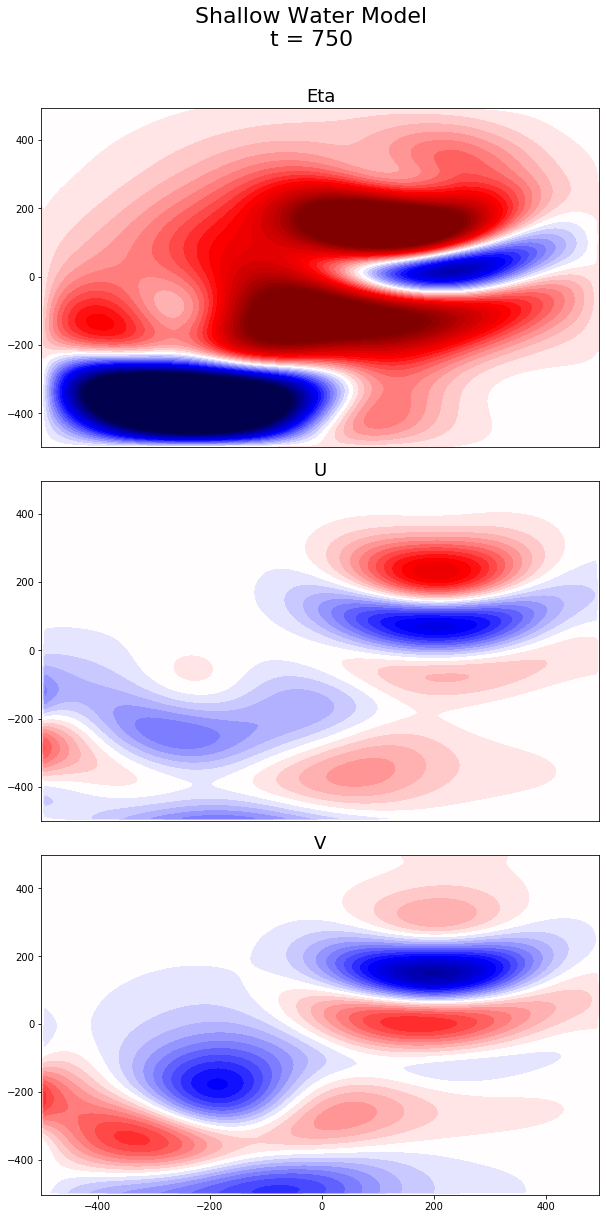

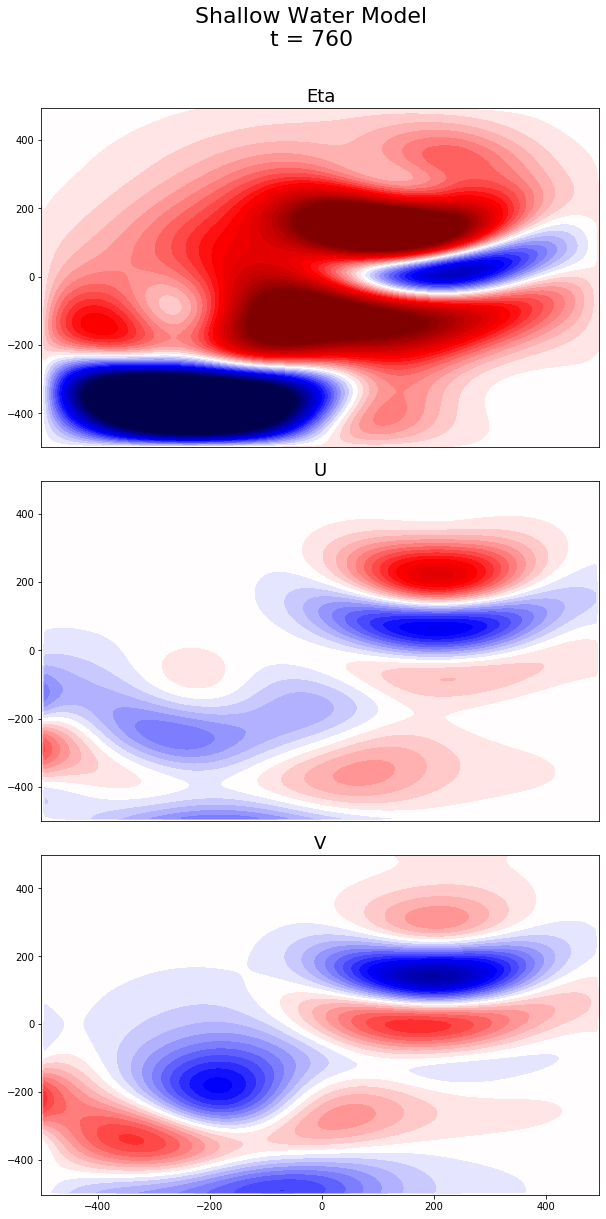

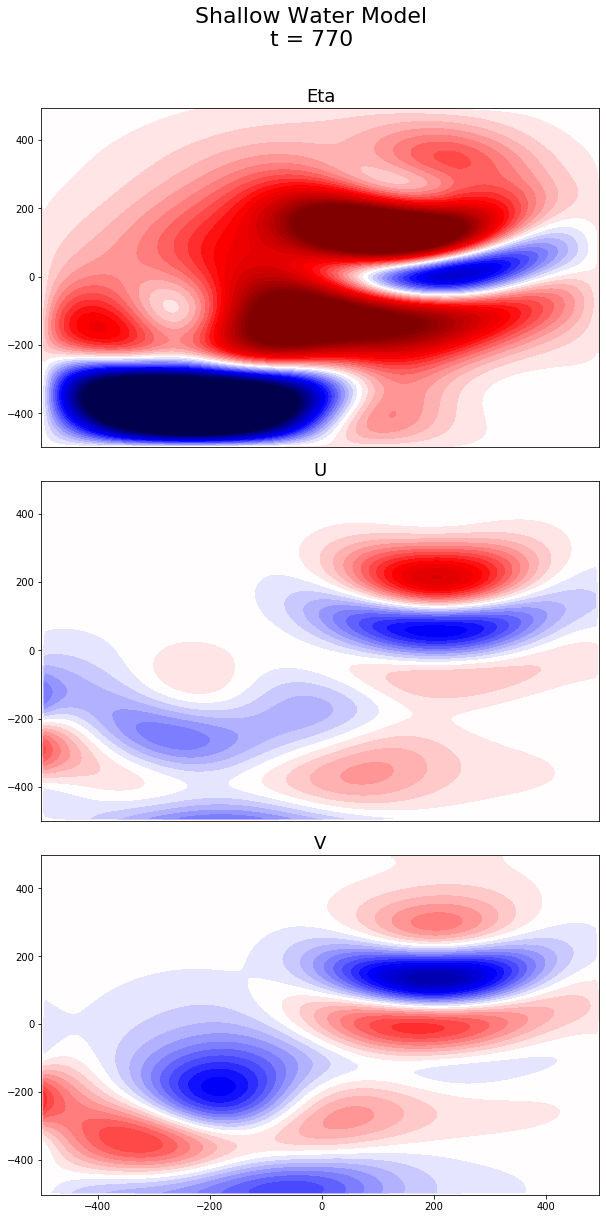

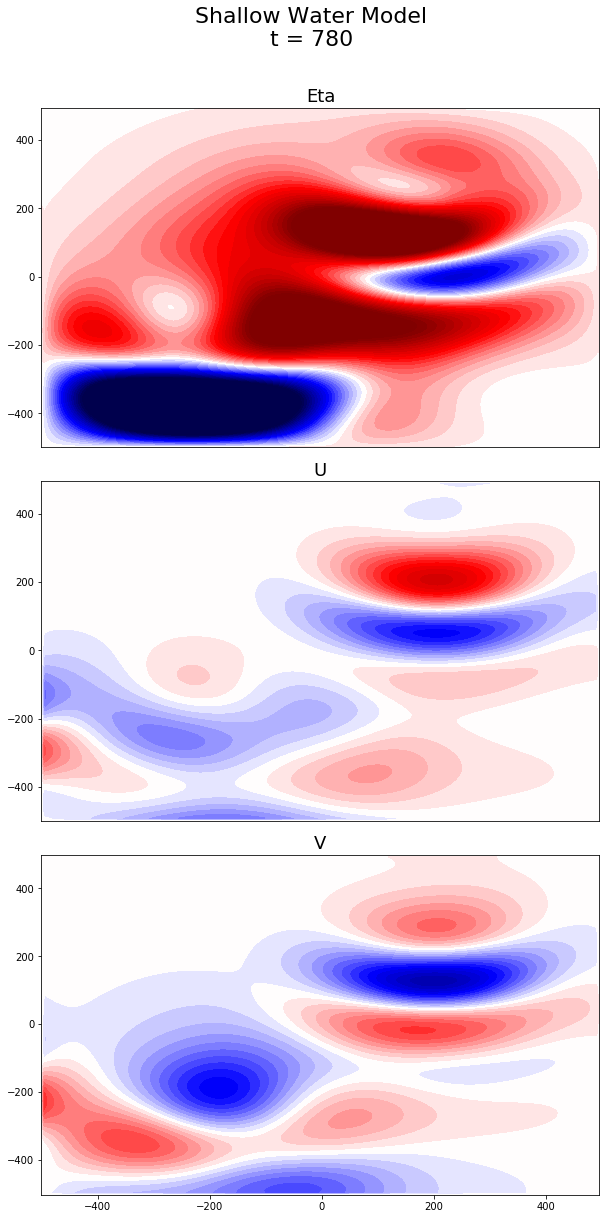

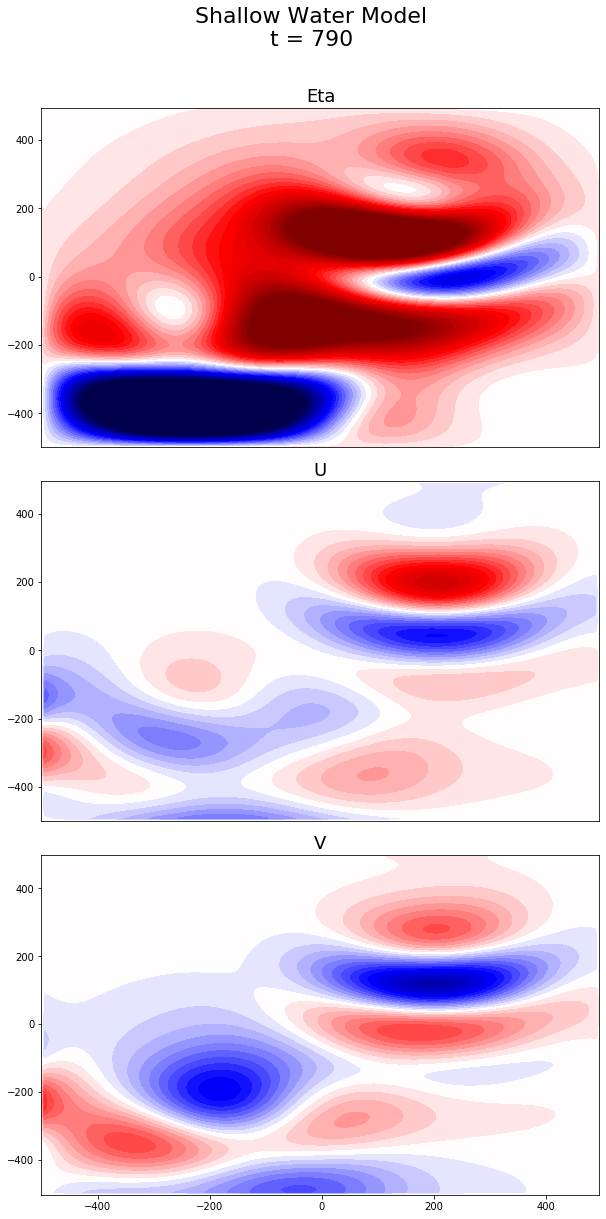

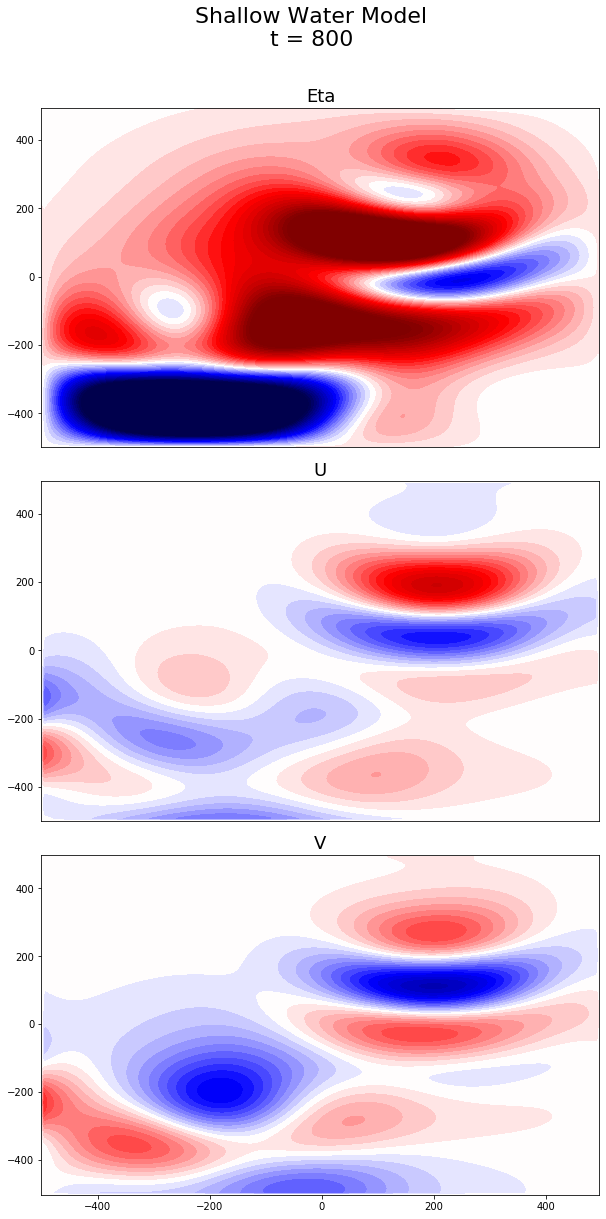

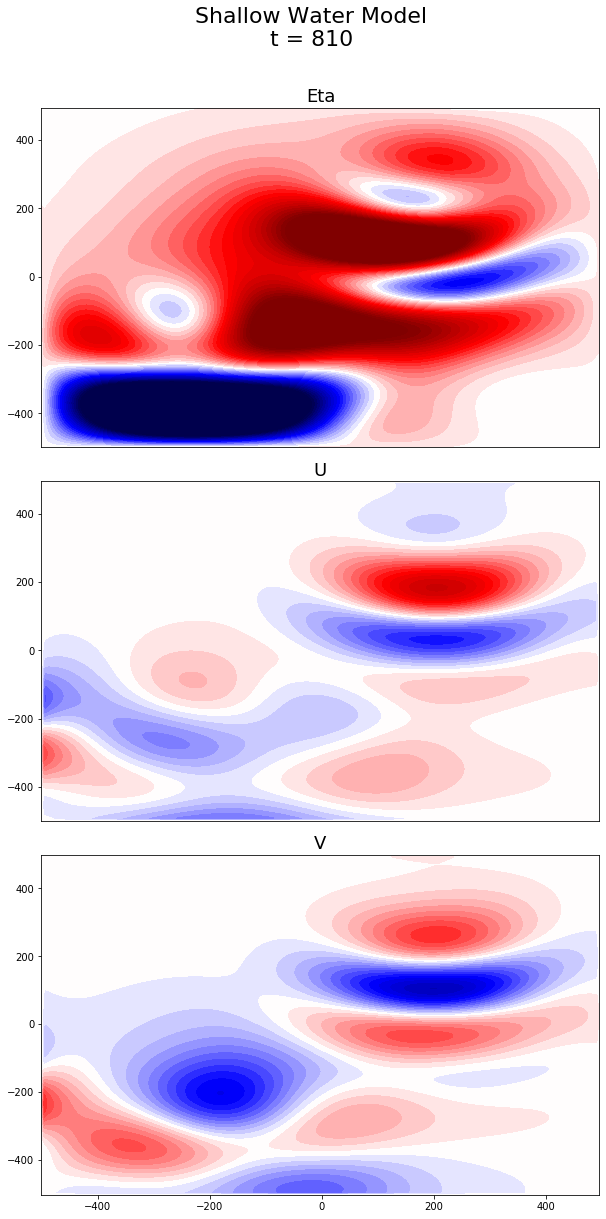

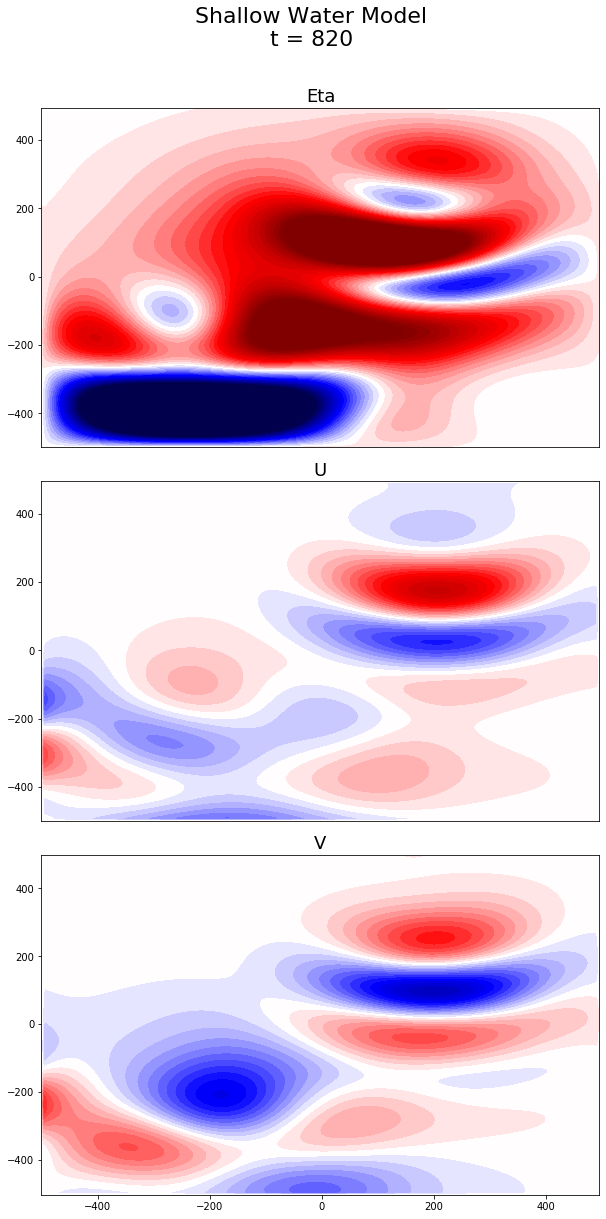

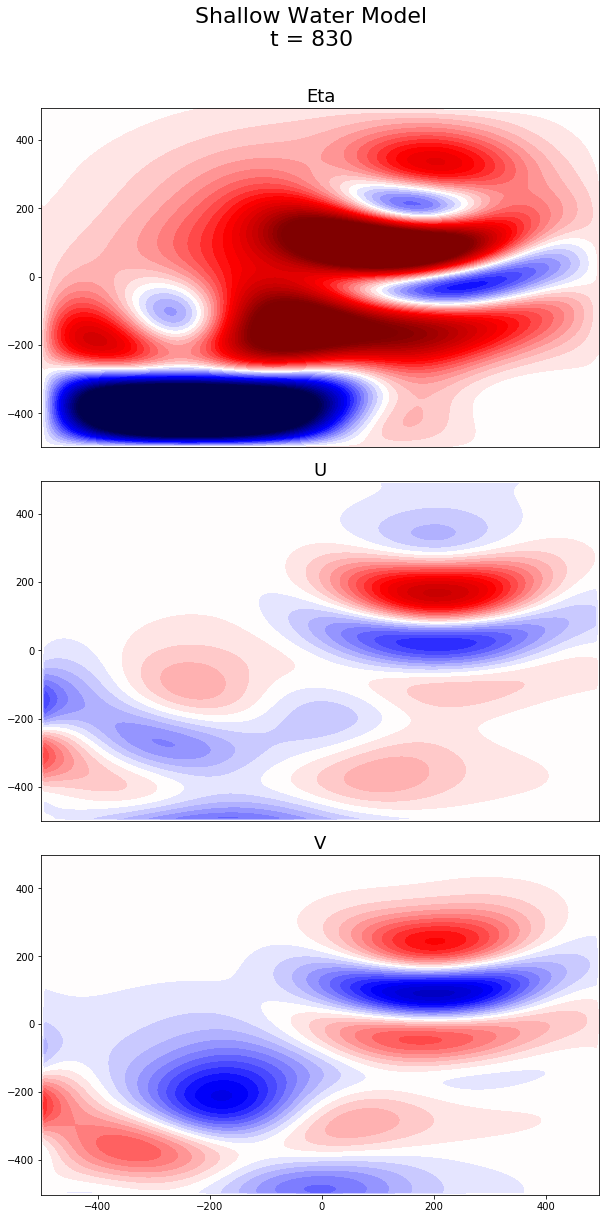

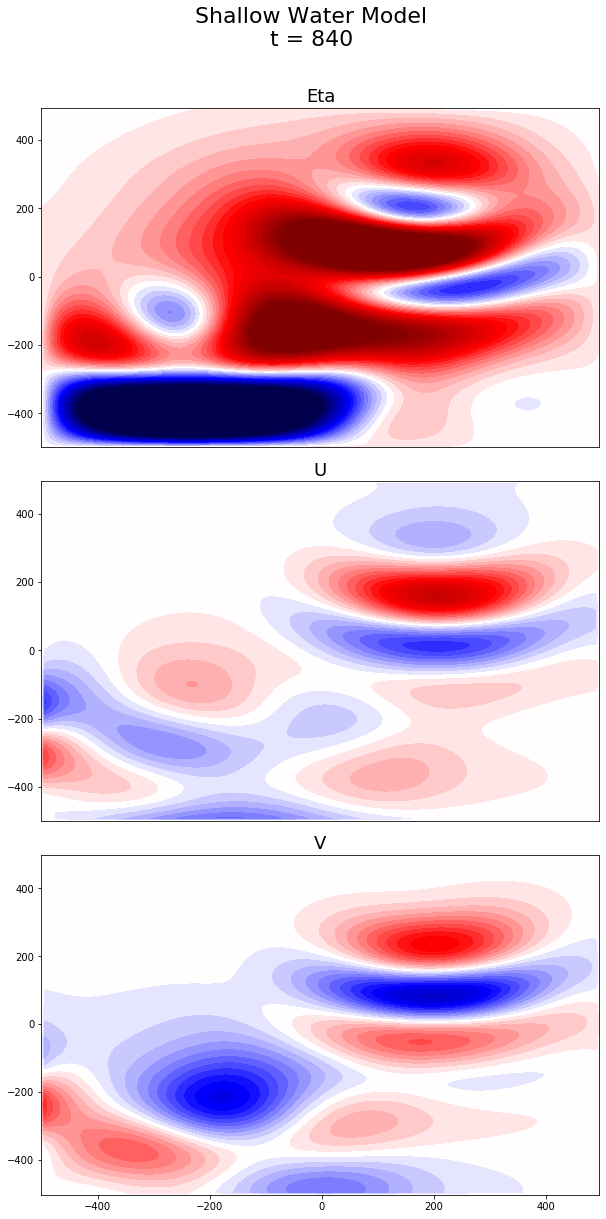

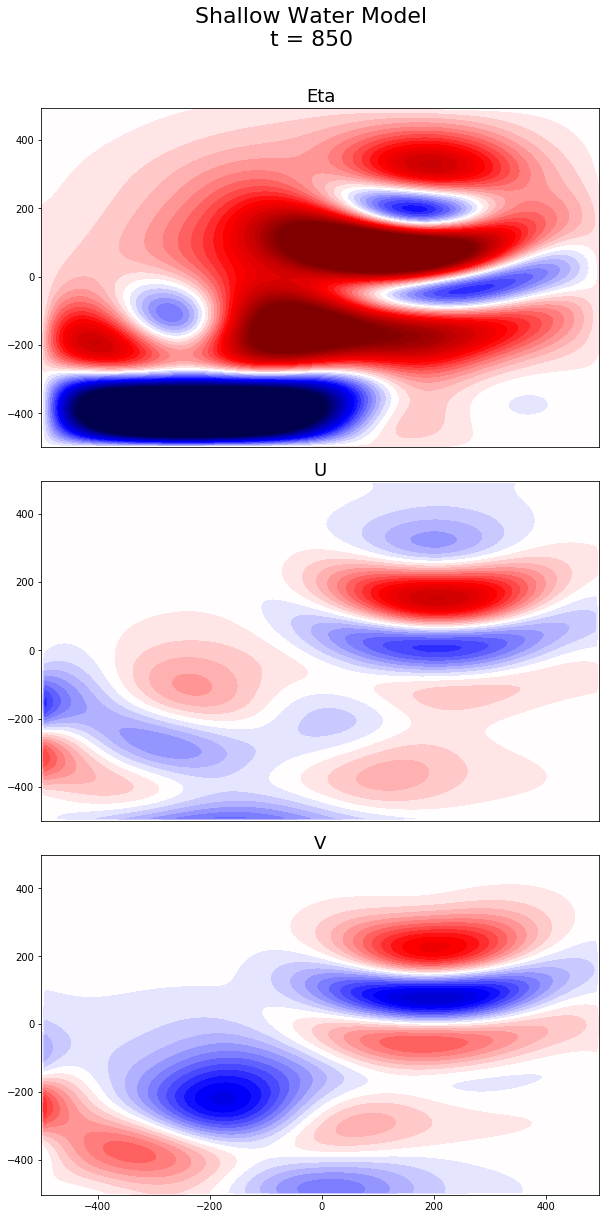

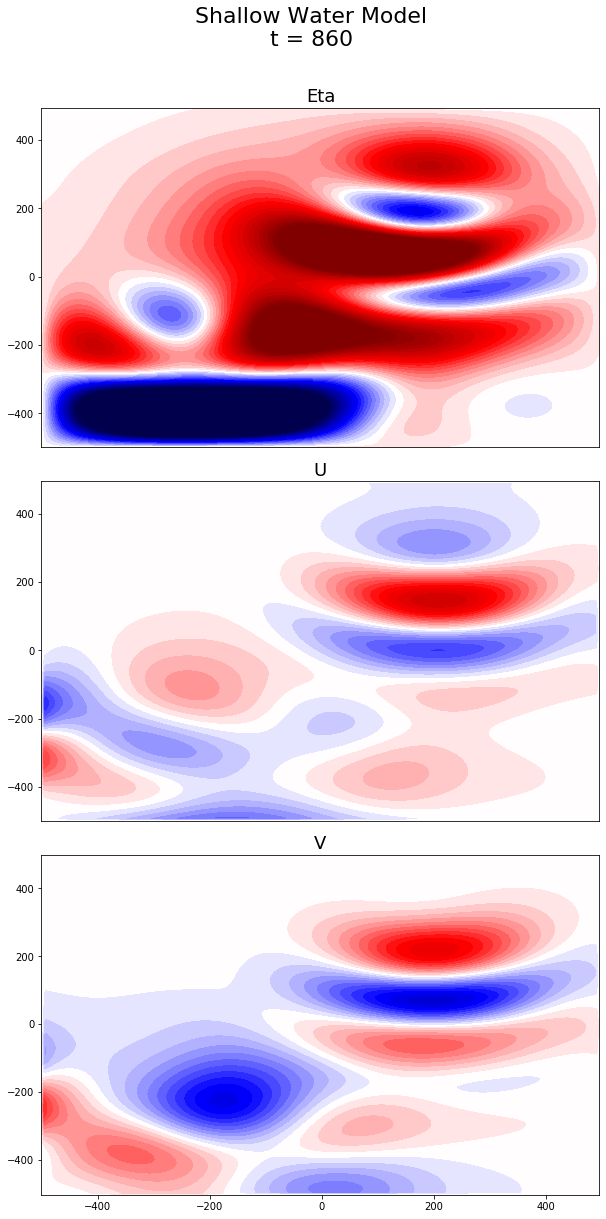

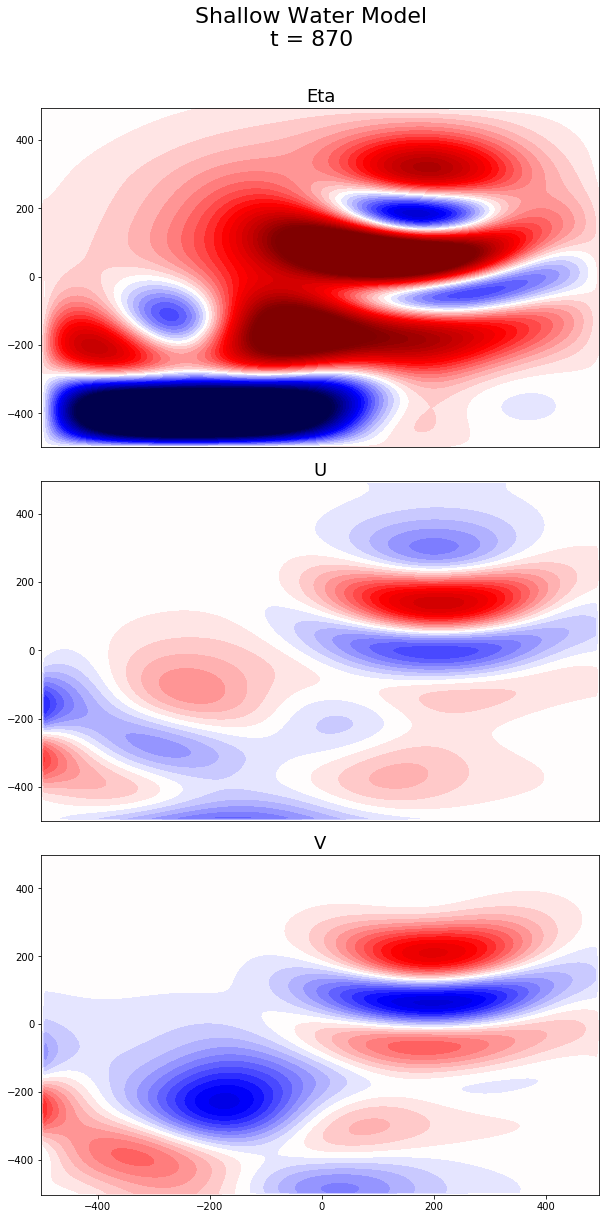

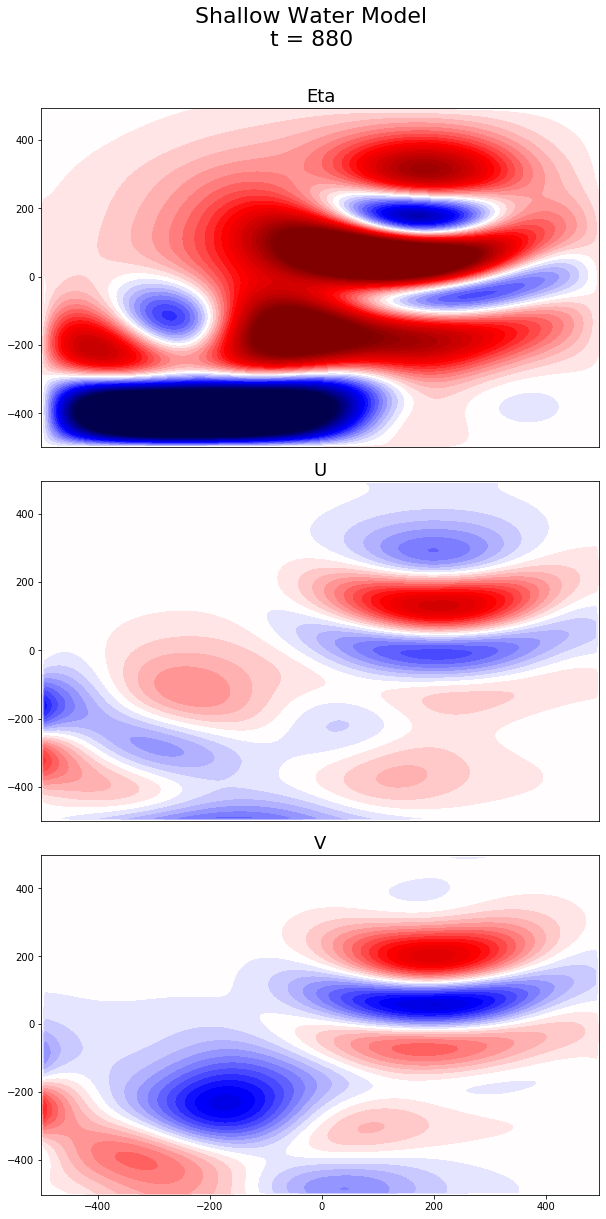

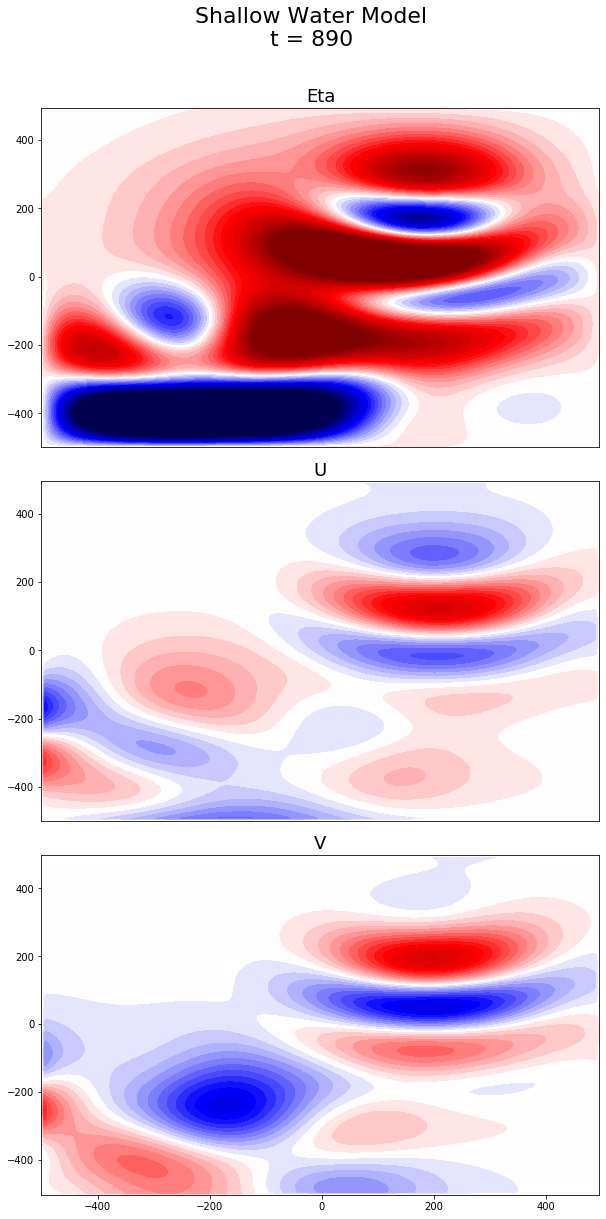

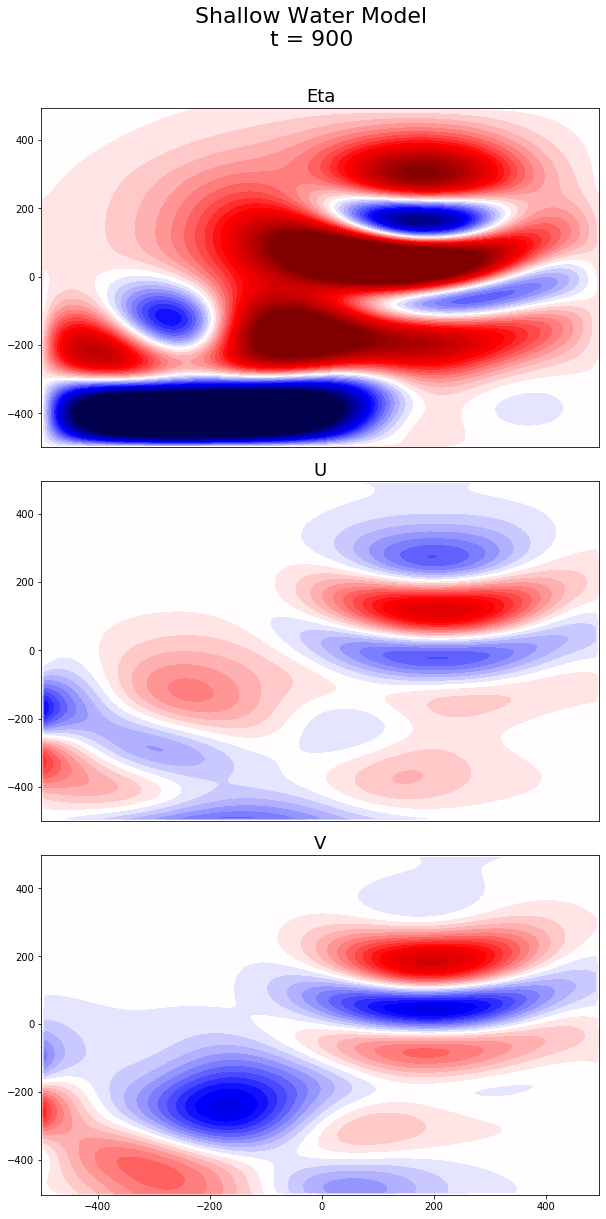

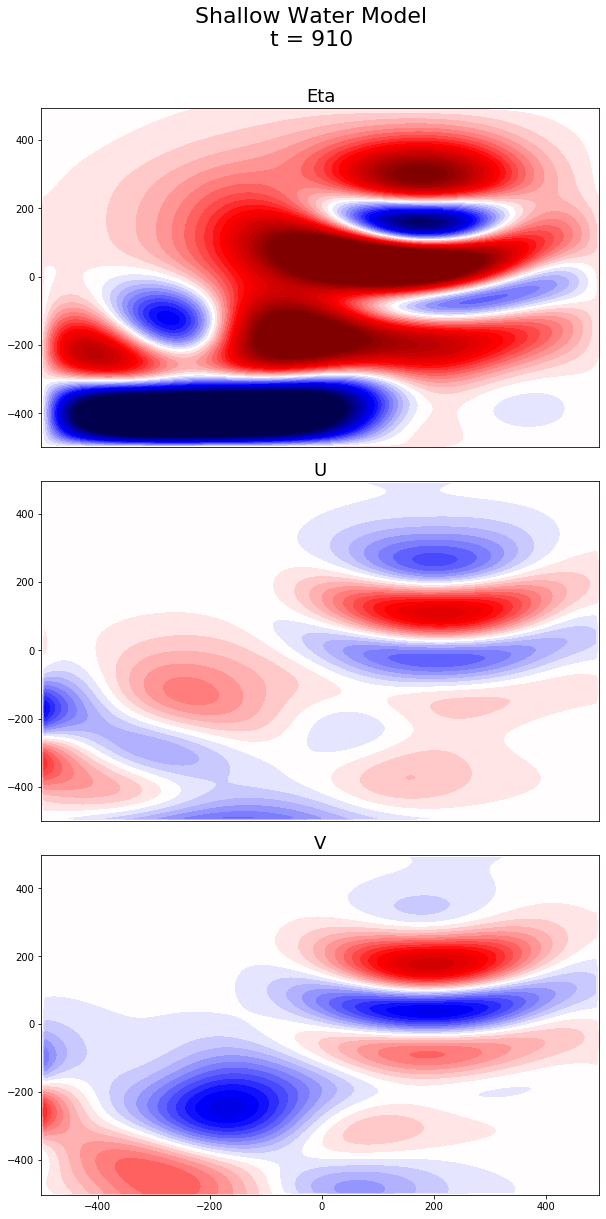

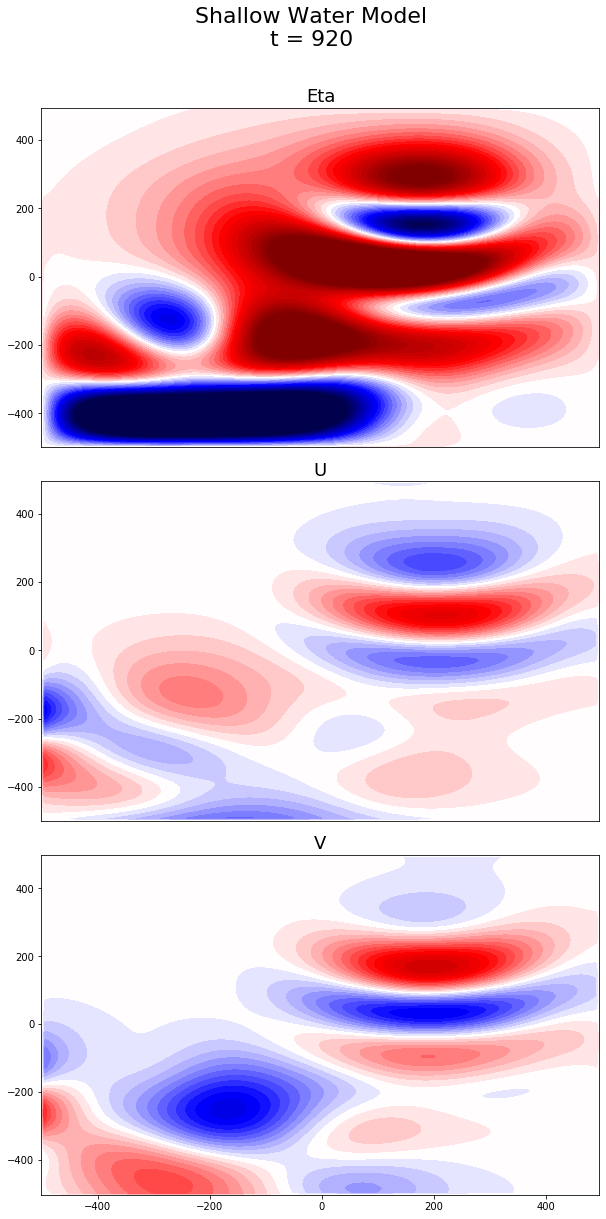

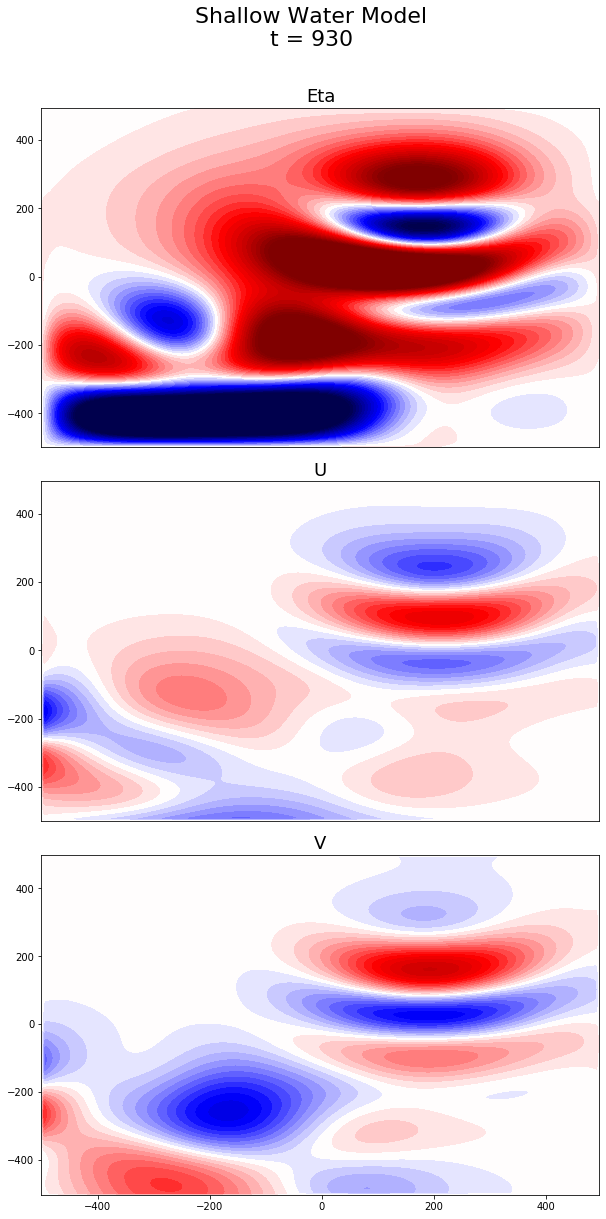

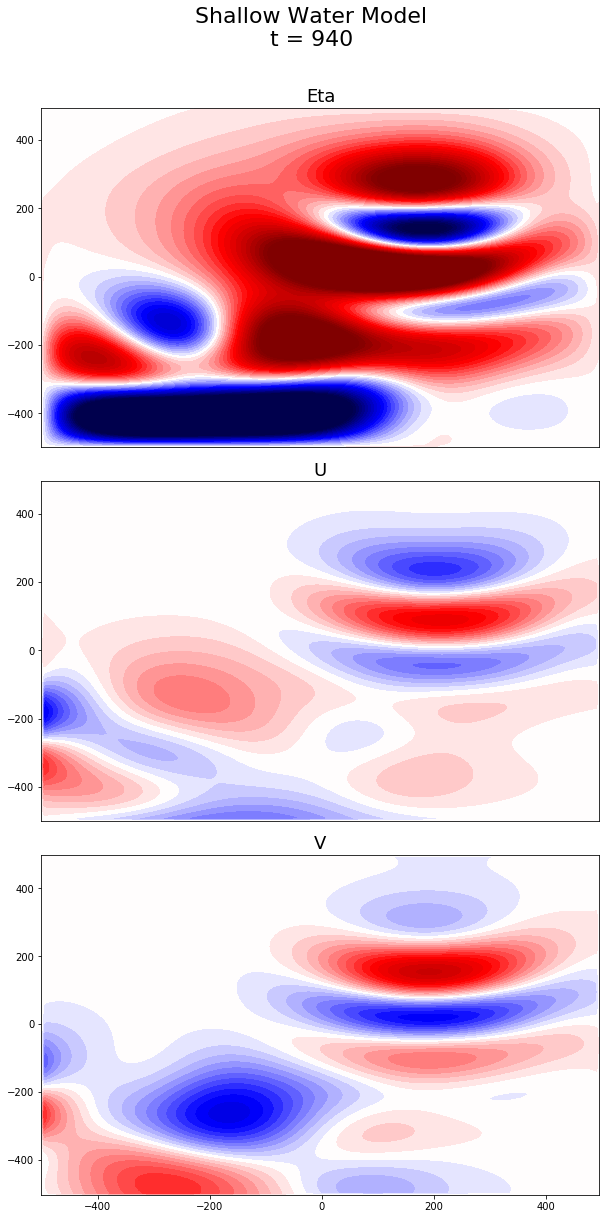

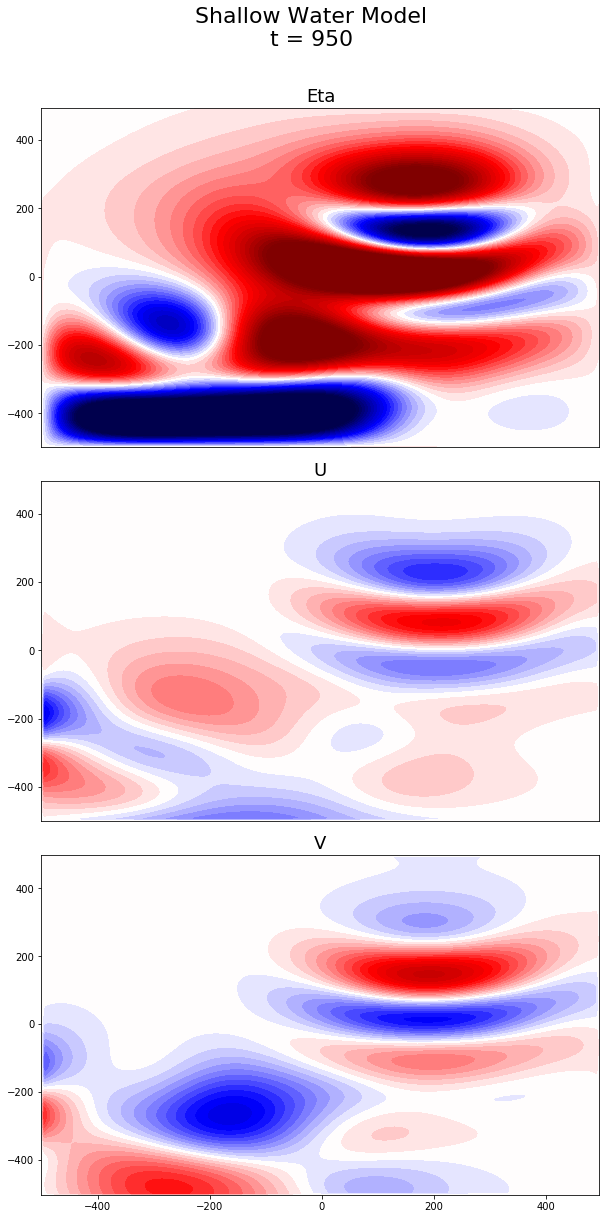

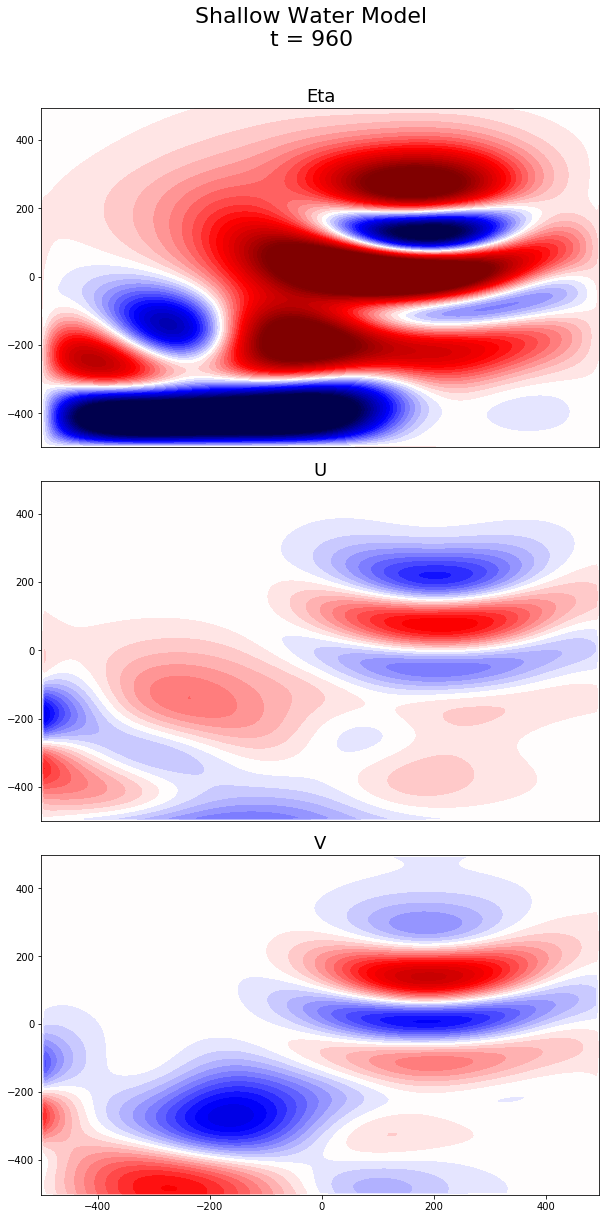

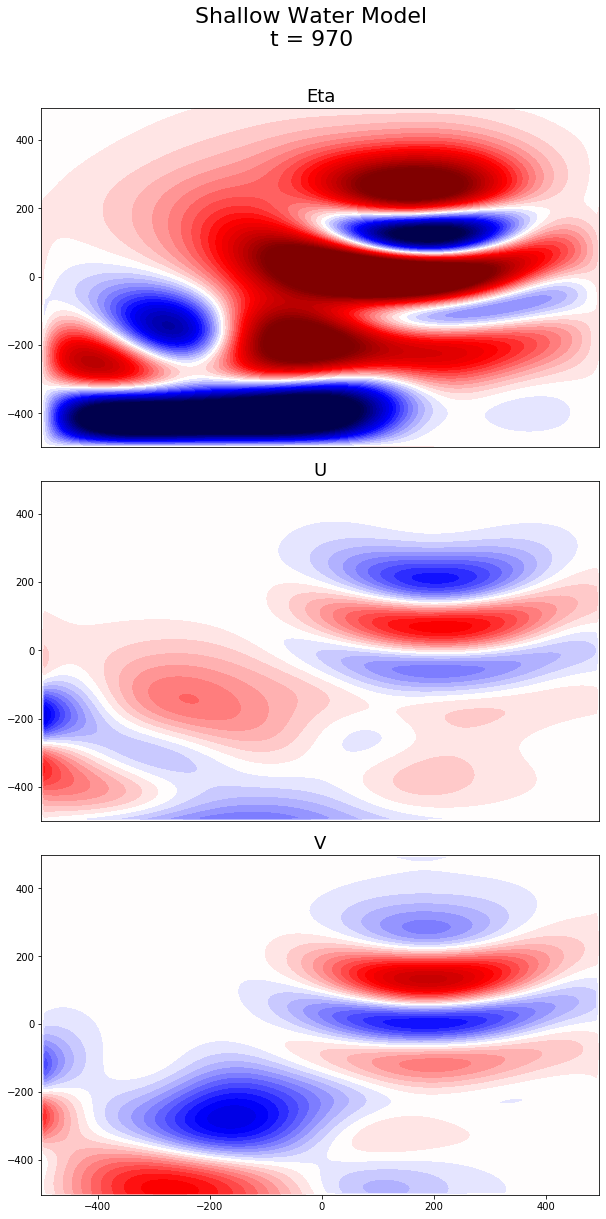

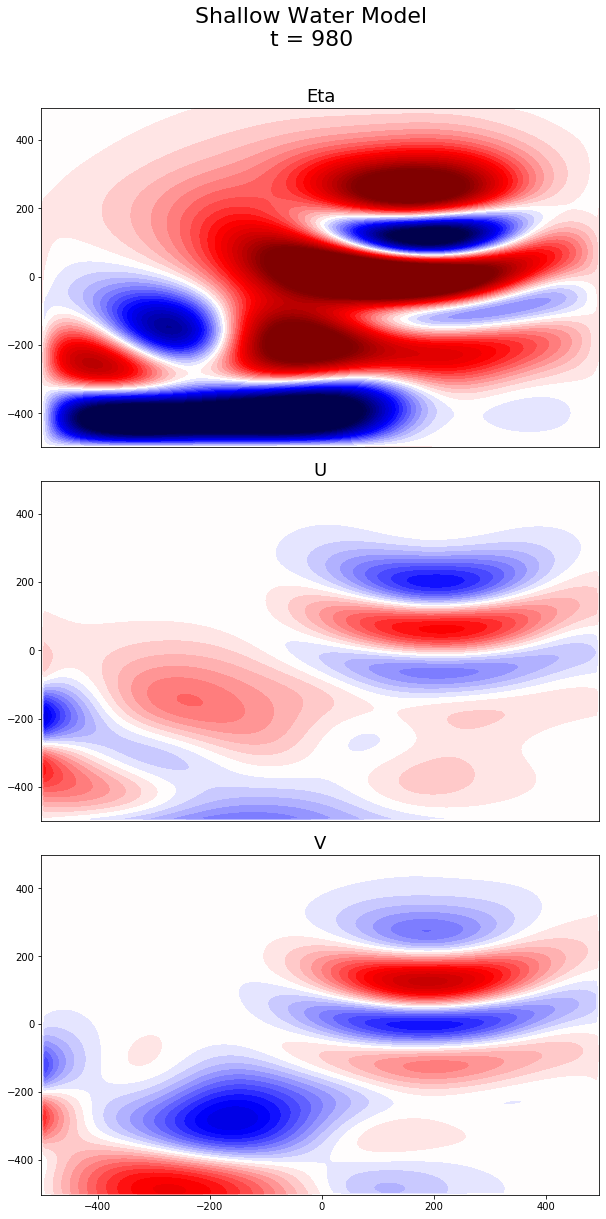

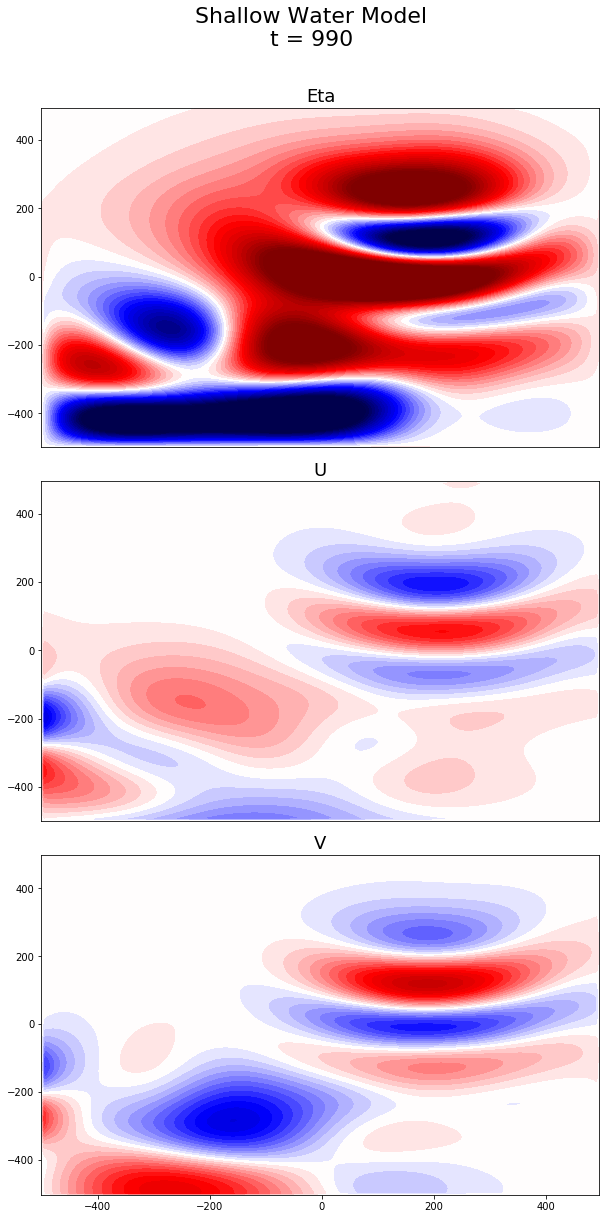

In [20]:
for it in range(nt-1):
    p[it+1],u[it+1],v[it+1] = RK3Step(p[it],u[it],v[it],f,depth,g,dxx,dyy,dt)
    BC(u[it+1],v[it+1],0)
    if (it%snapfreq == 0):
        # diagnostics
        energy,enstrophy = calc_budget(p[it+1],u[it+1],v[it+1],depth+p[it+1],f,g,dxx,dyy)
        print(r'$\delta$Energy: ',np.max(energy)-np.max(energy0))
        print(r'$\delta$Enstrophy: ',np.max(enstrophy)-np.max(enstrophy0))

        # plot solution
        UpdatePlots(it,p[it+1],u[it+1],v[it+1],XP,YP,XU,YU,XV,YV)